# SETUP

In [1]:
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score)

import pandas as pd
import seaborn as sn
import datetime
from itertools import chain
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score as shs
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from scipy.signal import periodogram
from scipy import stats


import warnings
warnings.filterwarnings('ignore')

from tqdm.auto import tqdm

from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

from yellowbrick.cluster import SilhouetteVisualizer

from tslearn.metrics import dtw

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, LSTM, RepeatVector
from tensorflow.keras.models import Model

Loading Data

In [2]:
df1 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/logon.csv')
df2 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/device.csv')
df3 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/email.csv')
df4 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/file.csv')
df5 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/http.csv')
ans = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/answers/answers.csv')
ans = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/answers/answers.csv')
ldap = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/ldap/2009-12.csv')
psy = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/psychometric.csv')

In the case we include NLP.  But not in the final version for the Praxis.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import LancasterStemmer
tfidfvectorizer = TfidfVectorizer(stop_words='english', analyzer='word' )

In [6]:
nltk.download('stopwords')
stops = set(stopwords.words('english'))

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
def prepare_text(pretext):
    tokens = word_tokenize(pretext, language="english", preserve_line=True)
    token_tag = pos_tag(tokens)
    # include_tags = ['VBZ', 'VBP', 'VBN', 'VBG', 'VBD', 'JJ', 'JJS', 'JJR', 'NN', 'NNS', 'NNP', 'NNPS']
    include_tags = ['NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = (tok for tok, tag in token_tag if tag in include_tags)    
    stemmed_tokens = (lancaster.stem(tok) for tok in filtered_tokens)
    lemmed_words = (lemmatizer.lemmatize(tok) for tok in stemmed_tokens)
    # lower_words = [str.lower(tok) for tok in lemmed_words]
    joined = " ".join(lemmed_words)
    return(joined)
lancaster = LancasterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()
nltk.download('stopwords')
stops = set(stopwords.words('english'))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Using the elbow method to determine the number of clusters for Psychometric combinations.

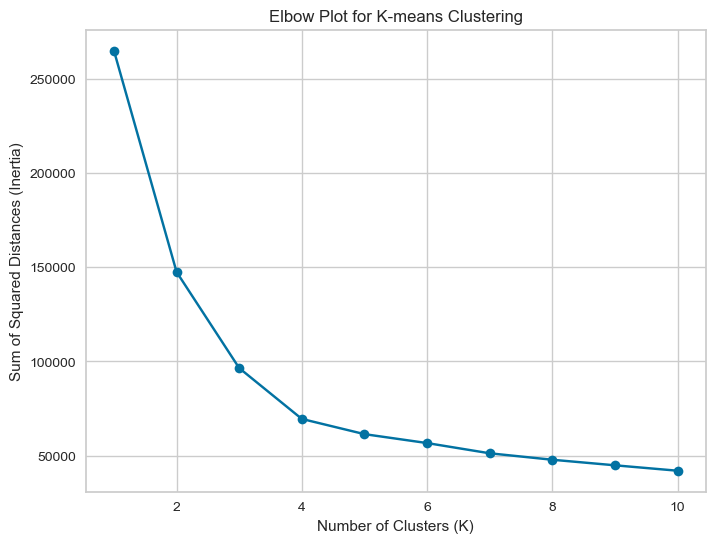

In [8]:
k_values = range(1, 11)  # Trying K from 1 to 10 clusters
inertia_values = []

# Calculate the sum of squared distances (inertia) for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(psy[['O', 'C', 'N']])
    inertia_values.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Plot for K-means Clustering')
plt.grid(True)
plt.show()

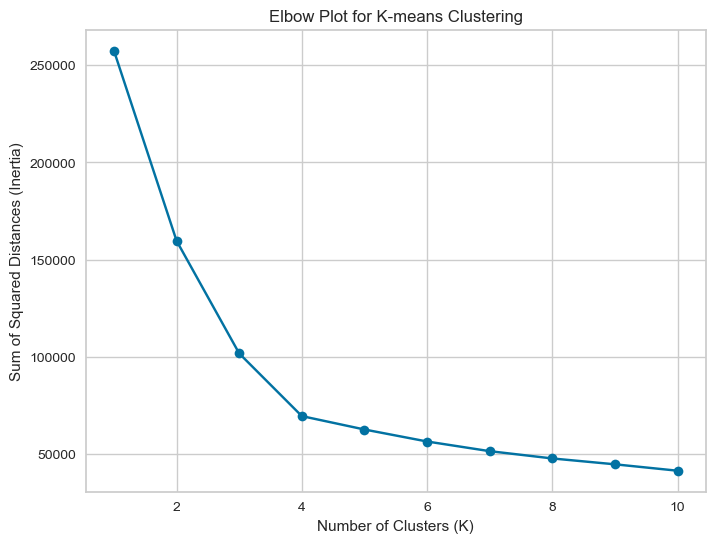

In [9]:
k_values = range(1, 11)  # Trying K from 1 to 10 clusters
inertia_values = []

# Calculate the sum of squared distances (inertia) for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(psy[['O', 'E', 'N']])
    inertia_values.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Plot for K-means Clustering')
plt.grid(True)
plt.show()

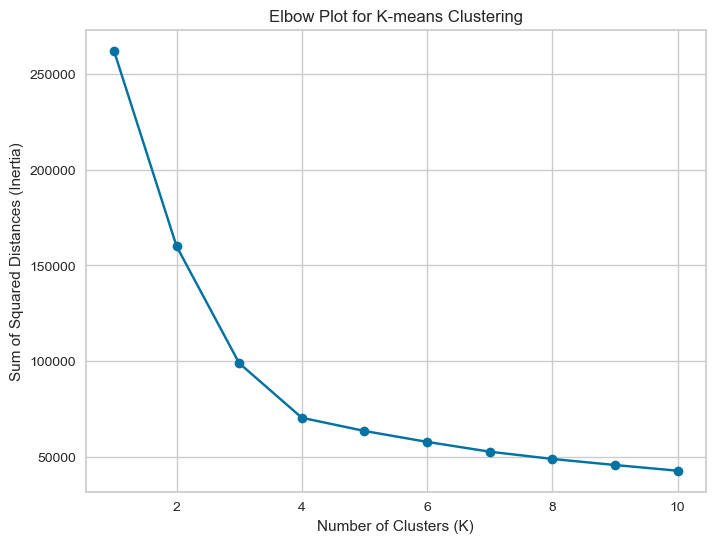

In [10]:
k_values = range(1, 11)  # Trying K from 1 to 10 clusters
inertia_values = []

# Calculate the sum of squared distances (inertia) for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(psy[['O', 'A', 'N']])
    inertia_values.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Plot for K-means Clustering')
plt.grid(True)
plt.show()

In [11]:
num_clusters = 4

Silhouette values show O, C, anc N are slightly better

In [12]:
kmeans1 = KMeans(n_clusters=num_clusters)
kmeans1.fit(psy[['O', 'A', 'N']])
cluster_assignments = kmeans1.labels_
cluster_centers = kmeans1.cluster_centers_
sil_score = shs(psy[['O', 'A', 'N']], cluster_assignments)
sil_score

0.43056454666110144

In [13]:
kmeans2 = KMeans(n_clusters=num_clusters)
kmeans2.fit(psy[['O', 'E', 'N']])
cluster_assignments = kmeans2.labels_
cluster_centers = kmeans2.cluster_centers_
sil_score = shs(psy[['O', 'E', 'N']], cluster_assignments)
sil_score

0.4307046332356657

In [14]:
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(psy[['O', 'C', 'N']])
cluster_assignments = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
sil_score = shs(psy[['O', 'C', 'N']], cluster_assignments)
sil_score

0.43247306783540357

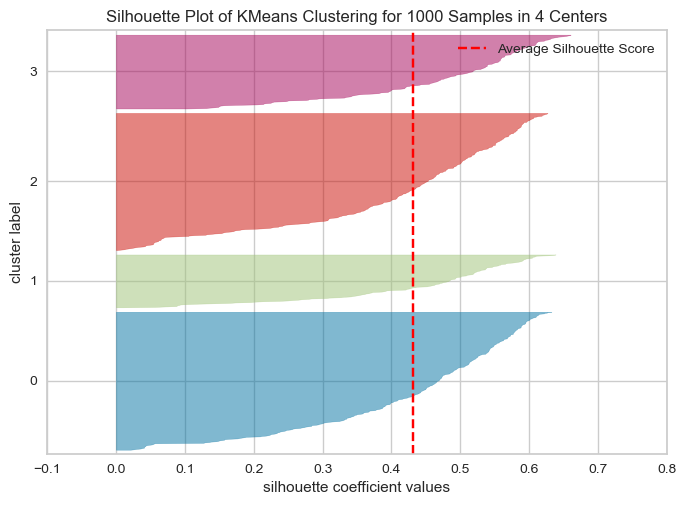

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [15]:
visualizer = SilhouetteVisualizer(kmeans1, colors='yellowbrick')

visualizer.fit(psy[['O', 'A', 'N']])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

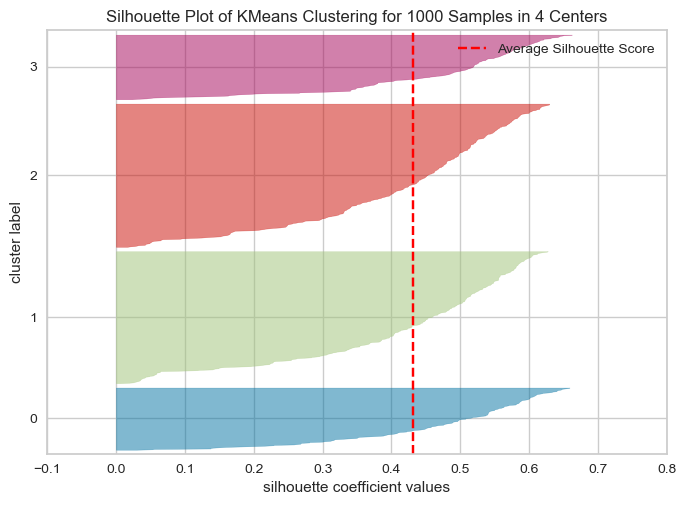

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [16]:
visualizer = SilhouetteVisualizer(kmeans2, colors='yellowbrick')

visualizer.fit(psy[['O', 'E', 'N']])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

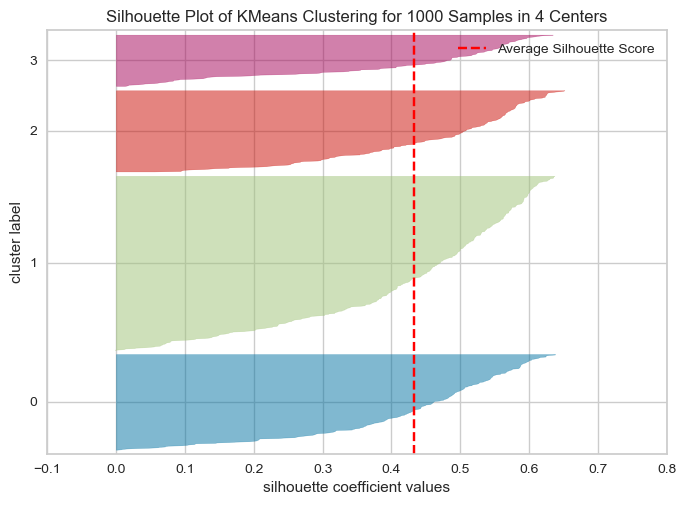

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [17]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(psy[['O', 'C', 'N']])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

The 3-D visualization shows there is a distinction between the psychometric groupings that will be assigned to users

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


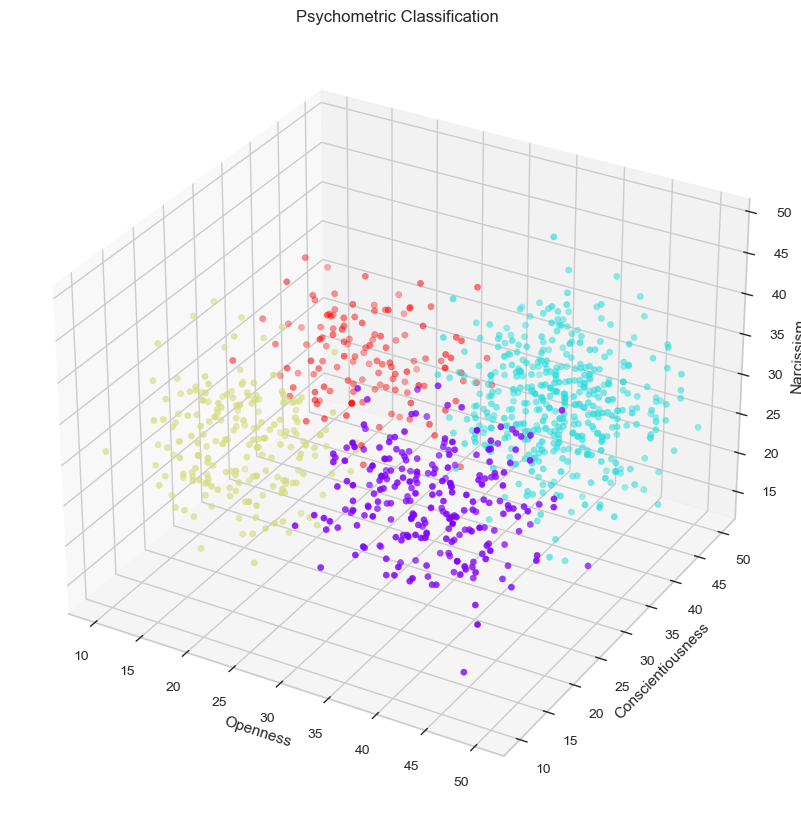

In [18]:
# Create a 3D scatterplot
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(1,1,1, projection='3d')

ax.scatter(psy['O'], psy['C'], psy['N'], c=cluster_assignments, cmap='rainbow')

ax.set_xlabel('Openness')
ax.set_ylabel('Conscientiousness')
ax.set_zlabel('Narcissism')
ax.set_title('Psychometric Classification')

plt.legend()
plt.show()

Assign psychometric groups to users

In [19]:
psy['cluster'] = cluster_assignments
ldap = pd.merge(ldap, psy[['user_id', 'cluster']], on='user_id', how='left')

Determine the first date that a user exhibits insider behavior in a separate dataframe.

In [21]:
date_detected = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/earliest.csv')
date_detected['datetime'] = pd.to_datetime(date_detected['date'], infer_datetime_format=True)
date_detected['day_date'] = pd.to_datetime(date_detected['datetime']).dt.date

Assign activity types to records in these dataframes as they are not identified within the logs

In [22]:
df3['activity'] = "email"
df4['activity'] = "file"
df5['activity'] = "http"

Do some date pre-processing activities for time series analysis

In [23]:
START = datetime.date(2010,1,1)
END = datetime.date(2010,12,31)

df1['date'] = pd.to_datetime(df1['date'], infer_datetime_format=True)
df1['day_date'] = pd.to_datetime(df1['date']).dt.date

df2['date'] = pd.to_datetime(df2['date'], infer_datetime_format=True)
df2['day_date'] = pd.to_datetime(df2['date']).dt.date

df3['date'] = pd.to_datetime(df3['date'], infer_datetime_format=True)
df3['day_date'] = pd.to_datetime(df3['date']).dt.date

df4['date'] = pd.to_datetime(df4['date'], infer_datetime_format=True)
df4['day_date'] = pd.to_datetime(df4['date']).dt.date

df5['date'] = pd.to_datetime(df5['date'], infer_datetime_format=True)
df5['day_date'] = pd.to_datetime(df5['date']).dt.date

df1 = df1.loc[((df1['day_date'] >= START) & (df1['day_date'] <= END))]
df2 = df2.loc[((df2['day_date'] >= START) & (df2['day_date'] <= END))]
df3 = df3.loc[((df3['day_date'] >= START) & (df3['day_date'] <= END))]
df4 = df4.loc[((df4['day_date'] >= START) & (df4['day_date'] <= END))]
df5 = df5.loc[((df5['day_date'] >= START) & (df5['day_date'] <= END))]

Remove text fields to save on memory.  Can be changed if NLP features are added in future research.

In [27]:
df5['content'].fillna('', inplace=True)
# df5['tokenized'] = df5['content'].apply(prepare_text)
df3["content"] = ''
df4["content"] = ''

Merge into single dataframe, assign labels to records, and merge LDAP records into each activity record.

In [30]:
df_time_range = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
# for l in df_files:
#     l.drop(l.index , inplace=True)

df_time_range['label'] = 'normal'
df_time_range.loc[df_time_range['id'].isin(ans['id']),['label']] = 'abnormal'

In [33]:
userEvents = df_time_range

In [34]:
ldap = ldap.rename(columns={'user_id': 'user'})
userEvents = pd.merge(userEvents, ldap, on='user', how='left')

To determine emails from supervisors to users, add the supervisors email as a field in activity records

In [35]:
supervisor_info = ldap[['employee_name', 'email']]
supervisor_info.rename(columns={'email':'supervisor_email', 'employee_name':'supervisor'}, inplace=True)
userEvents = pd.merge(userEvents, supervisor_info, on='supervisor', how='left')

Create the daily activity vector with 20 features modified from prior research.

In [36]:
dates = pd.date_range(start=START, end=END)

START_TIME = datetime.time(8, 00)
END_TIME = datetime.time(19, 00)

dateActivity = []
users = userEvents['user']
users = users.unique()

for d in tqdm(dates):
    daysEvents = userEvents.loc[(userEvents['day_date'] == d.date())]
    for u in users:
        activityList = []
        userdf = daysEvents.loc[(daysEvents['user'] == u)]
        userdf.sort_values(by='date', inplace=True)
        userdf.reset_index(drop=True, inplace=True)
        httpDailyCorpus = userdf.loc[userdf['activity'] == 'http']
        combined_start = datetime.datetime.combine(d, START_TIME)
        combined_end = datetime.datetime.combine(d, END_TIME)
        pcs = userdf['pc'].unique()
        if (userdf.loc[userdf['activity'] == 'Logon'].shape[0] > 0):
            l_df = userdf.loc[((userdf['activity'] == 'Logon') | (userdf['activity'] == 'Logoff'))]
            l_df.reset_index(drop=True, inplace=True)
            l1 = (combined_start - l_df['date'].loc[l_df['activity'] == 'Logon'].iloc[0]).total_seconds()
            l2 = (l_df['date'].loc[l_df['activity'] == 'Logon'].iloc[-1] - combined_end).total_seconds()
            l3 = (combined_start - l_df['date'].loc[(l_df['activity'] == 'Logon') & (l_df['date'] <  combined_start)]).mean().total_seconds()
            if np.isnan(l3): l3 = 0
            l4 = (l_df['date'].loc[(l_df['activity'] == 'Logon') & (l_df['date'] >  combined_end)] - combined_end).mean().total_seconds()
            if np.isnan(l4): l4 = 0 
            l5 = (l_df.loc[l_df['activity'] == 'Logon']).shape[0]
            l6 = (l_df.loc[(l_df['activity'] == 'Logon') & ((l_df['date'] > combined_end) | (l_df['date'] < combined_start))]).shape[0]
            l7 = l_df['pc'].unique().shape[0]
            l8 = l_df['pc'].loc[(l_df['activity'] == 'Logon') & ((l_df['date'] >  combined_end) | (l_df['date'] < combined_start))].shape[0]
            session_lengths = []
            for p in pcs:
                p_df = l_df.loc[(l_df['pc'] == p)]
                initial_login = True
                for index, row in p_df.iterrows():
                    if initial_login == True:
                        if (row['activity'] == 'Logon'):
                            session_start = row['date']
                            initial_login = False
                    if (row['activity'] == 'Logoff'):
                        session_stop = row['date']
                        initial_login = True
                        length = (session_stop - session_start).total_seconds()
                        if ((session_stop < combined_start) | (session_start > combined_end)):
                            session_lengths.append(length)
            if len(session_lengths) > 0:
                l9 = sum(session_lengths)/len(session_lengths)
            else:
                l9 = 0
            d1 = (userdf.loc[(userdf['activity'] == 'Connect') & ((userdf['date'] < combined_start) | (userdf['date'] >  combined_end))]).shape[0]
            d2 = (userdf.loc[userdf['activity'] == 'Connect']).shape[0]
            file_sub_df = userdf.dropna(subset = ['filename'])
            f1 = (file_sub_df.loc[file_sub_df['filename'].str.contains(".exe")]).shape[0]
            f2 = file_sub_df.shape[0]
            f3 = (userdf.loc[(userdf['activity'] == 'file') & ((userdf['date'] < combined_start) | (userdf['date'] >  combined_end))]).shape[0]
            email_sub_df = userdf.dropna(subset = ['to'])
            e1 = (email_sub_df[email_sub_df['to'].str.contains("@dtaa") == False]).shape[0]
            e2 = (email_sub_df[email_sub_df['to'] == email_sub_df['supervisor_email']]).shape[0]
            e3 = (email_sub_df['attachments'].sum())
            e4 = (email_sub_df['size'].sum()) / (email_sub_df['size'].shape[0])
            if np.isnan(e4): e4 = 0
            e5 = email_sub_df['to'].str.count('@').sum()
            http_sub_df = userdf.dropna(subset = ['url'])
            # h1 = (http_sub_df[http_sub_df['url'].str.contains("wikileak")]).shape[0]

            h1 = userdf.loc[(userdf['activity'] == 'http')].shape[0]
            # h2 = (userdf.loc[(userdf['activity'] == 'http') & ((userdf['date'] < combined_start) | (userdf['date'] >  combined_end))]).shape[0]
            # h1 = (http_sub_df[http_sub_df['url'].str.contains("wikileak")]).shape[0]
            # hack_search_for = ['hack', 'backdoor', 'virus', 'malware']
            # h2 = (http_sub_df[http_sub_df['content'].str.contains('|'.join(hack_search_for))]).shape[0]
            # job_search_for = ['resume', 'career', 'job offer', 'job search', 'job posting', 'job application']
            # h3 = (http_sub_df[http_sub_df['content'].str.contains('|'.join(hack_search_for))]).shape[0]
            activityList = [l1, l2, l3, l4, l5, l6, l7, l8, l9, d1, d2, f1, f2, f3, e1, e2, e3, e4, e5, h1]
            # h4 = ''
            # for index, row in httpDailyCorpus.iterrows():
            #     h4 = h4 + row['tokenized']
            label = 0
            if (userdf[(userdf['label'] == 'abnormal')].shape[0] > 0): label = 1
            dateActivity.append([d, u, activityList, label])

In [39]:
final = pd.DataFrame(dateActivity, columns=['date', 'user', 'activityList','label'])

In [40]:
df_temp = pd.DataFrame(final['activityList'].tolist())
df_final = pd.DataFrame()

In [42]:
df_final = final.join(df_temp)

df_final.rename(columns={0: "l1"}, inplace=True)
df_final.rename(columns={1: "l2"}, inplace=True)
df_final.rename(columns={2: "l3"}, inplace=True)
df_final.rename(columns={3: "l4"}, inplace=True)
df_final.rename(columns={4: "l5"}, inplace=True)
df_final.rename(columns={5: "l6"}, inplace=True)
df_final.rename(columns={6: "l7"}, inplace=True)
df_final.rename(columns={7: "l8"}, inplace=True)
df_final.rename(columns={8: "l9"}, inplace=True)
df_final.rename(columns={9: "d1"}, inplace=True)
df_final.rename(columns={10: "d2"}, inplace=True)
df_final.rename(columns={11: "f1"}, inplace=True)
df_final.rename(columns={12: "f2"}, inplace=True)
df_final.rename(columns={13: "f3"}, inplace=True)
df_final.rename(columns={14: "e1"}, inplace=True)
df_final.rename(columns={15: "e2"}, inplace=True)
df_final.rename(columns={16: "e3"}, inplace=True)
df_final.rename(columns={17: "e4"}, inplace=True)
df_final.rename(columns={18: "e5"}, inplace=True)
df_final.rename(columns={19: "h1"}, inplace=True)
# df_final.rename(columns={20: "h2"}, inplace=True)
# df_final.rename(columns={19: "h3"}, inplace=True)

In [44]:
# indTFIDF = pd.DataFrame()

# for d in tqdm(dates):
#     daysEvents = df_final.loc[(df_final['date'] == d)]
#     daysEvents.reset_index(inplace=True, drop=True)
#     daily_users = daysEvents['user']
#     daily_users = daily_users.unique()
#     user_count = daily_users.shape[0]

#     if (user_count > 1):
#         tfidf_vectorizer = TfidfVectorizer()
#         tfidf_matrix = tfidf_vectorizer.fit_transform(daysEvents['h4'])
#         a = tfidf_matrix.toarray()
#         b = np.sort(a, axis=-1, kind=None, order=None)
#         c = b[:,-5:]
#         boo = pd.DataFrame(c)
#         daysEvents = daysEvents.join(boo, how='left')

#         indTFIDF = pd.concat([indTFIDF, daysEvents])

# df_final = df_final.merge(indTFIDF[['user','date',0,1,2,3,4]], on=['user', 'date'])

# df_final.rename(columns={0: 'ind0', 1: 'ind1', 2: 'ind2', 3: 'ind3', 4: 'ind4'}, inplace=True)

In [46]:
# df_final.to_pickle("pickle.pkl")  

In [48]:
# df_final['indTFIDFMean'] = df_final[['ind0','ind1','ind2','ind3','ind4']].mean(axis=1)
# df_final['activityList'] = df_final[[l1, l2, l3, l4, l5, l6, l7, l8, l9, d1, d2, f1, e1, e2, e3, e4, e5]].values.tolist()

# Role Distance Measurement

Get the mean activity for each role within the organization.  Must have at least 5 active users in a role to be considered.

In [50]:
df_final = pd.merge(df_final, ldap, on='user', how='left')
df_final['role'].fillna("other", inplace=True)
roles = df_final['role']
roles = roles.unique()

In [51]:
roleDateActivity = []

for d in tqdm(dates):
    daysEvents = df_final.loc[(df_final['date'] == d)]
    for r in roles:
        role_df = daysEvents.loc[(daysEvents['role'] == r)]
        roleActivityList = []

        # daily_users = psy_df['user']
        # daily_users = daily_users.unique()
        # user_count = daily_users.shape[0]
        user_count = role_df.shape[0]

        if (user_count >= 5):
            l1m = role_df['l1'].mean()
            l2m = role_df['l2'].mean()
            l3m = role_df['l3'].mean()
            l4m = role_df['l4'].mean()
            l5m = role_df['l5'].mean()
            l6m = role_df['l6'].mean()
            l7m = role_df['l7'].mean()
            l8m = role_df['l8'].mean()
            l9m = role_df['l9'].mean()
            d1m = role_df['d1'].mean()
            d2m = role_df['d2'].mean()
            f1m = role_df['f1'].mean()
            f2m = role_df['f2'].mean()
            f3m = role_df['f3'].mean()
            e1m = role_df['e1'].mean()
            e2m = role_df['e2'].mean()
            e3m = role_df['e3'].mean()
            e4m = role_df['e4'].mean()
            e5m = role_df['e5'].mean()

            h1m = role_df['h1'].mean()
            # h2m = role_df['h2'].mean()
            # h3m = role_df['h3'].mean()

            roleActivityList = [l1m, l2m, l3m, l4m, l5m, l6m, l7m, l8m, l9m, d1m, d2m, f1m, f2m, f3m, e1m, e2m, e3m, e4m, e5m, h1m]
            roleDateActivity.append([d, r, roleActivityList])


100%|██████████| 365/365 [00:04<00:00, 82.66it/s]


In [52]:
role_mean_df = pd.DataFrame(roleDateActivity, columns=['date', 'role', 'roleActivityList'])
df_final = pd.merge(df_final, role_mean_df, on=['date', 'role'], how='left')
df_final.dropna(subset = ['roleActivityList'], inplace=True)
df_temp = pd.DataFrame(df_final['roleActivityList'].tolist())
df_final = df_final.join(df_temp)

In [53]:
df_final.rename(columns={0: "rl1t"}, inplace=True)
df_final.rename(columns={1: "rl2t"}, inplace=True)
df_final.rename(columns={2: "rl3t"}, inplace=True)
df_final.rename(columns={3: "rl4t"}, inplace=True)
df_final.rename(columns={4: "rl5t"}, inplace=True)
df_final.rename(columns={5: "rl6t"}, inplace=True)
df_final.rename(columns={6: "rl7t"}, inplace=True)
df_final.rename(columns={7: "rl8t"}, inplace=True)
df_final.rename(columns={8: "rl9t"}, inplace=True)
df_final.rename(columns={9: "rd1t"}, inplace=True)
df_final.rename(columns={10: "rd2t"}, inplace=True)
df_final.rename(columns={11: "rf1t"}, inplace=True)
df_final.rename(columns={12: "rf2t"}, inplace=True)
df_final.rename(columns={13: "rf3t"}, inplace=True)
df_final.rename(columns={14: "re1t"}, inplace=True)
df_final.rename(columns={15: "re2t"}, inplace=True)
df_final.rename(columns={16: "re3t"}, inplace=True)
df_final.rename(columns={17: "re4t"}, inplace=True)
df_final.rename(columns={18: "re5t"}, inplace=True)
df_final.rename(columns={19: "rh1t"}, inplace=True)
# df_final.rename(columns={20: "rh2t"}, inplace=True)
# df_final.rename(columns={19: "rh3t"}, inplace=True)

df_final.dropna(subset = ['rl2t'], inplace=True)

In [54]:
# roleTFIDF = pd.DataFrame()

# for d in tqdm(dates):
#     daysEvents = df_final.loc[(df_final['date'] == d)]
#     daysEvents.reset_index(inplace=True, drop=True)

#     for r in roles:
#         role_df = daysEvents.loc[(daysEvents['role'] == r)]
#         role_df.reset_index(inplace=True, drop=True)
#         daily_users = role_df['user'].unique()
#         user_count = daily_users.shape[0]

#         if (user_count > 20):
#             tfidf_vectorizer = TfidfVectorizer()
#             tfidf_matrix = tfidf_vectorizer.fit_transform(role_df['h4'])
#             a = tfidf_matrix.toarray()
#             b = np.sort(a, axis=-1, kind=None, order=None)
#             c = b[:,-5:]
#             boo = pd.DataFrame(c)
#             role_df = role_df.join(boo, how='left')

#             roleTFIDF = pd.concat([roleTFIDF, role_df])

# df_final = df_final.merge(roleTFIDF[['user','date',0,1,2,3,4]], on=['user', 'date'])

In [55]:
# df_final.rename(columns={0: 'rol0', 1: 'rol1', 2: 'rol2', 3: 'rol3', 4: 'rol4'}, inplace=True)
# df_final['roleTFIDFMean'] = df_final[['rol0','rol1','rol2','rol3','rol4']].mean(axis=1)

In [56]:
df_final['roleActivityList'] = df_final[['rl1t', 'rl2t', 'rl3t', 'rl4t', 'rl5t', 'rl6t', 'rl7t', 'rl8t', 'rl9t', 'rd1t','rd2t','rf1t', 'rf2t', 'rf3t', 're1t', 're2t', 're3t', 're4t','re5t',  'rh1t']].values.tolist()

Calculate the distance between the user's activity vector and that of the role the user belongs to.  Cosine Similarity, Euclidiean Distance, and Dot Product.

In [57]:
temp = []
for index, row in tqdm(df_final.iterrows()):
    roleDist = abs(np.subtract(np.array(row['activityList']), np.array(row['roleActivityList'])))
    A = np.array(row['activityList'])
    B = np.array(row['roleActivityList'])
    cos_sim = cosine_similarity([A], [B])
    cos_sim = cos_sim[0,0]
    euc_dist = euclidean_distances([A], [B])
    euc_dist = euc_dist[0,0]
    dot_prod = np.dot(A, B)
    user = row['user']
    date = row['date']
    list_row = {'role_dist':roleDist, 'cos_sim':cos_sim, 'euc_dist':euc_dist, 'dot_prod':dot_prod, 'user':user, 'date':date}
    temp.append(list_row)

0it [00:00, ?it/s]

228520it [00:47, 4844.67it/s]


In [58]:
df_temp = pd.DataFrame(temp, columns=['role_dist', 'user', 'date', 'cos_sim', 'euc_dist', 'dot_prod'])

In [59]:
df_temp2 = pd.DataFrame(df_temp['role_dist'].tolist())
df_temp = df_temp.join(df_temp2)


df_temp.rename(columns={0: "rl1"}, inplace=True)
df_temp.rename(columns={1: "rl2"}, inplace=True)
df_temp.rename(columns={2: "rl3"}, inplace=True)
df_temp.rename(columns={3: "rl4"}, inplace=True)
df_temp.rename(columns={4: "rl5"}, inplace=True)
df_temp.rename(columns={5: "rl6"}, inplace=True)
df_temp.rename(columns={6: "rl7"}, inplace=True)
df_temp.rename(columns={7: "rl8"}, inplace=True)
df_temp.rename(columns={8: "rl9"}, inplace=True)
df_temp.rename(columns={9: "rd1"}, inplace=True)
df_temp.rename(columns={10: "rd2"}, inplace=True)
df_temp.rename(columns={11: "rf1"}, inplace=True)
df_temp.rename(columns={12: "rf2"}, inplace=True)
df_temp.rename(columns={13: "rf3"}, inplace=True)
df_temp.rename(columns={14: "re1"}, inplace=True)
df_temp.rename(columns={15: "re2"}, inplace=True)
df_temp.rename(columns={16: "re3"}, inplace=True)
df_temp.rename(columns={17: "re4"}, inplace=True)
df_temp.rename(columns={18: "re5"}, inplace=True)
df_temp.rename(columns={19: "rh1"}, inplace=True)
# df_temp.rename(columns={20: "rh2"}, inplace=True)
# df_temp.rename(columns={19: "rh3"}, inplace=True)

# df_temp.rename(columns={11: "rt1"}, inplace=True)
df_final = pd.merge(df_final, df_temp, on=['user', 'date'], how='left')

# Psy Distance Measurement

This is the same as the role distance section, but now the Pschometric classification is used to measure the difference.

In [60]:
df_final['cluster']= df_final['cluster'].map(str)
clusters = df_final['cluster']
clusters = clusters.unique()

In [61]:
psyDateActivity = []

for d in tqdm(dates):
    daysEvents = df_final.loc[(df_final['date'] == d)]
    for c in clusters:
        psy_df = daysEvents.loc[(daysEvents['cluster'] == c)]
        psyActivityList = []

        # daily_users = psy_df['user']
        # daily_users = daily_users.unique()
        # user_count = daily_users.shape[0]
        user_count = psy_df.shape[0]

        if (user_count >= 5):
            l1p = psy_df['l1'].mean()
            l2p = psy_df['l2'].mean()
            l3p = psy_df['l3'].mean()
            l4p = psy_df['l4'].mean()
            l5p = psy_df['l5'].mean()
            l6p = psy_df['l6'].mean()
            l7p = psy_df['l7'].mean()
            l8p = psy_df['l8'].mean()
            l9p = psy_df['l9'].mean()
            d1p = psy_df['d1'].mean()
            d2p = psy_df['d2'].mean()
            f1p = psy_df['f1'].mean()
            f2p = psy_df['f2'].mean()
            f3p = psy_df['f3'].mean()
            e1p = psy_df['e1'].mean()
            e2p = psy_df['e2'].mean()
            e3p = psy_df['e3'].mean()
            e4p = psy_df['e4'].mean()
            e5p = psy_df['e5'].mean()
            h1p = psy_df['h1'].mean()
            # h2p = role_df['h2'].mean()
            # h3p = role_df['h3'].mean()     
            
            psyActivityList = [l1p, l2p, l3p, l4p, l5p, l6p, l7p, l8p, l9p, d1p, d2p, f1p, f2p, f3p, e1p, e2p, e3p, e4p, e5p, h1p]
            psyDateActivity.append([d, c, psyActivityList])
 
    

100%|██████████| 365/365 [00:00<00:00, 484.89it/s]


In [63]:
psy_mean_df = pd.DataFrame(psyDateActivity, columns=['date', 'cluster', 'psyActivityList'])
df_final = pd.merge(df_final, psy_mean_df, on=['date', 'cluster'], how='left')
df_final.dropna(subset = ['psyActivityList'], inplace=True)
df_temp = pd.DataFrame(df_final['psyActivityList'].tolist())
df_final = df_final.join(df_temp)

In [64]:
df_final.rename(columns={0: "pl1t"}, inplace=True)
df_final.rename(columns={1: "pl2t"}, inplace=True)
df_final.rename(columns={2: "pl3t"}, inplace=True)
df_final.rename(columns={3: "pl4t"}, inplace=True)
df_final.rename(columns={4: "pl5t"}, inplace=True)
df_final.rename(columns={5: "pl6t"}, inplace=True)
df_final.rename(columns={6: "pl7t"}, inplace=True)
df_final.rename(columns={7: "pl8t"}, inplace=True)
df_final.rename(columns={8: "pl9t"}, inplace=True)
df_final.rename(columns={9: "pd1t"}, inplace=True)
df_final.rename(columns={10: "pd2t"}, inplace=True)
df_final.rename(columns={11: "pf1t"}, inplace=True)
df_final.rename(columns={12: "pf2t"}, inplace=True)
df_final.rename(columns={13: "pf3t"}, inplace=True)
df_final.rename(columns={14: "pe1t"}, inplace=True)
df_final.rename(columns={15: "pe2t"}, inplace=True)
df_final.rename(columns={16: "pe3t"}, inplace=True)
df_final.rename(columns={17: "pe4t"}, inplace=True)
df_final.rename(columns={18: "pe5t"}, inplace=True)
df_final.rename(columns={19: "ph1t"}, inplace=True)
# df_final.rename(columns={20: "ph2t"}, inplace=True)
# df_final.rename(columns={19: "ph3t"}, inplace=True)

df_final.dropna(subset = ['pl2t'], inplace=True)

In [65]:
# psyTFIDF = pd.DataFrame()

# for d in tqdm(dates):
#     daysEvents = df_final.loc[(df_final['date'] == d)]
#     daysEvents.reset_index(inplace=True, drop=True)

#     for c in clusters:
#         psy_df = daysEvents.loc[(daysEvents['cluster'] == c)]
#         psy_df.reset_index(inplace=True, drop=True)
#         daily_users = psy_df['user'].unique()
#         user_count = daily_users.shape[0]

#         if (user_count > 20):
#             tfidf_vectorizer = TfidfVectorizer()
#             tfidf_matrix = tfidf_vectorizer.fit_transform(psy_df['h4'])
#             a = tfidf_matrix.toarray()
#             b = np.sort(a, axis=-1, kind=None, order=None)
#             c = b[:,-5:]
#             boo = pd.DataFrame(c)
#             psy_df = psy_df.join(boo, how='left')

#             psyTFIDF = pd.concat([psyTFIDF, psy_df])

# df_final = df_final.merge(psyTFIDF[['user','date',0,1,2,3,4]], on=['user', 'date'])

In [66]:
# df_final.rename(columns={0: 'psy0', 1: 'psy1', 2: 'psy2', 3: 'psy3', 4: 'psy4'}, inplace=True)
# df_final['psyTFIDFMean'] = df_final[['psy0','psy1','psy2','psy3','psy4']].mean(axis=1)

In [67]:
df_final['psyActivityList'] = df_final[['pl1t', 'pl2t', 'pl3t', 'pl4t', 'pl5t','pl6t','pl7t','pl8t', 'pl9t', 'pd1t','pd2t','pf1t', 'pf2t', 'pf3t', 'pe1t','pe2t','pe3t','pe4t','pe5t', 'ph1t']].values.tolist()

In [68]:
temp = []
for index, row in df_final.iterrows():
    psyDist = abs(np.subtract(np.array(row['activityList']), np.array(row['psyActivityList'])))
    A = np.array(row['activityList'])
    B = np.array(row['psyActivityList'])
    cos_sim = cosine_similarity([A], [B])
    cos_sim = cos_sim[0,0]
    euc_dist = euclidean_distances([A], [B])
    euc_dist = euc_dist[0,0]
    dot_prod = np.dot(A, B)
    user = row['user']
    date = row['date']
    list_row = {'psy_dist':psyDist, 'cos_sim_p':cos_sim, 'euc_dist_p':euc_dist, 'dot_prod_p':dot_prod, 'user':user, 'date':date}

    temp.append(list_row)


In [69]:
df_temp = pd.DataFrame(temp, columns=['psy_dist', 'user', 'date', 'cos_sim_p', 'euc_dist_p', 'dot_prod_p'])

In [70]:
df_temp2 = pd.DataFrame(df_temp['psy_dist'].tolist())
df_temp = df_temp.join(df_temp2)

df_temp.rename(columns={0: "pl1"}, inplace=True)
df_temp.rename(columns={1: "pl2"}, inplace=True)
df_temp.rename(columns={2: "pl3"}, inplace=True)
df_temp.rename(columns={3: "pl4"}, inplace=True)
df_temp.rename(columns={4: "pl5"}, inplace=True)
df_temp.rename(columns={5: "pl6"}, inplace=True)
df_temp.rename(columns={6: "pl7"}, inplace=True)
df_temp.rename(columns={7: "pl8"}, inplace=True)
df_temp.rename(columns={8: "pl9"}, inplace=True)
df_temp.rename(columns={9: "pd1"}, inplace=True)
df_temp.rename(columns={10: "pd2"}, inplace=True)
df_temp.rename(columns={11: "pf1"}, inplace=True)
df_temp.rename(columns={12: "pf2"}, inplace=True)
df_temp.rename(columns={13: "pf3"}, inplace=True)
df_temp.rename(columns={14: "pe1"}, inplace=True)
df_temp.rename(columns={15: "pe2"}, inplace=True)
df_temp.rename(columns={16: "pe3"}, inplace=True)
df_temp.rename(columns={17: "pe4"}, inplace=True)
df_temp.rename(columns={18: "pe5"}, inplace=True)
df_temp.rename(columns={19: "ph1"}, inplace=True)
# df_temp.rename(columns={20: "ph2"}, inplace=True)
# df_temp.rename(columns={19: "ph3"}, inplace=True)

# df_temp.rename(columns={11: "pt1"}, inplace=True)

df_final = pd.merge(df_final, df_temp, on=['user', 'date'], how='left')

Save a pickle file to have a save point to go back to.  Currently at pickle version 10.  Comment it out to not loose the golden version of the pre-processed dataset.

In [71]:
# df_final.to_pickle("pickle-final10.pkl")

# START HERE

Load the libraries and pickle file so as to reduce time to start up analysis approaches and recover from system failures.

In [1]:
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    average_precision_score)

import pandas as pd
import seaborn as sn
import datetime
from itertools import chain
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random
import itertools

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score as shs
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder
from scipy.signal import periodogram
from scipy import stats
from scipy.stats import entropy

import warnings
warnings.filterwarnings('ignore')

from tqdm.auto import tqdm

from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

from yellowbrick.cluster import SilhouetteVisualizer

from tslearn.metrics import dtw

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, LSTM, RepeatVector, Dropout
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping

date_detected = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/earliest.csv')
date_detected['datetime'] = pd.to_datetime(date_detected['date'], infer_datetime_format=True)
date_detected['day_date'] = pd.to_datetime(date_detected['datetime']).dt.date

In [2]:
df = pd.read_pickle("pickle-final10.pkl") 

In [3]:
label_encoder = LabelEncoder()

Encode userid and role if needed as features in time series analysis

In [4]:
df['userid'] = label_encoder.fit_transform(df['user'])
df['role'] = label_encoder.fit_transform(df['role'])

These are all the features that will be passed to the ML and DL method sections.  This includes the daily vectors and the rolling calculated features.  Mean, Standard Deviation, Fourier Fast Transform, and Entropy are selected.

In [5]:
feature_role = ['cos_sim', 'cos_sim_p', 'euc_dist', 'euc_dist_p',
              'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'l7', 'l8', 'l9', 'd1', 'd2', 'f1', 'f2', 'f3', 'e1', 'e2', 'e3', 'e4', 'e5', 'h1',
              'rl1', 'rl2', 'rl3', 'rl4', 'rl5', 'rl6', 'rl7', 'rl8', 'rl9', 'rd1', 'rd2', 'rf1', 'rf2', 'rf3', 're1', 're2', 're3', 're4', 're5', 'rh1',
              'pl1', 'pl2', 'pl3', 'pl4', 'pl5', 'pl6', 'pl7', 'pl8', 'pl9', 'pd1', 'pd2', 'pf1', 'pf2', 'pf3', 'pe1', 'pe2', 'pe3', 'pe4', 'pe5', 'ph1',
              'rolling_mean_cos_sim', 'rolling_mean_cos_sim_p', 'rolling_mean_euc_dist', 'rolling_mean_euc_dist_p',
              'rolling_mean_l1', 'rolling_mean_l2', 'rolling_mean_l3', 'rolling_mean_l4', 'rolling_mean_l5', 'rolling_mean_l6', 'rolling_mean_l7', 'rolling_mean_l8', 'rolling_mean_l9', 'rolling_mean_d1', 'rolling_mean_d2', 'rolling_mean_f1',  'rolling_mean_f2',  'rolling_mean_f3', 'rolling_mean_e1', 'rolling_mean_e2', 'rolling_mean_e3', 'rolling_mean_e4', 'rolling_mean_e5',
              'rolling_mean_rl1', 'rolling_mean_rl2', 'rolling_mean_rl3', 'rolling_mean_rl4', 'rolling_mean_rl5', 'rolling_mean_rl6', 'rolling_mean_rl7', 'rolling_mean_rl8', 'rolling_mean_rl9', 'rolling_mean_rd1', 'rolling_mean_rd2', 'rolling_mean_rf1',  'rolling_mean_rf2',  'rolling_mean_rf3', 'rolling_mean_re1', 'rolling_mean_re2',  'rolling_mean_re3', 'rolling_mean_re4', 'rolling_mean_re5',
              'rolling_mean_pl1', 'rolling_mean_pl2', 'rolling_mean_pl3', 'rolling_mean_pl4', 'rolling_mean_pl5', 'rolling_mean_pl6', 'rolling_mean_pl7', 'rolling_mean_pl8', 'rolling_mean_pl9', 'rolling_mean_pd1', 'rolling_mean_pd2', 'rolling_mean_pf1',  'rolling_mean_pf2',  'rolling_mean_pf3', 'rolling_mean_pe1', 'rolling_mean_pe2',  'rolling_mean_pe3', 'rolling_mean_pe4', 'rolling_mean_pe5',
              'rolling_std_cos_sim', 'rolling_std_cos_sim_p', 'rolling_std_euc_dist', 'rolling_std_euc_dist_p',
              'rolling_std_l1', 'rolling_std_l2', 'rolling_std_l3', 'rolling_std_l4', 'rolling_std_l5', 'rolling_std_l6', 'rolling_std_l7', 'rolling_std_l8', 'rolling_std_l9', 'rolling_std_d1', 'rolling_std_d2', 'rolling_std_f1',  'rolling_std_f2',  'rolling_std_f3', 'rolling_std_e1', 'rolling_std_e2', 'rolling_std_e3', 'rolling_std_e4', 'rolling_std_e5',
              'rolling_std_rl1', 'rolling_std_rl2', 'rolling_std_rl3', 'rolling_std_rl4', 'rolling_std_rl5', 'rolling_std_rl6', 'rolling_std_rl7', 'rolling_std_rl8', 'rolling_std_rl9', 'rolling_std_rd1', 'rolling_std_rd2', 'rolling_std_rf1',  'rolling_std_rf2',  'rolling_std_rf3', 'rolling_std_re1', 'rolling_std_re2',  'rolling_std_re3', 'rolling_std_re4', 'rolling_std_re5',
              'rolling_std_pl1', 'rolling_std_pl2', 'rolling_std_pl3', 'rolling_std_pl4', 'rolling_std_pl5', 'rolling_std_pl6', 'rolling_std_pl7', 'rolling_std_pl8', 'rolling_std_pl9', 'rolling_std_pd1', 'rolling_std_pd2', 'rolling_std_pf1',  'rolling_std_pf2',  'rolling_std_pf3', 'rolling_std_pe1', 'rolling_std_pe2',  'rolling_std_pe3', 'rolling_std_pe4', 'rolling_std_pe5',
              'rolling_fft_cos_sim', 'rolling_fft_cos_sim_p', 'rolling_fft_euc_dist', 'rolling_fft_euc_dist_p',
              'rolling_fft_l1', 'rolling_fft_l2', 'rolling_fft_l3', 'rolling_fft_l4', 'rolling_fft_l5', 'rolling_fft_l6', 'rolling_fft_l7', 'rolling_fft_l8', 'rolling_fft_l9', 'rolling_fft_d1', 'rolling_fft_d2', 'rolling_fft_f1',  'rolling_fft_f2',  'rolling_fft_f3', 'rolling_fft_e1', 'rolling_fft_e2', 'rolling_fft_e3', 'rolling_fft_e4', 'rolling_fft_e5',
              'rolling_fft_rl1', 'rolling_fft_rl2', 'rolling_fft_rl3', 'rolling_fft_rl4', 'rolling_fft_rl5', 'rolling_fft_rl6', 'rolling_fft_rl7', 'rolling_fft_rl8', 'rolling_fft_rl9', 'rolling_fft_rd1', 'rolling_fft_rd2', 'rolling_fft_rf1',  'rolling_fft_rf2',  'rolling_fft_rf3', 'rolling_fft_re1', 'rolling_fft_re2',  'rolling_fft_re3', 'rolling_fft_re4', 'rolling_fft_re5',
              'rolling_fft_pl1', 'rolling_fft_pl2', 'rolling_fft_pl3', 'rolling_fft_pl4', 'rolling_fft_pl5', 'rolling_fft_pl6', 'rolling_fft_pl7', 'rolling_fft_pl8', 'rolling_fft_pl9', 'rolling_fft_pd1', 'rolling_fft_pd2', 'rolling_fft_pf1',  'rolling_fft_pf2',  'rolling_fft_pf3', 'rolling_fft_pe1', 'rolling_fft_pe2',  'rolling_fft_pe3', 'rolling_fft_pe4', 'rolling_fft_pe5',
              'rolling_entropy_cos_sim', 'rolling_entropy_cos_sim_p', 'rolling_entropy_euc_dist', 'rolling_entropy_euc_dist_p',
              'rolling_entropy_l1', 'rolling_entropy_l2', 'rolling_entropy_l3', 'rolling_entropy_l4', 'rolling_entropy_l5', 'rolling_entropy_l6', 'rolling_entropy_l7', 'rolling_entropy_l8', 'rolling_entropy_l9', 'rolling_entropy_d1', 'rolling_entropy_d2', 'rolling_entropy_f1',  'rolling_entropy_f2',  'rolling_entropy_f3', 'rolling_entropy_e1', 'rolling_entropy_e2', 'rolling_entropy_e3', 'rolling_entropy_e4', 'rolling_entropy_e5',
              'rolling_entropy_rl1', 'rolling_entropy_rl2', 'rolling_entropy_rl3', 'rolling_entropy_rl4', 'rolling_entropy_rl5', 'rolling_entropy_rl6', 'rolling_entropy_rl7', 'rolling_entropy_rl8', 'rolling_entropy_rl9', 'rolling_entropy_rd1', 'rolling_entropy_rd2', 'rolling_entropy_rf1',  'rolling_entropy_rf2',  'rolling_entropy_rf3', 'rolling_entropy_re1', 'rolling_entropy_re2',  'rolling_entropy_re3', 'rolling_entropy_re4', 'rolling_entropy_re5',
              'rolling_entropy_pl1', 'rolling_entropy_pl2', 'rolling_entropy_pl3', 'rolling_entropy_pl4', 'rolling_entropy_pl5', 'rolling_entropy_pl6', 'rolling_entropy_pl7', 'rolling_entropy_pl8', 'rolling_entropy_pl9', 'rolling_entropy_pd1', 'rolling_entropy_pd2', 'rolling_entropy_pf1',  'rolling_entropy_pf2',  'rolling_entropy_pf3', 'rolling_entropy_pe1', 'rolling_entropy_pe2',  'rolling_entropy_pe3', 'rolling_entropy_pe4', 'rolling_entropy_pe5',
              'user','userid','date','cluster','role','dow','moy','doy','label']


These are the features that will be calculated with rolling windows.

In [6]:
feature_role_rolling = ['cos_sim', 'cos_sim_p', 'euc_dist', 'euc_dist_p',
              'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'l7', 'l8', 'l9', 'd1', 'd2', 'f1', 'f2', 'f3', 'e1', 'e2', 'e3', 'e4', 'e5',
              'rl1', 'rl2', 'rl3', 'rl4', 'rl5', 'rl6', 'rl7', 'rl8', 'rl9', 'rd1', 'rd2', 'rf1', 'rf2', 'rf3', 're1', 're2', 're3', 're4', 're5',
              'pl1', 'pl2', 'pl3', 'pl4', 'pl5', 'pl6', 'pl7', 'pl8', 'pl9', 'pd1', 'pd2', 'pf1', 'pf2', 'pf3', 'pe1', 'pe2', 'pe3', 'pe4', 'pe5']

Creating some time deference field for possible addition to the ML and DL methods.  Saturdays and Sundays are removed since there is vistually no activity on those days.  This can be removed in alternative approaches

In [7]:
df['dow'] = pd.to_datetime(df['date']).dt.day_of_week
df['moy'] = pd.to_datetime(df['date']).dt.month
df['doy'] = pd.to_datetime(df['date']).dt.day_of_year

df = df.loc[df['dow'] < 5]

In [8]:
users = df['user'].unique()

Method to calculate the FFT Power Spectrum.

In [9]:
def fourier_power(data):
    
    frequencies, power_spectrum = periodogram(data, fs=1.0)

    return power_spectrum.sum()

To calculate the rolling statistics for each user and distance to role and psychoetric group.

In [10]:
reconstructed = pd.DataFrame()

roll_period = 5

for u in tqdm(users):
    df_u = df.loc[df['user'] == u]
    df_u.sort_values(by='date', inplace=True, ignore_index=True)
    df_u.reset_index(inplace=True, drop=True)

    for j in feature_role_rolling:
        df_u['rolling_mean_' + j] = df_u[j].rolling(roll_period).mean()
        df_u['rolling_std_' + j] = df_u[j].rolling(roll_period).std()
        df_u['rolling_fft_' + j] = df_u[j].rolling(roll_period * 4 ).apply(fourier_power, raw=False)
        df_u['rolling_entropy_'+ j] = df_u[j].rolling(roll_period).apply(lambda x: entropy(x.value_counts(normalize=True)))

    reconstructed = pd.concat([reconstructed, df_u]) 


  0%|          | 0/974 [00:00<?, ?it/s]

100%|██████████| 974/974 [26:10<00:00,  1.61s/it]


In [34]:
df = reconstructed

In [35]:
df.sort_values(by=['date', 'user'], inplace=True, ignore_index=True)
df.reset_index(inplace=True, drop=True)
df.dropna(subset = ['rolling_fft_l2'], inplace=True)

Assign dataframe to new name to prevent going back to the Start Here point.  Saves time when encountering an error.  There is no y_train or test dataframes as this praxis will be focused on unsupervised approaches.  A notion of test time periods will be introduced in the ML and DL method sections.

In [51]:
X_train = df

In [59]:
X_train.drop(columns=['split'], inplace=True)

# Feature Importance

Self explanatory.  This presents the correlation of features for the rolling statistics.  As expected, there is high correlation within sections such as login, email, file and device activities.

In [60]:
corr_role = ['rolling_mean_l1', 'rolling_mean_l2', 'rolling_mean_l3', 'rolling_mean_l4', 'rolling_mean_l5', 'rolling_mean_l6', 'rolling_mean_l7', 'rolling_mean_l8', 'rolling_mean_l9', 'rolling_mean_d1', 'rolling_mean_d2', 'rolling_mean_f1',  'rolling_mean_f2',  'rolling_mean_f3', 'rolling_mean_e1', 'rolling_mean_e2', 'rolling_mean_e3', 'rolling_mean_e4', 'rolling_mean_e5']
corr_role_2 = ['rolling_std_l1', 'rolling_std_l2', 'rolling_std_l3', 'rolling_std_l4', 'rolling_std_l5', 'rolling_std_l6', 'rolling_std_l7', 'rolling_std_l8', 'rolling_std_l9', 'rolling_std_d1', 'rolling_std_d2', 'rolling_std_f1',  'rolling_std_f2',  'rolling_std_f3', 'rolling_std_e1', 'rolling_std_e2', 'rolling_std_e3', 'rolling_std_e4', 'rolling_std_e5']
corr_role_3 = ['rolling_entropy_l1', 'rolling_entropy_l2', 'rolling_entropy_l3', 'rolling_entropy_l4', 'rolling_entropy_l5', 'rolling_entropy_l6', 'rolling_entropy_l7', 'rolling_entropy_l8', 'rolling_entropy_l9', 'rolling_entropy_d1', 'rolling_entropy_d2', 'rolling_entropy_f1',  'rolling_entropy_f2',  'rolling_entropy_f3', 'rolling_entropy_e1', 'rolling_entropy_e2', 'rolling_entropy_e3', 'rolling_entropy_e4', 'rolling_entropy_e5']
corr_role_4 = ['rolling_fft_l1', 'rolling_fft_l2', 'rolling_fft_l3', 'rolling_fft_l4', 'rolling_fft_l5', 'rolling_fft_l6', 'rolling_fft_l7', 'rolling_fft_l8', 'rolling_fft_l9', 'rolling_fft_d1', 'rolling_fft_d2', 'rolling_fft_f1',  'rolling_fft_f2',  'rolling_fft_f3', 'rolling_fft_e1', 'rolling_fft_e2', 'rolling_fft_e3', 'rolling_fft_e4', 'rolling_fft_e5']

                 rolling_mean_l1  rolling_mean_l2  rolling_mean_l3  \
rolling_mean_l1         1.000000         0.377358         0.905652   
rolling_mean_l2         0.377358         1.000000         0.471530   
rolling_mean_l3         0.905652         0.471530         1.000000   
rolling_mean_l4         0.669913         0.673395         0.715131   
rolling_mean_l5         0.628934         0.927067         0.674614   
rolling_mean_l6         0.896281         0.375776         0.799111   
rolling_mean_l7         0.741991         0.707352         0.786754   
rolling_mean_l8         0.896281         0.375776         0.799111   
rolling_mean_l9         0.218271         0.072118         0.252094   
rolling_mean_d1         0.327853         0.311538         0.344973   
rolling_mean_d2         0.098826         0.222398         0.119769   
rolling_mean_f1         0.055936         0.115408         0.068295   
rolling_mean_f2         0.082530         0.185782         0.101971   
rolling_mean_f3     

<Axes: >

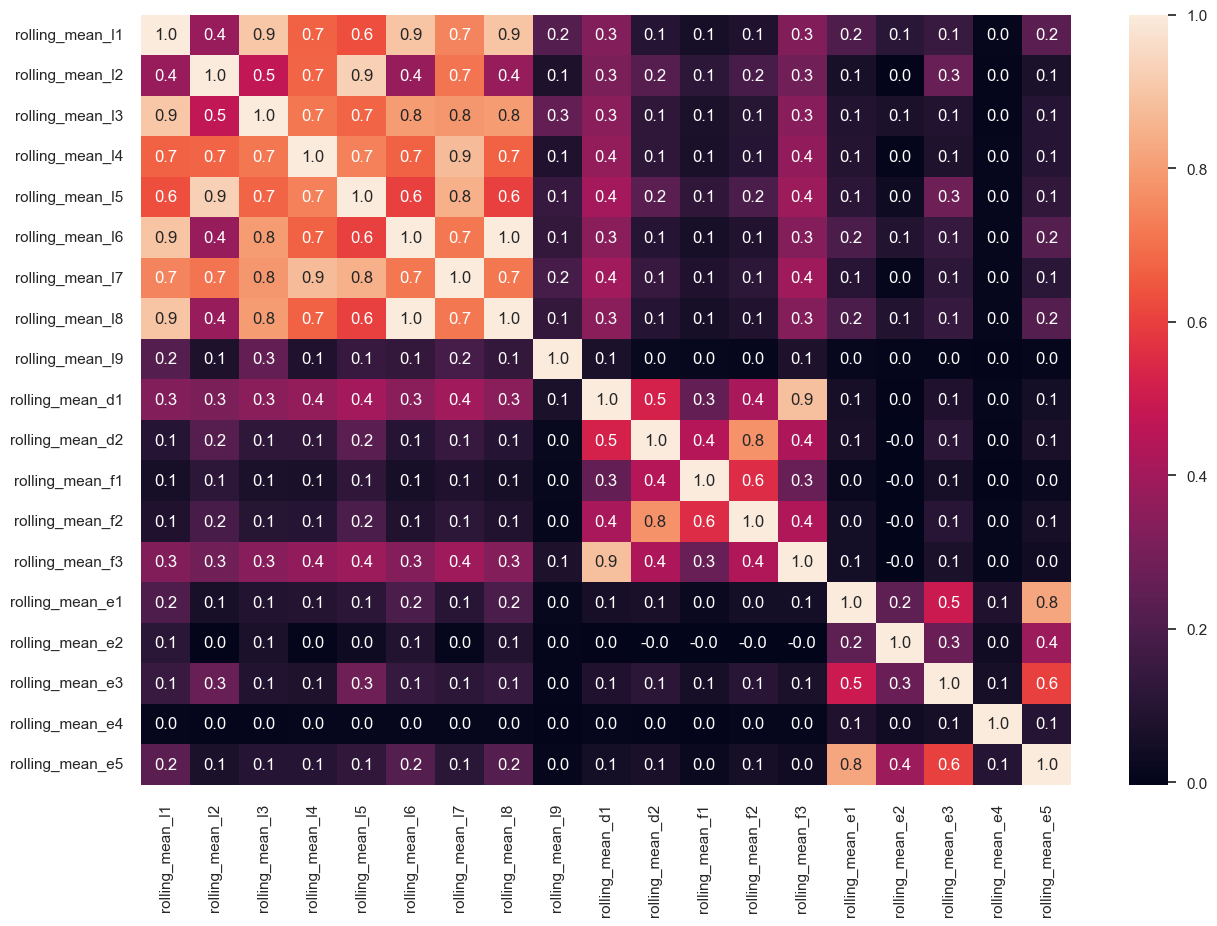

In [61]:
corr_matrix = X_train[corr_role].corr()
print(corr_matrix)
fig, ax = pyplot.subplots(figsize=(15, 10))
sn.set(font_scale=1)
sn.heatmap(corr_matrix, annot=True, fmt='.1f')

                rolling_std_l1  rolling_std_l2  rolling_std_l3  \
rolling_std_l1        1.000000        0.473781        0.953904   
rolling_std_l2        0.473781        1.000000        0.441339   
rolling_std_l3        0.953904        0.441339        1.000000   
rolling_std_l4        0.688335        0.628175        0.637333   
rolling_std_l5        0.658447        0.820089        0.613698   
rolling_std_l6        0.623037        0.449746        0.594549   
rolling_std_l7        0.657170        0.624814        0.604960   
rolling_std_l8        0.623037        0.449746        0.594549   
rolling_std_l9        0.328764        0.305625        0.332976   
rolling_std_d1        0.241099        0.225479        0.216933   
rolling_std_d2        0.124076        0.282167        0.114928   
rolling_std_f1        0.069275        0.102782        0.062935   
rolling_std_f2        0.114622        0.237953        0.105294   
rolling_std_f3        0.272506        0.203206        0.242939   
rolling_st

<Axes: >

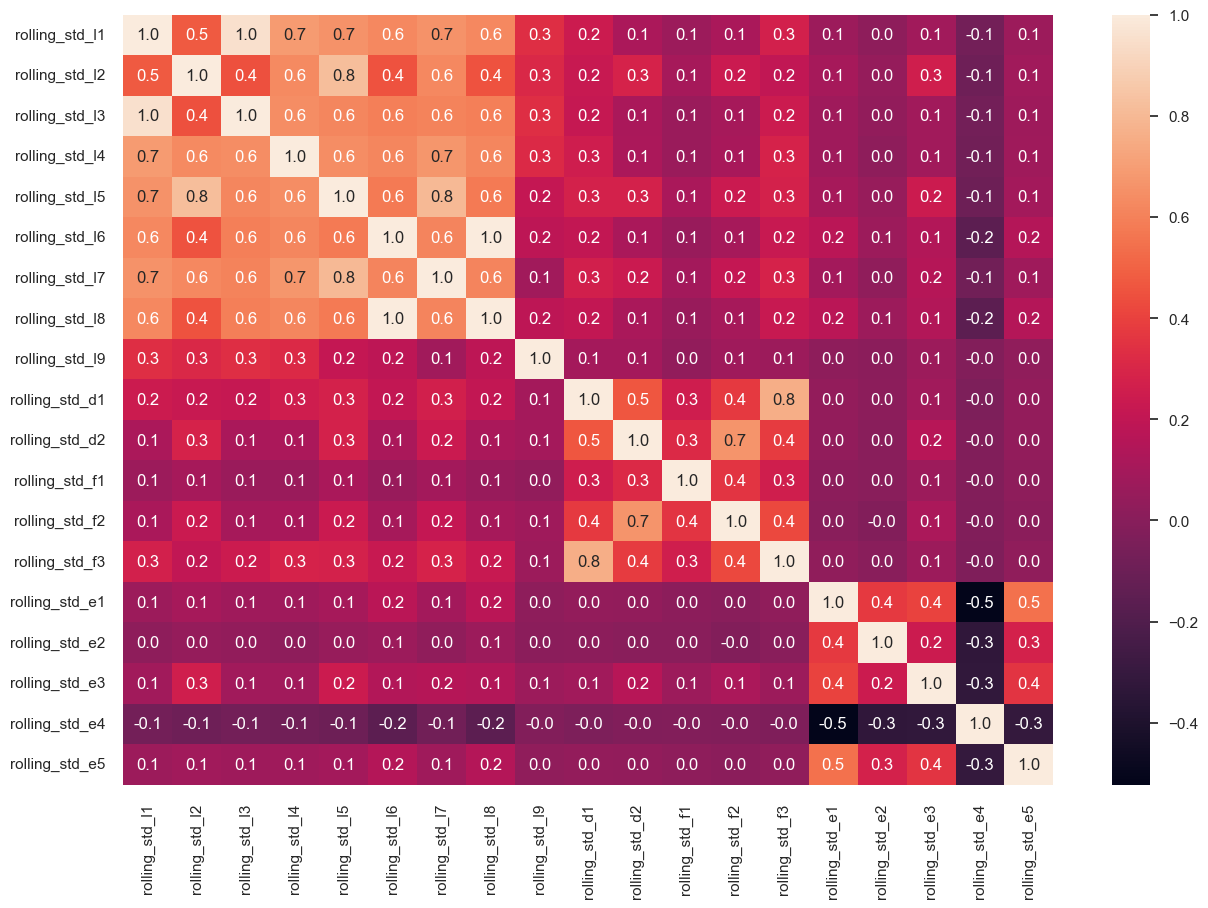

In [62]:
corr_matrix = X_train[corr_role_2].corr()
print(corr_matrix)
fig, ax = pyplot.subplots(figsize=(15, 10))
sn.set(font_scale=1)
sn.heatmap(corr_matrix, annot=True, fmt='.1f')

                    rolling_entropy_l1  rolling_entropy_l2  \
rolling_entropy_l1            1.000000            0.723752   
rolling_entropy_l2            0.723752            1.000000   
rolling_entropy_l3            0.205025            0.161187   
rolling_entropy_l4            0.131660            0.120628   
rolling_entropy_l5            0.093371            0.295402   
rolling_entropy_l6            0.126140            0.118332   
rolling_entropy_l7            0.097313            0.211036   
rolling_entropy_l8            0.126140            0.118332   
rolling_entropy_l9            0.143716            0.136492   
rolling_entropy_d1            0.039028            0.084069   
rolling_entropy_d2           -0.014234            0.148913   
rolling_entropy_f1            0.014076            0.049727   
rolling_entropy_f2           -0.008568            0.146424   
rolling_entropy_f3            0.046087            0.074014   
rolling_entropy_e1            0.000794            0.037509   
rolling_

<Axes: >

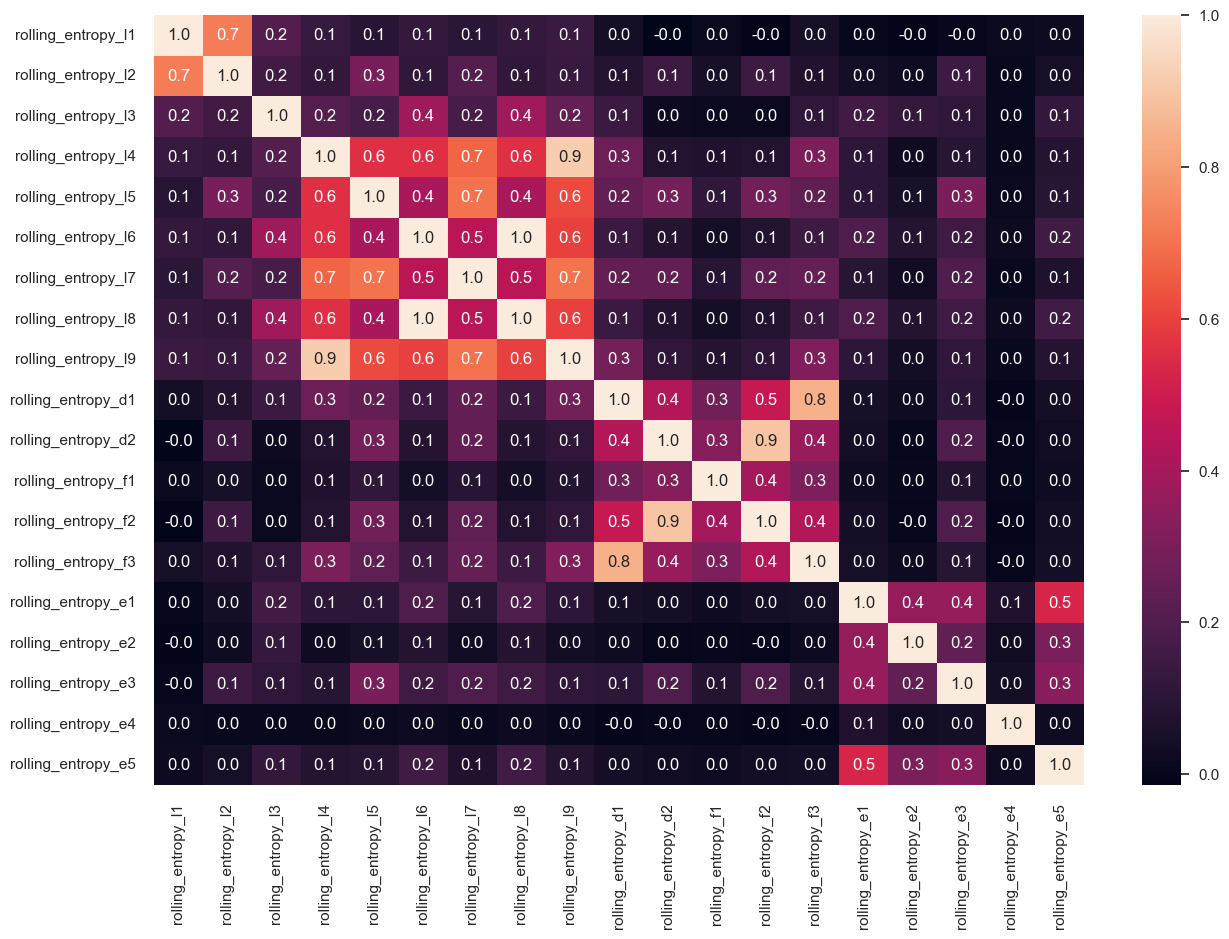

In [63]:
corr_matrix = X_train[corr_role_3].corr()
print(corr_matrix)
fig, ax = pyplot.subplots(figsize=(15, 10))
sn.set(font_scale=1)
sn.heatmap(corr_matrix, annot=True, fmt='.1f')

                rolling_fft_l1  rolling_fft_l2  rolling_fft_l3  \
rolling_fft_l1        1.000000        0.758993        0.914524   
rolling_fft_l2        0.758993        1.000000        0.641807   
rolling_fft_l3        0.914524        0.641807        1.000000   
rolling_fft_l4        0.866942        0.836239        0.746257   
rolling_fft_l5        0.875003        0.823367        0.749284   
rolling_fft_l6        0.844787        0.729753        0.714374   
rolling_fft_l7        0.860354        0.765190        0.730041   
rolling_fft_l8        0.844787        0.729753        0.714374   
rolling_fft_l9        0.224552        0.295549        0.233224   
rolling_fft_d1        0.273277        0.237308        0.215111   
rolling_fft_d2        0.199079        0.245614        0.164531   
rolling_fft_f1        0.103346        0.122350        0.089137   
rolling_fft_f2        0.099034        0.139537        0.078255   
rolling_fft_f3        0.328088        0.261355        0.251906   
rolling_ff

<Axes: >

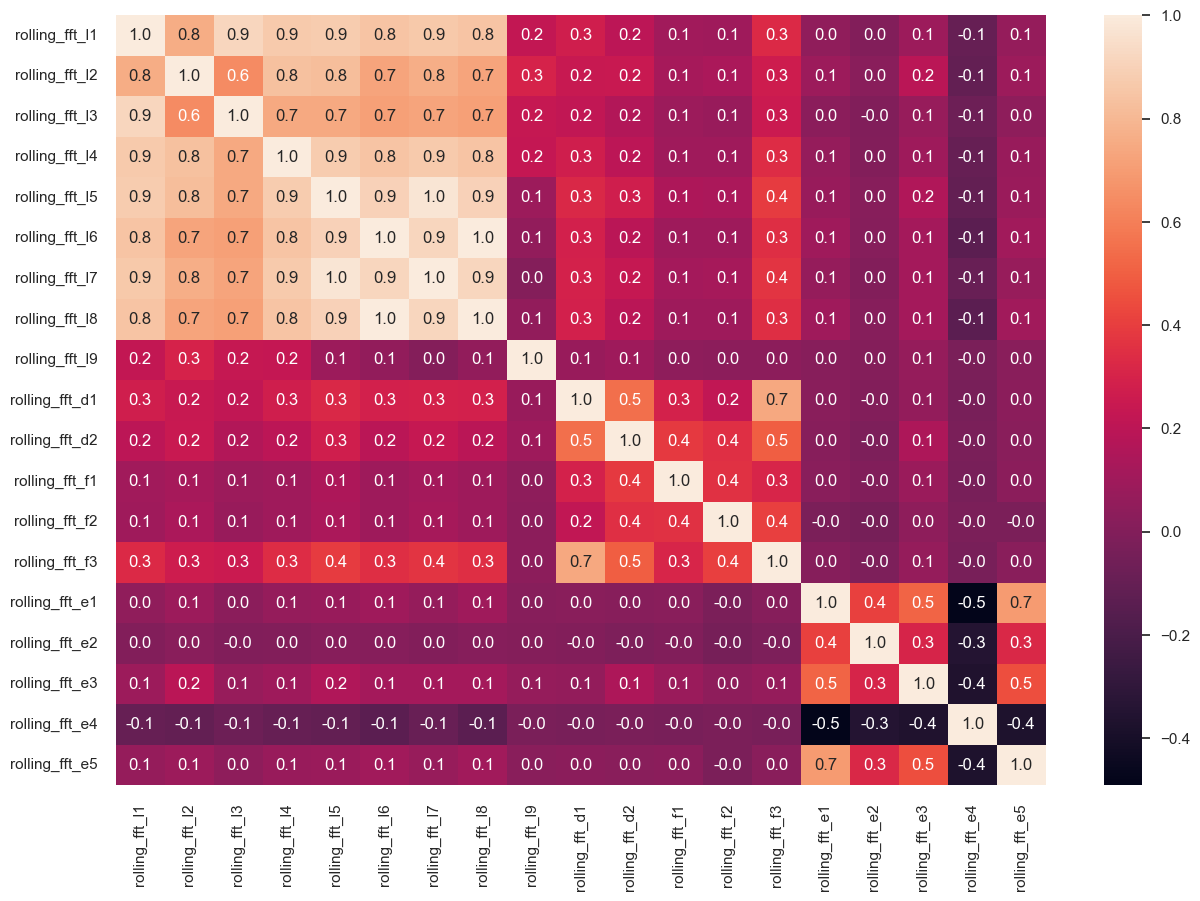

In [64]:
corr_matrix = X_train[corr_role_4].corr()
print(corr_matrix)
fig, ax = pyplot.subplots(figsize=(15, 10))
sn.set(font_scale=1)
sn.heatmap(corr_matrix, annot=True, fmt='.1f')

# PARAMETERS

Setting up the time periods.  The analysis will be performed in periods of 1 week, therefore a delta variable is set.  A split feature is assigned.

In [98]:
train_start = datetime.datetime(2010,1,1)
train_end = datetime.datetime(2010,5,30)

predict_start = datetime.datetime(2010,5,31)
predict_end = datetime.datetime(2010,6,1)

delta = datetime.timedelta(weeks=1)

X_train['split'] = ''
X_train.loc[(X_train['date'] >= train_start) & (X_train['date'] <= predict_start), "split"] = 'Train'
X_train.loc[(X_train['date'] >= predict_start) & (X_train['date'] < predict_end), "split"] = 'Test'

feature_role.append('split')

A sample of ~100 users is defines as the analysis for 1000 users would be prohibitive with the various approaches taken in this research.  May a Cross Validation would make sense, but need to figure that out. 

In [99]:
good_users = ['SSG0250',
 'TSR0676',
 'DDA0476',
 'IJR0825',
 'NLO0131',
 'NHH0185',
 'NKH0807',
 'DKB0631',
 'GCL0016',
 'ASV0946',
 'IHK0841',
 'ORB0473',
 'ECR0822',
 'RCP0785',
 'TAC0300',
 'SMH0291',
 'MCJ0324',
 'DMM0623',
 'KKC0683',
 'RAR0725',
 'IBP0883',
 'MLL0598',
 'SHR0334',
 'CLB0774',
 'PES0085',
 'CWB0065',
 'LRW0970',
 'BTN0061',
 'FRL0511',
 'AKR0057',
 'GRC0145',
 'EFS0882',
 'CFG0959',
 'BLL0929',
 'TPH0474',
 'ESR0693',
 'JRS0362',
 'RGH0728',
 'WTR0563',
 'WGS0516']

In [100]:
badUsers = X_train['user'].loc[(X_train['label'] == 1)].unique().tolist()
users = good_users + badUsers

In [101]:
X_train = X_train.loc[X_train['user'].isin(users)]

This section is toggled to select the scenario that will be assessed.  This will look at the user's rolling activity, the distance to the role and psy group, or calculated vector distances.  This can also be toggled to enable a PCA version of the features.

In [102]:
pca_features2 = ['p1-2', 'p2-2', 'p3-2', 'p4-2']

# ALL VALUES FOR JUST INDIVIDUAL - SEPERATE STATS
# features1 = ['rolling_std_l1', 'rolling_std_l2', 'rolling_std_l3', 'rolling_std_l4', 'rolling_std_l5', 'rolling_std_l6', 'rolling_std_l7', 'rolling_std_l8', 'rolling_std_l9', 'rolling_std_d1', 'rolling_std_d2', 'rolling_std_f1',  'rolling_std_f2',  'rolling_std_f3', 'rolling_std_e1', 'rolling_std_e2', 'rolling_std_e3', 'rolling_std_e4', 'rolling_std_e5']

# features2 = ['rolling_mean_l1', 'rolling_mean_l2', 'rolling_mean_l3', 'rolling_mean_l4', 'rolling_mean_l5', 'rolling_mean_l6', 'rolling_mean_l7', 'rolling_mean_l8', 'rolling_mean_l9', 'rolling_mean_d1', 'rolling_mean_d2', 'rolling_mean_f1',  'rolling_mean_f2',  'rolling_mean_f3', 'rolling_mean_e1', 'rolling_mean_e2', 'rolling_mean_e3', 'rolling_mean_e4', 'rolling_mean_e5']

# features3 = ['rolling_fft_l1', 'rolling_fft_l2', 'rolling_fft_l3', 'rolling_fft_l4', 'rolling_fft_l5', 'rolling_fft_l6', 'rolling_fft_l7', 'rolling_fft_l8', 'rolling_fft_l9', 'rolling_fft_d1', 'rolling_fft_d2', 'rolling_fft_f1',  'rolling_fft_f2',  'rolling_fft_f3', 'rolling_fft_e1', 'rolling_fft_e2', 'rolling_fft_e3', 'rolling_fft_e4', 'rolling_fft_e5']

# features4 = ['rolling_entropy_l1', 'rolling_entropy_l2', 'rolling_entropy_l3', 'rolling_entropy_l4', 'rolling_entropy_l5', 'rolling_entropy_l6', 'rolling_entropy_l7', 'rolling_entropy_l8', 'rolling_entropy_l9', 'rolling_entropy_pd1', 'rolling_entropy_d2', 'rolling_entropy_f1',  'rolling_entropy_f2',  'rolling_entropy_f3', 'rolling_entropy_e1', 'rolling_entropy_e2', 'rolling_entropy_e3', 'rolling_entropy_e4', 'rolling_entropy_e5']


# ALL VALUES FOR ROLE DISTANCE - ELEMENT LEVEL - SEPERATE STATS
# features1 = ['rolling_std_rl1', 'rolling_std_rl2', 'rolling_std_rl3', 'rolling_std_rl4', 'rolling_std_rl5', 'rolling_std_rl6', 'rolling_std_rl7', 'rolling_std_rl8', 'rolling_std_rl9', 'rolling_std_rd1', 'rolling_std_rd2', 'rolling_std_rf1',  'rolling_std_rf2',  'rolling_std_rf3', 'rolling_std_re1', 'rolling_std_re2', 'rolling_std_re3', 'rolling_std_re4', 'rolling_std_re5']

# features2 = ['rolling_mean_rl1', 'rolling_mean_rl2', 'rolling_mean_rl3', 'rolling_mean_rl4', 'rolling_mean_rl5', 'rolling_mean_rl6', 'rolling_mean_rl7', 'rolling_mean_rl8', 'rolling_mean_rl9', 'rolling_mean_rd1', 'rolling_mean_rd2', 'rolling_mean_rf1',  'rolling_mean_rf2',  'rolling_mean_rf3', 'rolling_mean_re1', 'rolling_mean_re2', 'rolling_mean_re3', 'rolling_mean_re4', 'rolling_mean_re5']

# features3 = ['rolling_fft_rl1', 'rolling_fft_rl2', 'rolling_fft_rl3', 'rolling_fft_rl4', 'rolling_fft_rl5', 'rolling_fft_rl6', 'rolling_fft_rl7', 'rolling_fft_rl8', 'rolling_fft_rl9', 'rolling_fft_rd1', 'rolling_fft_rd2', 'rolling_fft_rf1',  'rolling_fft_rf2',  'rolling_fft_rf3', 'rolling_fft_re1', 'rolling_fft_re2', 'rolling_fft_re3', 'rolling_fft_re4', 'rolling_fft_re5']

# features4 = ['rolling_entropy_rl1', 'rolling_entropy_rl2', 'rolling_entropy_rl3', 'rolling_entropy_rl4', 'rolling_entropy_rl5', 'rolling_entropy_rl6', 'rolling_entropy_rl7', 'rolling_entropy_rl8', 'rolling_entropy_rl9', 'rolling_entropy_rd1', 'rolling_entropy_rd2', 'rolling_entropy_rf1',  'rolling_entropy_rf2',  'rolling_entropy_rf3', 'rolling_entropy_re1', 'rolling_entropy_re2', 'rolling_entropy_re3', 'rolling_entropy_re4', 'rolling_entropy_re5']

# # ALL VALUES FOR PSY DISTANCE - ELEMENT LEVEL - SEPERATE STATS
features1 = ['rolling_std_pl1', 'rolling_std_pl2', 'rolling_std_pl3', 'rolling_std_pl4', 'rolling_std_pl5', 'rolling_std_pl6', 'rolling_std_pl7', 'rolling_std_pl8', 'rolling_std_pl9', 'rolling_std_pd1', 'rolling_std_pd2', 'rolling_std_pf1',  'rolling_std_pf2',  'rolling_std_pf3', 'rolling_std_pe1', 'rolling_std_pe2', 'rolling_std_pe3', 'rolling_std_pe4', 'rolling_std_pe5']

features2 = ['rolling_mean_pl1', 'rolling_mean_pl2', 'rolling_mean_pl3', 'rolling_mean_pl4', 'rolling_mean_pl5', 'rolling_mean_pl6', 'rolling_mean_pl7', 'rolling_mean_pl8', 'rolling_mean_pl9', 'rolling_mean_pd1', 'rolling_mean_pd2', 'rolling_mean_pf1',  'rolling_mean_pf2',  'rolling_mean_pf3', 'rolling_mean_pe1', 'rolling_mean_pe2', 'rolling_mean_pe3', 'rolling_mean_pe4', 'rolling_mean_pe5']

features3 = ['rolling_fft_pl1', 'rolling_fft_pl2', 'rolling_fft_pl3', 'rolling_fft_pl4', 'rolling_fft_pl5', 'rolling_fft_pl6', 'rolling_fft_pl7', 'rolling_fft_pl8', 'rolling_fft_pl9', 'rolling_fft_pd1', 'rolling_fft_pd2', 'rolling_fft_pf1',  'rolling_fft_pf2',  'rolling_fft_pf3', 'rolling_fft_pe1', 'rolling_fft_pe2', 'rolling_fft_pe3', 'rolling_fft_pe4', 'rolling_fft_pe5']

features4 = ['rolling_entropy_pl1', 'rolling_entropy_pl2', 'rolling_entropy_pl3', 'rolling_entropy_pl4', 'rolling_entropy_pl5', 'rolling_entropy_pl6', 'rolling_entropy_pl7', 'rolling_entropy_pl8', 'rolling_entropy_pl9', 'rolling_entropy_pd1', 'rolling_entropy_pd2', 'rolling_entropy_pf1',  'rolling_entropy_pf2',  'rolling_entropy_pf3', 'rolling_entropy_pe1', 'rolling_entropy_pe2', 'rolling_entropy_pe3', 'rolling_entropy_pe4', 'rolling_entropy_pe5']


# ALL VALUES FOR JUST INDIVIDUAL - COMBINED STATS
# features1 = ['rolling_std_l1', 'rolling_std_l2', 'rolling_std_l3', 'rolling_std_l4', 'rolling_std_l5', 'rolling_std_l6', 'rolling_std_l7', 'rolling_std_l8', 'rolling_std_l9', 'rolling_std_d1', 'rolling_std_d2', 'rolling_std_f1',  'rolling_std_f2',  'rolling_std_f3', 'rolling_std_e1', 'rolling_std_e2', 'rolling_std_e3', 'rolling_std_e4', 'rolling_std_e5',
#             'rolling_mean_l1', 'rolling_mean_l2', 'rolling_mean_l3', 'rolling_mean_l4', 'rolling_mean_l5', 'rolling_mean_l6', 'rolling_mean_l7', 'rolling_mean_l8', 'rolling_mean_l9', 'rolling_mean_d1', 'rolling_mean_d2', 'rolling_mean_f1',  'rolling_mean_f2',  'rolling_mean_f3', 'rolling_mean_e1', 'rolling_mean_e2', 'rolling_mean_e3', 'rolling_mean_e4', 'rolling_mean_e5',
#             'rolling_fft_l1', 'rolling_fft_l2', 'rolling_fft_l3', 'rolling_fft_l4', 'rolling_fft_l5', 'rolling_fft_l6', 'rolling_fft_l7', 'rolling_fft_l8', 'rolling_fft_l9', 'rolling_fft_d1', 'rolling_fft_d2', 'rolling_fft_f1',  'rolling_fft_f2',  'rolling_fft_f3', 'rolling_fft_e1', 'rolling_fft_e2', 'rolling_fft_e3', 'rolling_fft_e4', 'rolling_fft_e5',
#             'rolling_entropy_l1', 'rolling_entropy_l2', 'rolling_entropy_l3', 'rolling_entropy_l4', 'rolling_entropy_l5', 'rolling_entropy_l6', 'rolling_entropy_l7', 'rolling_entropy_l8', 'rolling_entropy_l9', 'rolling_entropy_d1', 'rolling_entropy_d2', 'rolling_entropy_f1',  'rolling_entropy_f2',  'rolling_entropy_f3', 'rolling_entropy_e1', 'rolling_entropy_e2', 'rolling_entropy_e3', 'rolling_entropy_e4', 'rolling_entropy_e5']

# # ALL VALUES FOR ROLE - COMBINED STATS
# features1 = ['rolling_std_rl1', 'rolling_std_rl2', 'rolling_std_rl3', 'rolling_std_rl4', 'rolling_std_rl5', 'rolling_std_rl6', 'rolling_std_rl7', 'rolling_std_rl8', 'rolling_std_rl9', 'rolling_std_rd1', 'rolling_std_rd2', 'rolling_std_rf1',  'rolling_std_rf2',  'rolling_std_rf3', 'rolling_std_re1', 'rolling_std_re2', 'rolling_std_re3', 'rolling_std_re4', 'rolling_std_re5',
#             'rolling_mean_rl1', 'rolling_mean_rl2', 'rolling_mean_rl3', 'rolling_mean_rl4', 'rolling_mean_rl5', 'rolling_mean_rl6', 'rolling_mean_rl7', 'rolling_mean_rl8', 'rolling_mean_rl9', 'rolling_mean_rd1', 'rolling_mean_rd2', 'rolling_mean_rf1',  'rolling_mean_rf2',  'rolling_mean_rf3', 'rolling_mean_re1', 'rolling_mean_re2', 'rolling_mean_re3', 'rolling_mean_re4', 'rolling_mean_re5',
#             'rolling_fft_rl1', 'rolling_fft_rl2', 'rolling_fft_rl3', 'rolling_fft_rl4', 'rolling_fft_rl5', 'rolling_fft_rl6', 'rolling_fft_rl7', 'rolling_fft_rl8', 'rolling_fft_rl9', 'rolling_fft_rd1', 'rolling_fft_rd2', 'rolling_fft_rf1',  'rolling_fft_rf2',  'rolling_fft_rf3', 'rolling_fft_re1', 'rolling_fft_re2', 'rolling_fft_re3', 'rolling_fft_re4', 'rolling_fft_re5',
#             'rolling_entropy_rl1', 'rolling_entropy_rl2', 'rolling_entropy_rl3', 'rolling_entropy_rl4', 'rolling_entropy_rl5', 'rolling_entropy_rl6', 'rolling_entropy_rl7', 'rolling_entropy_rl8', 'rolling_entropy_rl9', 'rolling_entropy_rd1', 'rolling_entropy_rd2', 'rolling_entropy_rf1',  'rolling_entropy_rf2',  'rolling_entropy_rf3', 'rolling_entropy_re1', 'rolling_entropy_re2', 'rolling_entropy_re3', 'rolling_entropy_re4', 'rolling_entropy_re5']

# # ALL VALUES FOR PSY - COMBINED STATS
# features1 = ['rolling_std_pl1', 'rolling_std_pl2', 'rolling_std_pl3', 'rolling_std_pl4', 'rolling_std_pl5', 'rolling_std_pl6', 'rolling_std_pl7', 'rolling_std_pl8', 'rolling_std_pl9', 'rolling_std_pd1', 'rolling_std_pd2', 'rolling_std_pf1',  'rolling_std_pf2',  'rolling_std_pf3', 'rolling_std_pe1', 'rolling_std_pe2', 'rolling_std_pe3', 'rolling_std_pe4', 'rolling_std_pe5',
#             'rolling_mean_pl1', 'rolling_mean_pl2', 'rolling_mean_pl3', 'rolling_mean_pl4', 'rolling_mean_pl5', 'rolling_mean_pl6', 'rolling_mean_pl7', 'rolling_mean_pl8', 'rolling_mean_pl9', 'rolling_mean_pd1', 'rolling_mean_pd2', 'rolling_mean_pf1',  'rolling_mean_pf2',  'rolling_mean_pf3', 'rolling_mean_pe1', 'rolling_mean_pe2', 'rolling_mean_pe3', 'rolling_mean_pe4', 'rolling_mean_pe5',
#             'rolling_fft_pl1', 'rolling_fft_pl2', 'rolling_fft_pl3', 'rolling_fft_pl4', 'rolling_fft_pl5', 'rolling_fft_pl6', 'rolling_fft_pl7', 'rolling_fft_pl8', 'rolling_fft_pl9', 'rolling_fft_pd1', 'rolling_fft_pd2', 'rolling_fft_pf1',  'rolling_fft_pf2',  'rolling_fft_pf3', 'rolling_fft_pe1', 'rolling_fft_pe2', 'rolling_fft_pe3', 'rolling_fft_pe4', 'rolling_fft_pe5',
#             'rolling_entropy_pl1', 'rolling_entropy_pl2', 'rolling_entropy_pl3', 'rolling_entropy_pl4', 'rolling_entropy_pl5', 'rolling_entropy_pl6', 'rolling_entropy_pl7', 'rolling_entropy_pl8', 'rolling_entropy_pl9', 'rolling_entropy_pd1', 'rolling_entropy_pd2', 'rolling_entropy_pf1',  'rolling_entropy_pf2',  'rolling_entropy_pf3', 'rolling_entropy_pe1', 'rolling_entropy_pe2', 'rolling_entropy_pe3', 'rolling_entropy_pe4', 'rolling_entropy_pe5']

# ALL VALUES FOR PSY AND ROLE - COMBINED STATS
# features1 = ['rolling_std_rl1', 'rolling_std_rl2', 'rolling_std_rl3', 'rolling_std_rl4', 'rolling_std_rl5', 'rolling_std_rl6', 'rolling_std_rl7', 'rolling_std_rl8', 'rolling_std_rl9', 'rolling_std_rd1', 'rolling_std_rd2', 'rolling_std_rf1',  'rolling_std_rf2',  'rolling_std_rf3', 'rolling_std_re1', 'rolling_std_re2', 'rolling_std_re3', 'rolling_std_re4', 'rolling_std_re5',
#             'rolling_mean_rl1', 'rolling_mean_rl2', 'rolling_mean_rl3', 'rolling_mean_rl4', 'rolling_mean_rl5', 'rolling_mean_rl6', 'rolling_mean_rl7', 'rolling_mean_rl8', 'rolling_mean_rl9', 'rolling_mean_rd1', 'rolling_mean_rd2', 'rolling_mean_rf1',  'rolling_mean_rf2',  'rolling_mean_rf3', 'rolling_mean_re1', 'rolling_mean_re2', 'rolling_mean_re3', 'rolling_mean_re4', 'rolling_mean_re5',
#             'rolling_fft_rl1', 'rolling_fft_rl2', 'rolling_fft_rl3', 'rolling_fft_rl4', 'rolling_fft_rl5', 'rolling_fft_rl6', 'rolling_fft_rl7', 'rolling_fft_rl8', 'rolling_fft_rl9', 'rolling_fft_rd1', 'rolling_fft_rd2', 'rolling_fft_rf1',  'rolling_fft_rf2',  'rolling_fft_rf3', 'rolling_fft_re1', 'rolling_fft_re2', 'rolling_fft_re3', 'rolling_fft_re4', 'rolling_fft_re5',
#             'rolling_entropy_rl1', 'rolling_entropy_rl2', 'rolling_entropy_rl3', 'rolling_entropy_rl4', 'rolling_entropy_rl5', 'rolling_entropy_rl6', 'rolling_entropy_rl7', 'rolling_entropy_rl8', 'rolling_entropy_rl9', 'rolling_entropy_rd1', 'rolling_entropy_rd2', 'rolling_entropy_rf1',  'rolling_entropy_rf2',  'rolling_entropy_rf3', 'rolling_entropy_re1', 'rolling_entropy_re2', 'rolling_entropy_re3', 'rolling_entropy_re4', 'rolling_entropy_re5',
#             'rolling_std_pl1', 'rolling_std_pl2', 'rolling_std_pl3', 'rolling_std_pl4', 'rolling_std_pl5', 'rolling_std_pl6', 'rolling_std_pl7', 'rolling_std_pl8', 'rolling_std_pl9', 'rolling_std_pd1', 'rolling_std_pd2', 'rolling_std_pf1',  'rolling_std_pf2',  'rolling_std_pf3', 'rolling_std_pe1', 'rolling_std_pe2', 'rolling_std_pe3', 'rolling_std_pe4', 'rolling_std_pe5',
#             'rolling_mean_pl1', 'rolling_mean_pl2', 'rolling_mean_pl3', 'rolling_mean_pl4', 'rolling_mean_pl5', 'rolling_mean_pl6', 'rolling_mean_pl7', 'rolling_mean_pl8', 'rolling_mean_pl9', 'rolling_mean_pd1', 'rolling_mean_pd2', 'rolling_mean_pf1',  'rolling_mean_pf2',  'rolling_mean_pf3', 'rolling_mean_pe1', 'rolling_mean_pe2', 'rolling_mean_pe3', 'rolling_mean_pe4', 'rolling_mean_pe5',
#             'rolling_fft_pl1', 'rolling_fft_pl2', 'rolling_fft_pl3', 'rolling_fft_pl4', 'rolling_fft_pl5', 'rolling_fft_pl6', 'rolling_fft_pl7', 'rolling_fft_pl8', 'rolling_fft_pl9', 'rolling_fft_pd1', 'rolling_fft_pd2', 'rolling_fft_pf1',  'rolling_fft_pf2',  'rolling_fft_pf3', 'rolling_fft_pe1', 'rolling_fft_pe2', 'rolling_fft_pe3', 'rolling_fft_pe4', 'rolling_fft_pe5',
#             'rolling_entropy_pl1', 'rolling_entropy_pl2', 'rolling_entropy_pl3', 'rolling_entropy_pl4', 'rolling_entropy_pl5', 'rolling_entropy_pl6', 'rolling_entropy_pl7', 'rolling_entropy_pl8', 'rolling_entropy_pl9', 'rolling_entropy_pd1', 'rolling_entropy_pd2', 'rolling_entropy_pf1',  'rolling_entropy_pf2',  'rolling_entropy_pf3', 'rolling_entropy_pe1', 'rolling_entropy_pe2', 'rolling_entropy_pe3', 'rolling_entropy_pe4', 'rolling_entropy_pe5']


#USING DISTANCE OF COS AND EUC FOR ROLE AND PSY
# distance_features = ['rolling_std_cos_sim', 'rolling_mean_cos_sim', 'rolling_fft_cos_sim', 'rolling_entropy_cos_sim' ]
# distance_features = ['rolling_std_cos_sim_p', 'rolling_mean_cos_sim_p', 'rolling_fft_cos_sim_p', 'rolling_entropy_cos_sim_p' ]
# distance_features = ['rolling_std_euc_dist', 'rolling_mean_euc_dist', 'rolling_fft_euc_dist', 'rolling_entropy_euc_dist' ]
# distance_features = ['rolling_std_euc_dist_p', 'rolling_mean_euc_dist_p', 'rolling_fft_euc_dist_p', 'rolling_entropy_euc_dist_p' ]


datasets = [features1, features2, features3, features4]
# datasets = [features1]
# datasets = [distance_features]

# pca_features = ['p1-2', 'p2-2', 'p3-2']
pca_features = ['p1-2', 'p2-2', 'p3-2']

pca = PCA(n_components=4)

dbscan_df dataframe should be renamed as this is the dataframe that will be used in all methods, not just dbscan.  

In [103]:
dbscan_df = pd.DataFrame()

In [104]:
dbscan_df = X_train[feature_role]

This gives an idea of how impactful the PCA features are to the variance of the data.  Some recommendations are to use as many features that take it to 70 to 80% of explained variance.  Therefore, 3 or 4 PCA features would typically be used.  This is calculated for each rolling statistic.

In [107]:
for d in datasets:
    cluster_period = dbscan_df.loc[(dbscan_df['split'] == 'Train') | (dbscan_df['split'] == 'Test')]
    for f in d:
        cluster_period[f] = StandardScaler().fit_transform(np.array(cluster_period[f]).reshape(-1,1))

    pca.fit(cluster_period[d])
    transformed_data = pca.transform(cluster_period[d])
    explained_variance = pca.explained_variance_ratio_
    print(explained_variance)

[0.4563529  0.12255166 0.1092472  0.05266355]
[0.48577537 0.11530908 0.08759854 0.07166759]
[0.49116827 0.13017873 0.10973876 0.05659808]
[0.15219617 0.10162318 0.08862592 0.07467275]


For features we take a look at the normality of the data.  In most cases the data is not normal.  SHOULD IT BE?

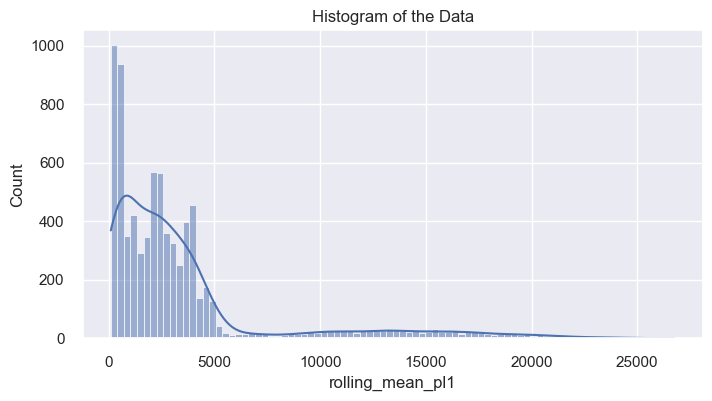

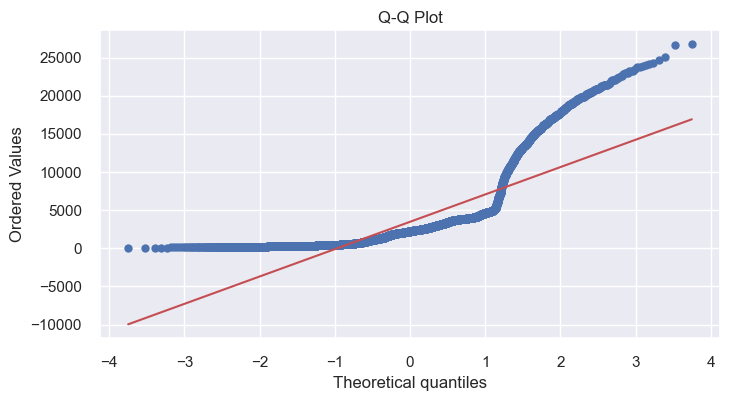

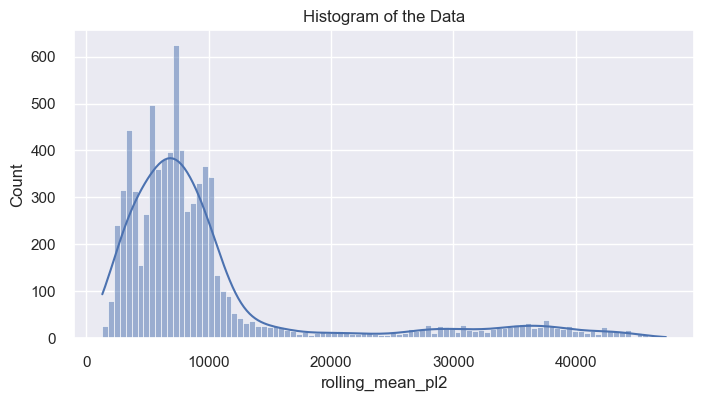

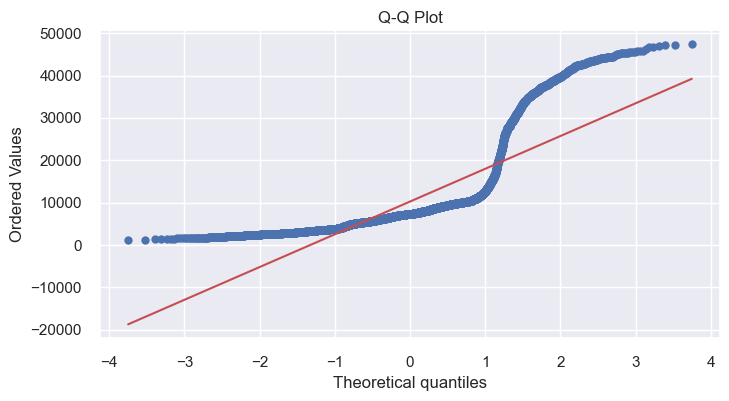

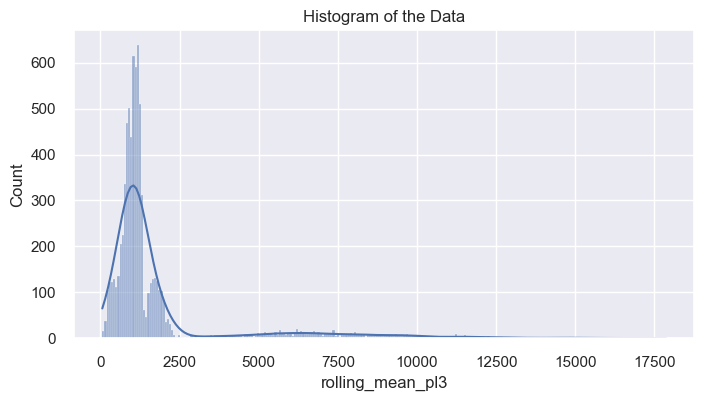

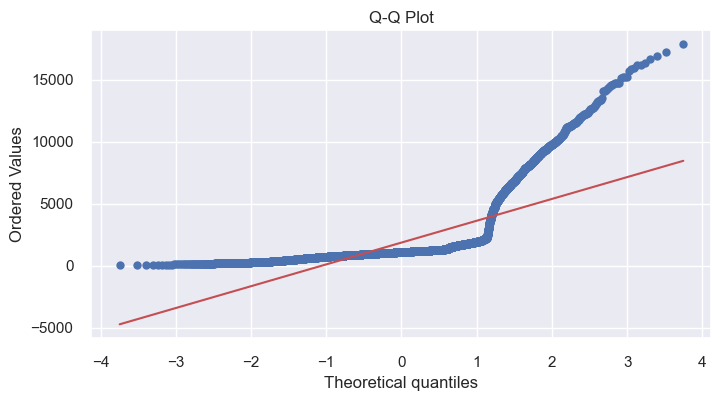

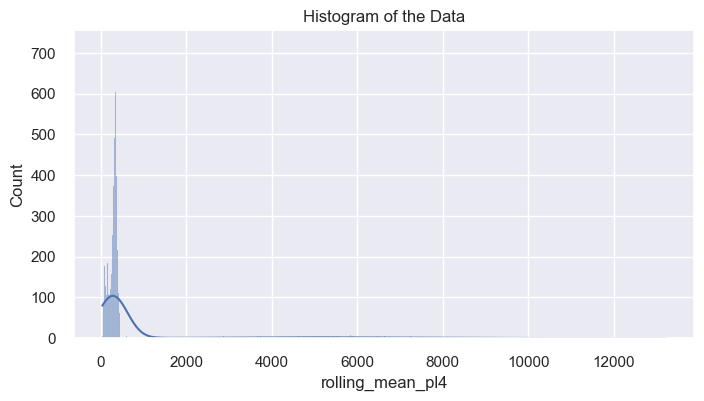

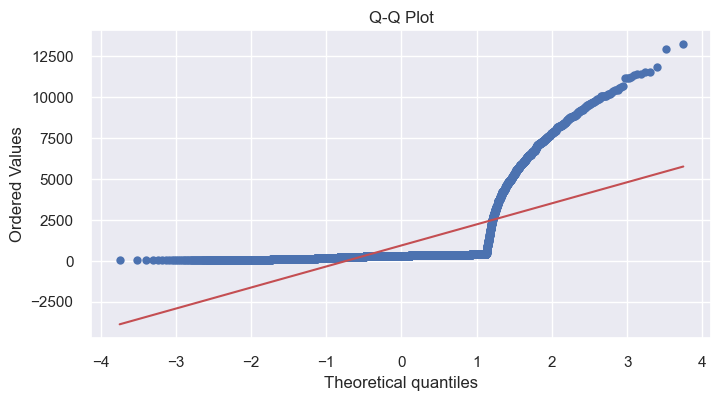

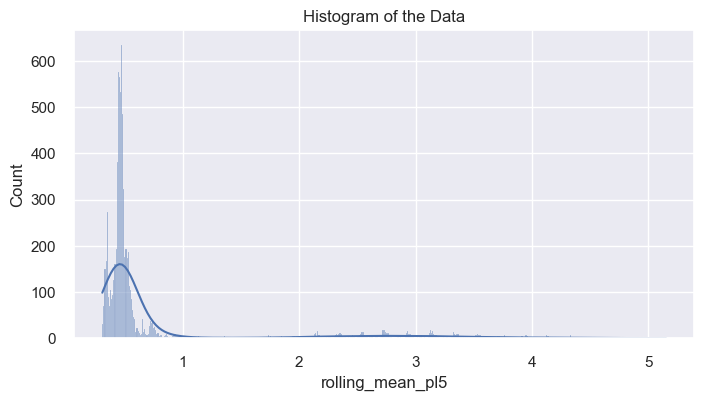

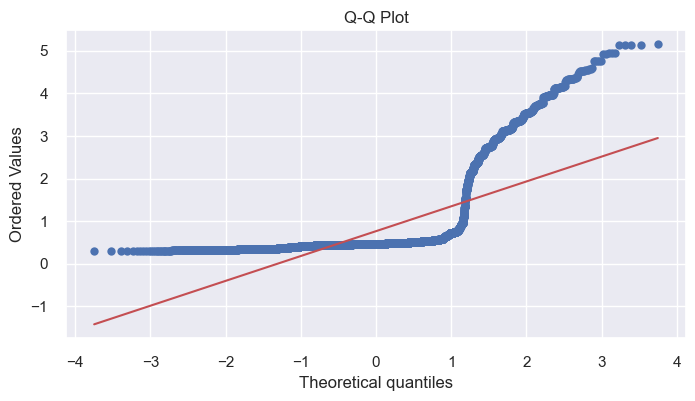

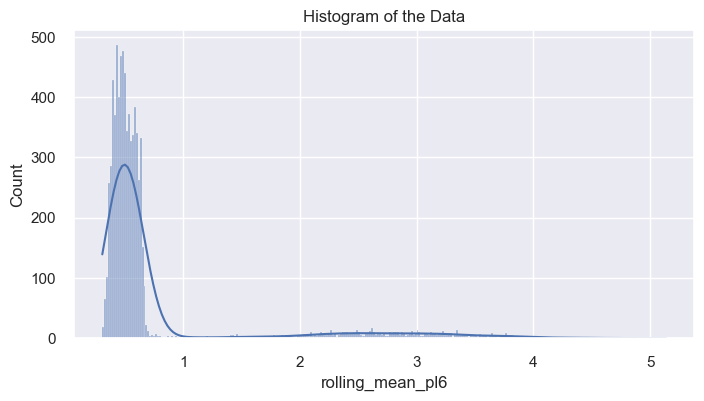

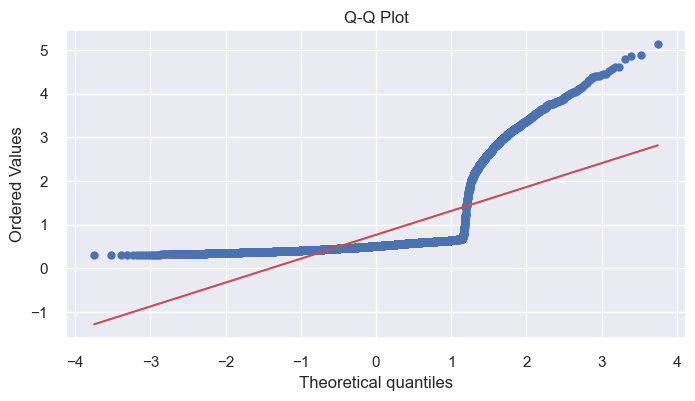

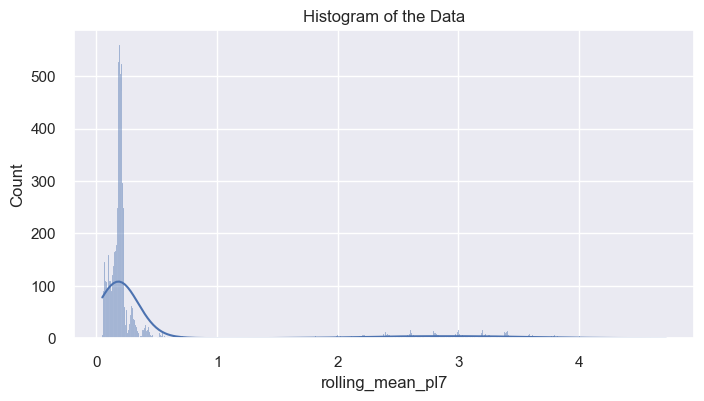

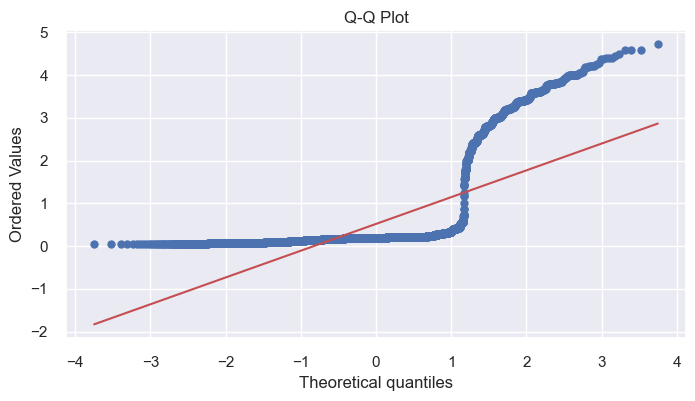

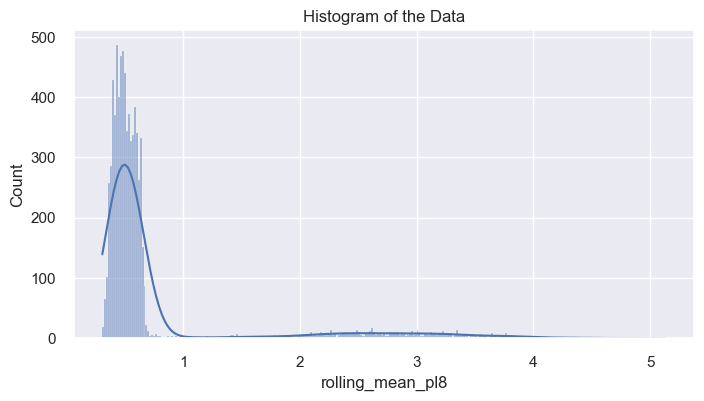

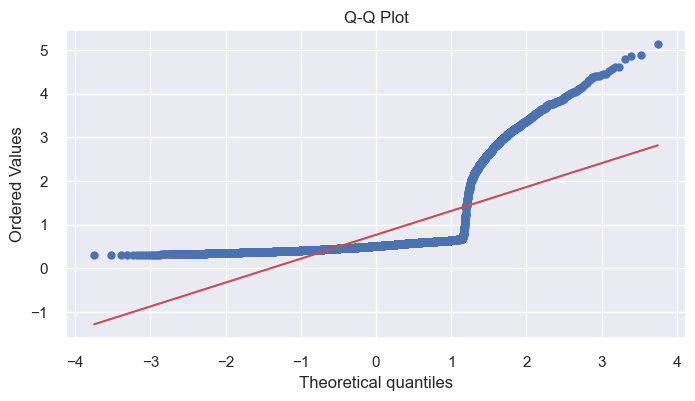

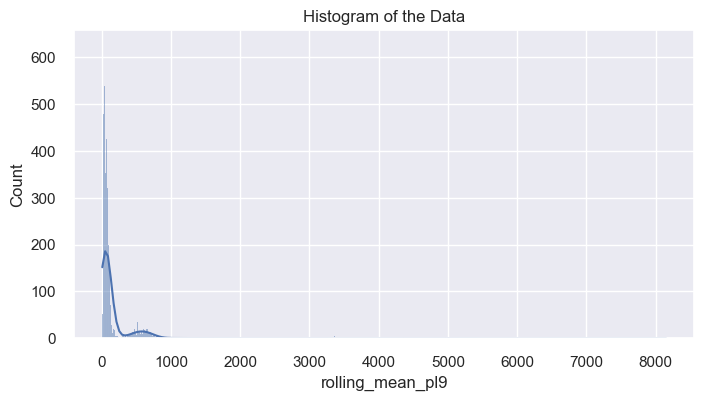

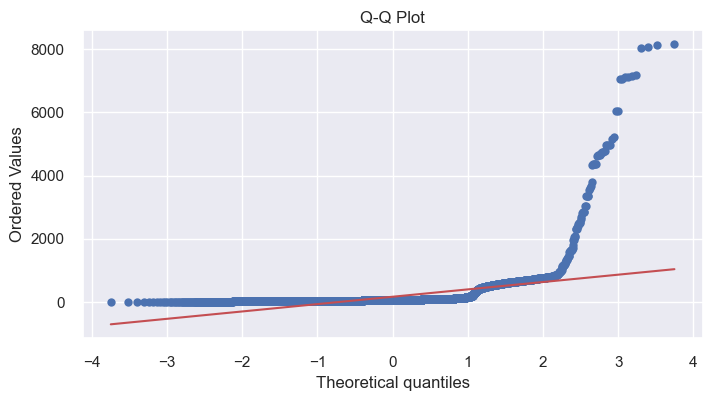

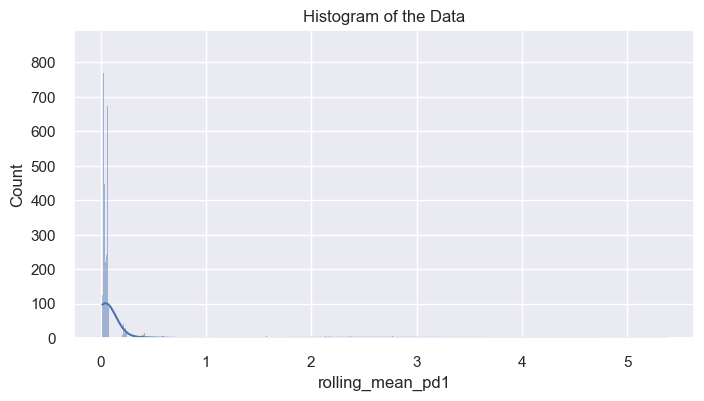

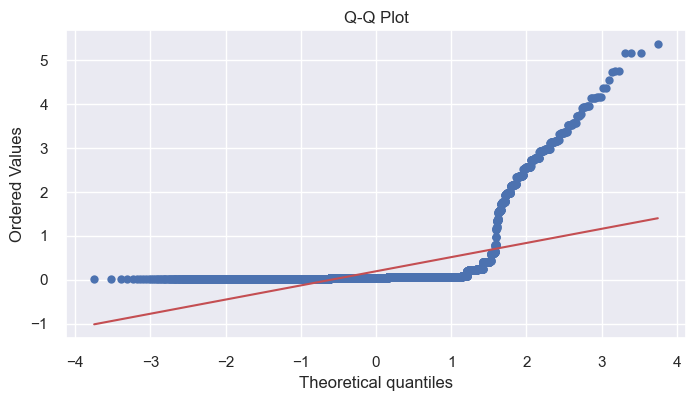

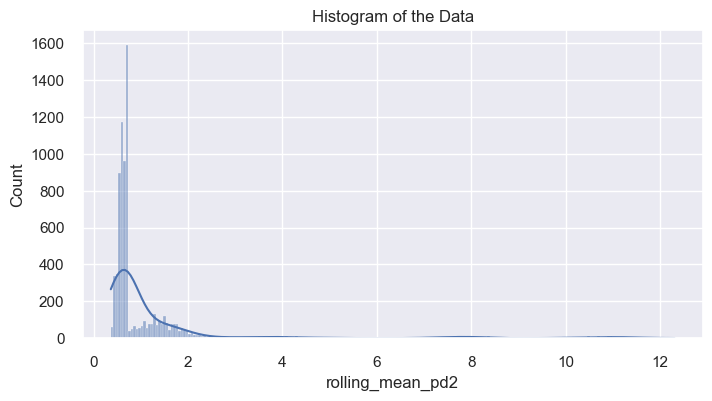

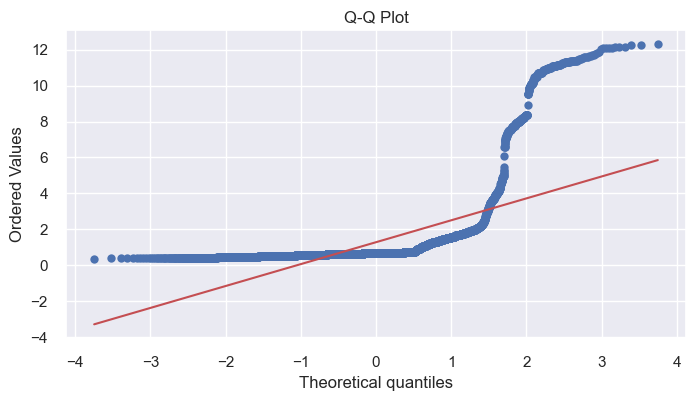

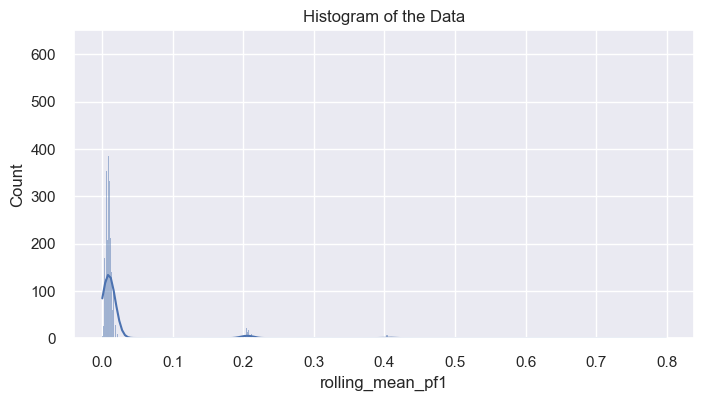

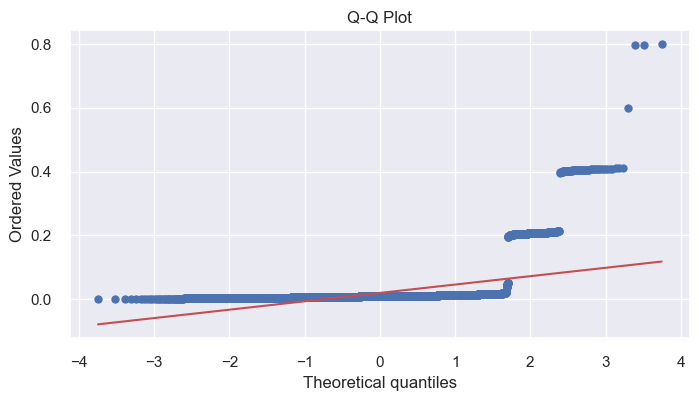

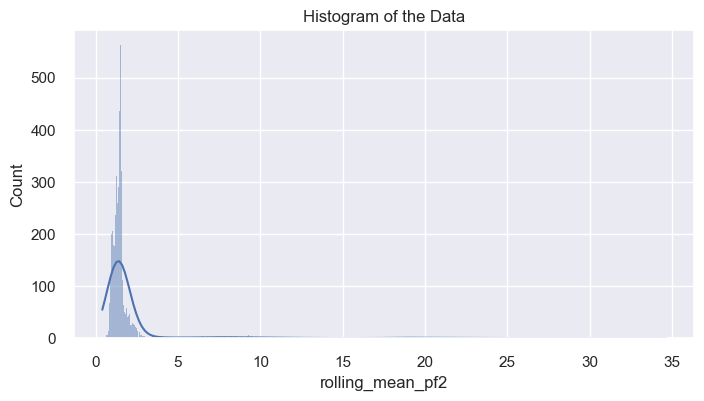

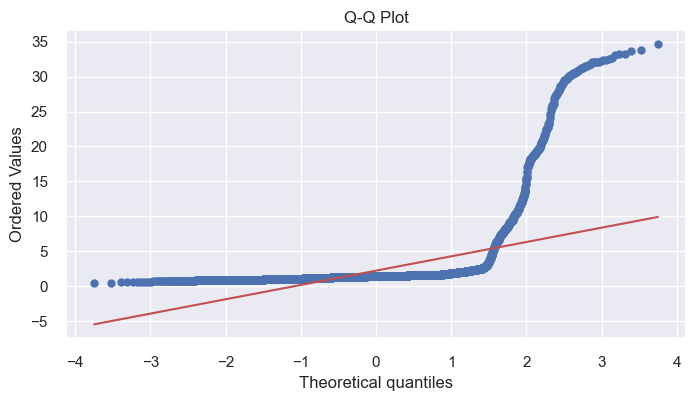

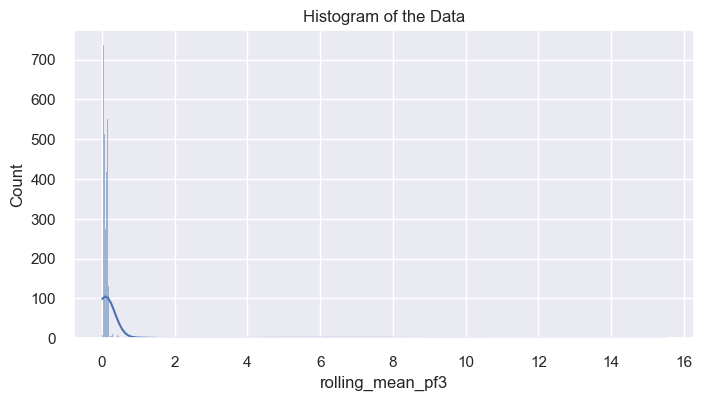

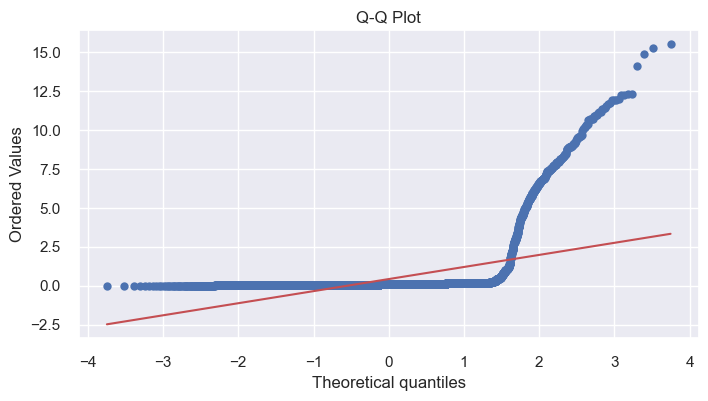

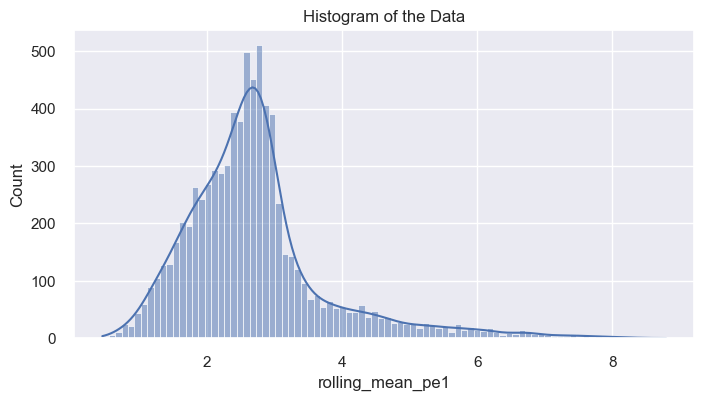

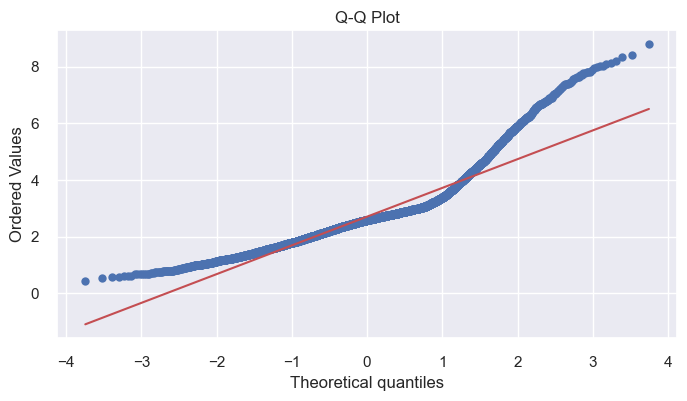

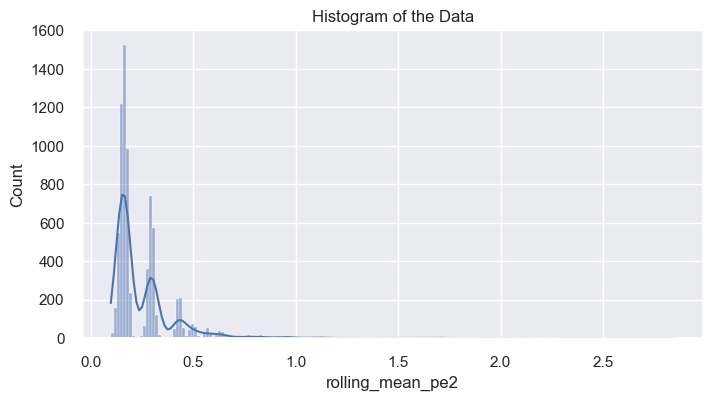

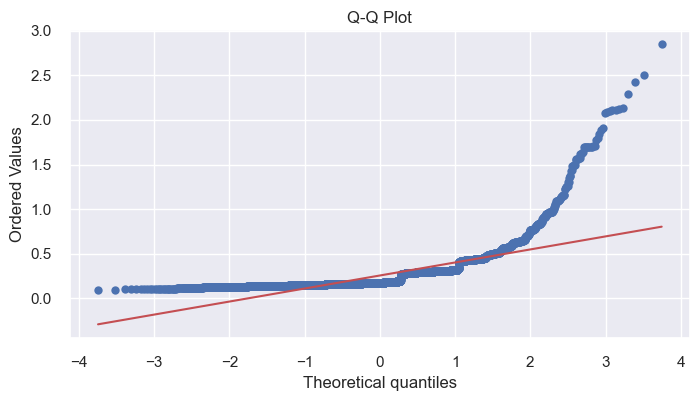

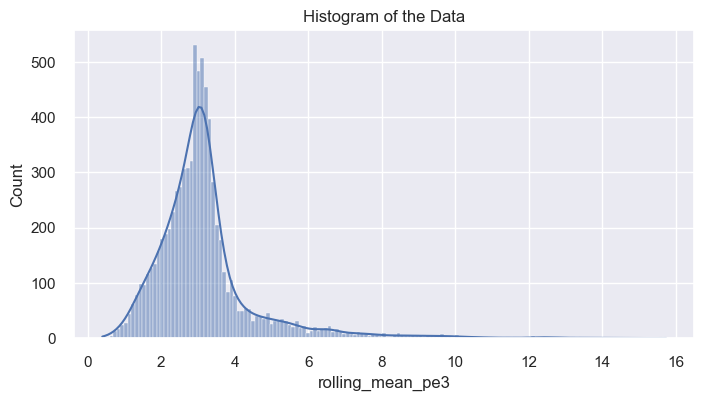

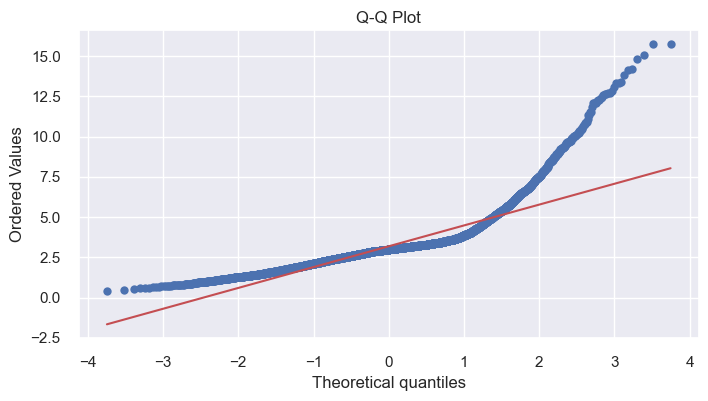

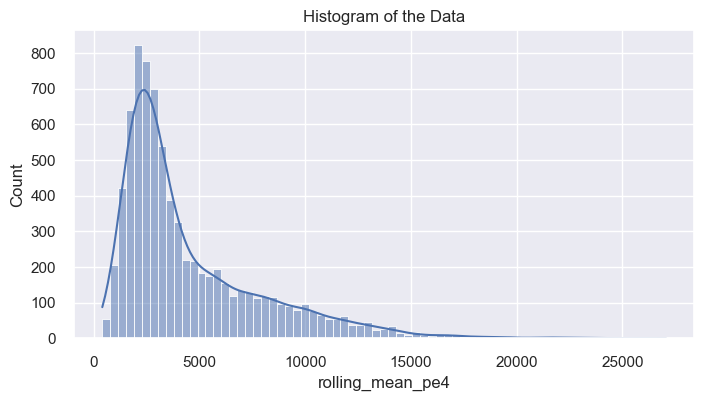

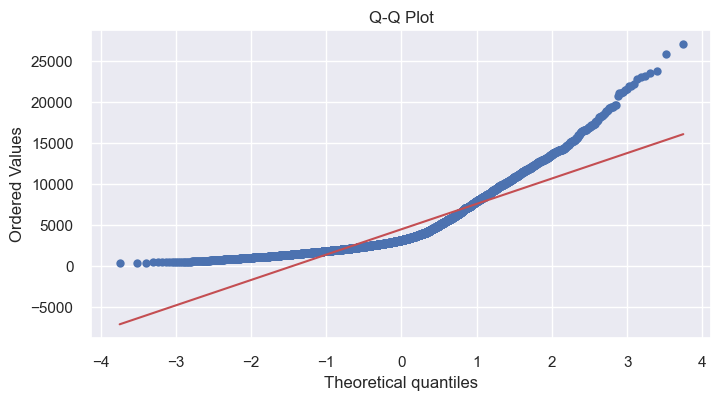

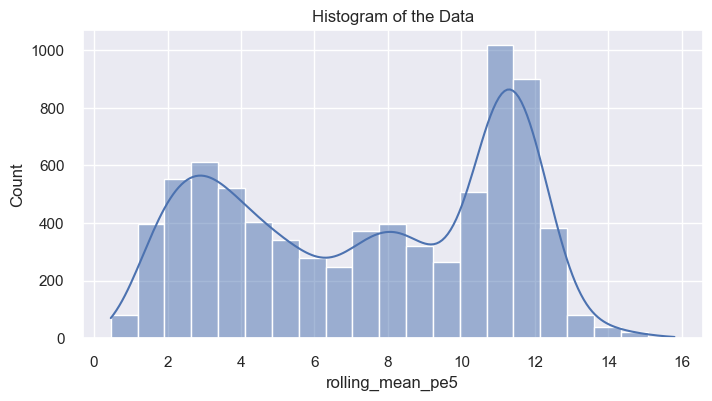

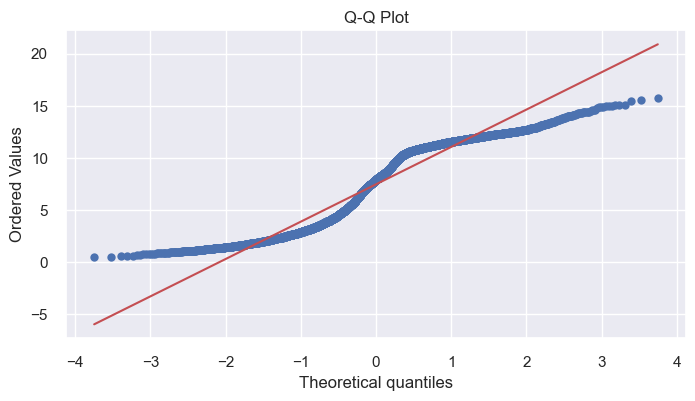

In [108]:
for f in features2:

    # Plot a histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(cluster_period[f], kde=True)
    plt.title('Histogram of the Data')
    plt.show()

    # Q-Q plot
    plt.figure(figsize=(8, 4))
    stats.probplot(cluster_period[f], dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    plt.show()

# IForest

For each method, we try it with all users together and indivisually for each user.  We split the data to train and test periods, standardize the whole set, as we are able to since the method is retrained weekly and we are not looking past the period that is being assessed.  PCA is calculated if that is used.  Fitting is performed against the training period and predict against the test period.  If one of the rolling calculated fields is an aonomaly we mark that day as an anomaly.  If the label and anomaly are both positive and it is the first time a bad actor is detected, we calculate the number of days it took to find the bad actor.

In [109]:
#CLUSTER WITH ALL USERS

cont = .03

caught = []
y_actual = []
pred = []
days_till_detected = []
sil_scores = []
best_cont = []

train_start = datetime.datetime(2010,1,1)
train_end = datetime.datetime(2010,5,30)

predict_start = datetime.datetime(2010,5,31)
predict_end = datetime.datetime(2010,6,7)

for r in tqdm(range(20)):

    dbscan_df['split'] = ''
    dbscan_df.loc[(dbscan_df['date'] >= train_start) & (dbscan_df['date'] <= predict_start), "split"] = 'Train'
    dbscan_df.loc[(dbscan_df['date'] >= predict_start) & (dbscan_df['date'] < predict_end), "split"] = 'Test'

    cluster_period = dbscan_df.loc[(dbscan_df['split'] == 'Train') | (dbscan_df['split'] == 'Test')]
    cluster_period['date'] = pd.to_datetime(cluster_period['date']).dt.date
    cluster_period.sort_values(by='date', inplace=True)
    cluster_period.reset_index(inplace=True, drop=True)
 
    for d in datasets:
        for f in d:
            cluster_period[f] = StandardScaler().fit_transform(np.array(cluster_period[f]).reshape(-1,1))
    test_period = cluster_period.loc[(cluster_period['split'] == 'Test')]
    train_period = cluster_period.loc[(cluster_period['split'] == 'Train')]

    dataset_count = 1

    clustering = IsolationForest(n_estimators=1000, max_samples='auto', contamination=cont, random_state=1)

    for d in datasets:
        pca.fit(cluster_period[d])
        transformed_data = pca.transform(cluster_period[d])
        explained_variance = pca.explained_variance_ratio_
        cluster_period[pca_features2] = transformed_data

        # CHANGE HERE FOR PCA VS DIRECT VALUES
        # clustering.fit(train_period[pca_features])
        clustering.fit(train_period[d])
        test_period['pred' + str(dataset_count)] = clustering.predict(test_period[d])

        x_pos = test_period['rolling_mean_l1'].loc[test_period['label'] == 1]
        y_pos = test_period['rolling_mean_l1'].loc[test_period['pred1'] == -1]

        dataset_count += 1

    #CHANGE HERE FOR COMBINED STATS OR SEPARATE STATS
    for index, row in test_period.iterrows():
        if ((row['pred1'] == -1) | (row['pred2'] == -1) | (row['pred3'] == -1) |(row['pred4'] == -1)):
        # if ((row['pred1'] == -1)):
            pred.append(1)
        else: pred.append(0)

        if (row['label'] == 1):
            y_actual.append(1)
        else: y_actual.append(0)

        if ((row['label'] == 1) & ((row['pred1'] == -1) | (row['pred2'] == -1) | (row['pred3'] == -1) | (row['pred4'] == -1) )):
        # if ((row['label'] == 1) & ((row['pred1'] == -1))):
            if row['user'] in caught:
                continue
            print("Caught Bad Actor: " + row['user'])
            caught.append(row['user'])
            date = date_detected['day_date'].loc[date_detected['user'] == row['user']]
            days_till_detected.append(row['date'] - date)

    # train_start = train_start + delta
    train_end = train_end + delta
    predict_start = predict_start + delta
    predict_end = predict_end + delta

 10%|█         | 2/20 [00:06<00:58,  3.25s/it]

Caught Bad Actor: CSC0217


 15%|█▌        | 3/20 [00:09<00:55,  3.29s/it]

Caught Bad Actor: GTD0219


 35%|███▌      | 7/20 [00:24<00:47,  3.65s/it]

Caught Bad Actor: RKD0604
Caught Bad Actor: BIH0745
Caught Bad Actor: RMW0542
Caught Bad Actor: JMB0308
Caught Bad Actor: RAR0725
Caught Bad Actor: MOS0047
Caught Bad Actor: JGT0221


 40%|████      | 8/20 [00:28<00:44,  3.70s/it]

Caught Bad Actor: PNL0301
Caught Bad Actor: JTM0223
Caught Bad Actor: EHB0824


 45%|████▌     | 9/20 [00:32<00:40,  3.71s/it]

Caught Bad Actor: BDV0168


 55%|█████▌    | 11/20 [00:39<00:33,  3.74s/it]

Caught Bad Actor: EGD0132
Caught Bad Actor: XHW0498


 75%|███████▌  | 15/20 [00:56<00:20,  4.01s/it]

Caught Bad Actor: AJR0932


 80%|████████  | 16/20 [01:00<00:16,  4.08s/it]

Caught Bad Actor: LQC0479


 85%|████████▌ | 17/20 [01:04<00:12,  4.11s/it]

Caught Bad Actor: MCF0600


 90%|█████████ | 18/20 [01:09<00:08,  4.26s/it]

Caught Bad Actor: BSS0369


 95%|█████████▌| 19/20 [01:13<00:04,  4.25s/it]

Caught Bad Actor: EHD0584


100%|██████████| 20/20 [01:17<00:00,  3.87s/it]

Caught Bad Actor: CCA0046


[[6693  609]
 [ 384   82]]


<Axes: >

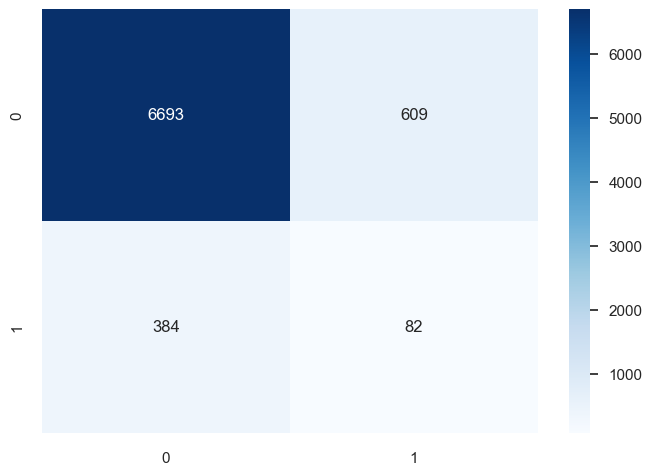

In [110]:
cf_matrix = confusion_matrix(y_actual, pred)
print(cf_matrix)

sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

In [111]:
accuracy = accuracy_score(y_actual, pred)
print(f"Accuracy = {accuracy}")

recall = recall_score(y_actual, pred)
print(f"Recall = {recall}")

precision = precision_score(y_actual, pred)
print(f"Precision = {precision}")

f1 = f1_score(y_actual, pred)
print(f"F1 = {f1}")

Accuracy = 0.872167868177137
Recall = 0.1759656652360515
Precision = 0.11866859623733719
F1 = 0.14174589455488332


In [112]:
print(days_till_detected)

[16    0:00:00
Name: day_date, dtype: object, 30    0:00:00
Name: day_date, dtype: object, 65    0:00:00
Name: day_date, dtype: object, 7    0:00:00
Name: day_date, dtype: object, 66    23 days, 0:00:00
Name: day_date, dtype: object, 40    0:00:00
Name: day_date, dtype: object, 62    8 days, 0:00:00
Name: day_date, dtype: object, 53    0:00:00
Name: day_date, dtype: object, 37    0:00:00
Name: day_date, dtype: object, 58    35 days, 0:00:00
Name: day_date, dtype: object, 42    0:00:00
Name: day_date, dtype: object, 22    0:00:00
Name: day_date, dtype: object, 6    0:00:00
Name: day_date, dtype: object, 21    8 days, 0:00:00
Name: day_date, dtype: object, 70    4 days, 0:00:00
Name: day_date, dtype: object, 3    0:00:00
Name: day_date, dtype: object, 48    0:00:00
Name: day_date, dtype: object, Series([], Name: day_date, dtype: object), 9    0:00:00
Name: day_date, dtype: object, 23    5 days, 0:00:00
Name: day_date, dtype: object, 12    0:00:00
Name: day_date, dtype: object]


In [113]:
caught

['CSC0217',
 'GTD0219',
 'RKD0604',
 'BIH0745',
 'RMW0542',
 'JMB0308',
 'RAR0725',
 'MOS0047',
 'JGT0221',
 'PNL0301',
 'JTM0223',
 'EHB0824',
 'BDV0168',
 'EGD0132',
 'XHW0498',
 'AJR0932',
 'LQC0479',
 'MCF0600',
 'BSS0369',
 'EHD0584',
 'CCA0046']

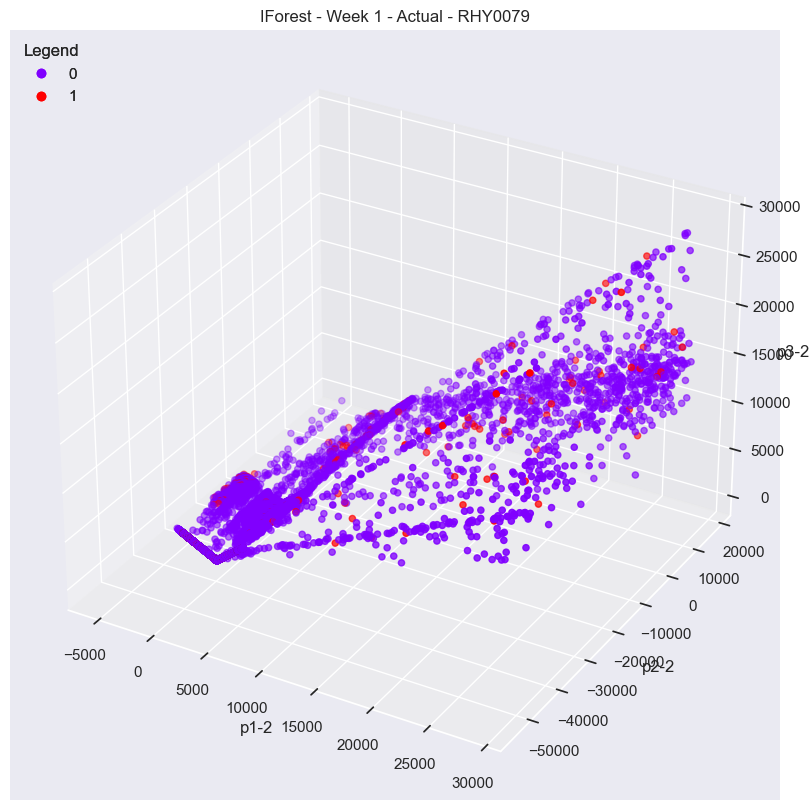

In [117]:
# Create a 3D scatterplot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1, projection='3d')
scatter1 = ax.scatter(cluster_period['l1'], cluster_period['l2'], cluster_period['l3'], c=cluster_period['label'].astype('category').cat.codes, cmap='rainbow')
legend1 = ax.legend(*scatter1.legend_elements(), title="Legend", loc='upper left')
ax.add_artist(legend1)
ax.set_xlabel('l1')
ax.set_ylabel('l2')
ax.set_zlabel('l3')
ax.set_title('IForest - Week 1 - Actual - ' + u)
plt.show()

# # Create a 3D scatterplot
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(1,1,1, projection='3d')
# scatter1 = ax.scatter(test_period['p1-2'], test_period['p2-2'], test_period['p3-2'], c=test_period['pred1'].astype('category').cat.codes, cmap='rainbow')
# legend1 = ax.legend(*scatter1.legend_elements(), title="Legend", loc='upper left')
# ax.set_xlabel('P1-2')
# ax.set_ylabel('P2-2')
# ax.set_zlabel('P3-2')
# ax.set_title('IForest - Week 1 - Predicted - ' + u)
# plt.show()

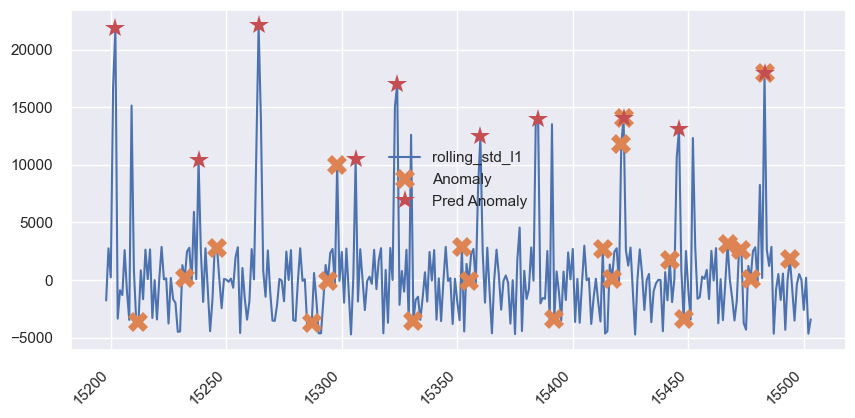

In [119]:
fig, ax = pyplot.subplots()
ax.plot(test_period['rolling_mean_l1'].loc[test_period['rolling_std_l1'].index])
# ax.plot(test_period['p2-2'].loc[test_period['p2-2'].index])
# ax.plot(test_period['p3-2'].loc[test_period['p3-2'].index])
ax.plot(x_pos,'X', markersize=15) 
ax.plot(y_pos,'r*', markersize=15)
fig.autofmt_xdate(rotation=45)
fig.set_size_inches(10,5)
ax.legend(['rolling_std_l1', 'Anomaly', 'Pred Anomaly'])
plt.show()

In [352]:
#CLUSTER BY USER

cont = .03

caught = []
y_actual = []
pred = []
days_till_detected = []
sil_scores = []
best_cont = []
holding_results = []

train_start = datetime.datetime(2010,4,5)
train_end = datetime.datetime(2010,5,30)

predict_start = datetime.datetime(2010,5,31)
predict_end = datetime.datetime(2010,6,7)


for r in tqdm(range(20)):
    dbscan_df['split'] = ''
    dbscan_df.loc[(dbscan_df['date'] >= train_start) & (dbscan_df['date'] <= predict_start), "split"] = 'Train'
    dbscan_df.loc[(dbscan_df['date'] >= predict_start) & (dbscan_df['date'] < predict_end), "split"] = 'Test'
    cluster_period = dbscan_df.loc[(dbscan_df['split'] == 'Train') | (dbscan_df['split'] == 'Test')]
    cluster_period['date'] = pd.to_datetime(cluster_period['date']).dt.date

    for d in datasets:
        for f in d:
            cluster_period[f] = StandardScaler().fit_transform(np.array(cluster_period[f]).reshape(-1,1))

    for u in tqdm(users):
        df_subset = cluster_period[cluster_period['user'] == u]
        df_subset.sort_values(by='date', inplace=True)
        df_subset.reset_index(drop=True, inplace=True)
        if (df_subset.shape[0] < 5):
            continue

        train_period = df_subset.loc[(df_subset['split'] == 'Train')]
        test_period = df_subset.loc[(df_subset['split'] == 'Test')]

        if (test_period.shape[0] == 0):
            continue

        clustering = IsolationForest(n_estimators=100, max_samples='auto', contamination=cont, random_state=1)

        dataset_count = 1
        for d in datasets:
            pca.fit(df_subset[d])
            transformed_data = pca.transform(df_subset[d])
            explained_variance = pca.explained_variance_ratio_
            df_subset[pca_features2] = transformed_data

            #Hyperparameter tuning process.
            # contamination = np.linspace(.01,.1,num=10)
            # max_sil_sore = 0
            # try:
            #     for k in contamination:
            #         clustering = IsolationForest(n_estimators=1000, max_samples='auto', contamination=k, random_state=42)
            #         clustering.fit(cluster_period[pca_features])
            #         labels = clustering.predict(cluster_period[pca_features])
            #         sil_score = shs(cluster_period[pca_features], labels)
            #         if (sil_score > max_sil_sore):
            #             max_sil_sore = sil_score
            #             cont_best = k
            # except:
            #     # cont_best = .01
            #     print(u + "Had an exception")
            # sil_scores.append(max_sil_sore)
            # best_cont.append(cont_best)

            # clustering.fit(train_period[d])
            # test_period['pred' + str(dataset_count)] = clustering.predict(test_period[d])

            # CHANGE HERE FOR PCA VS DIRECT VALUES
            # clustering.fit(train_period[pca_features])
            clustering.fit(train_period[d])
            test_period['pred' + str(dataset_count)] = clustering.predict(test_period[d])

            x_pos = test_period['rolling_std_l1'].loc[test_period['label'] == 1]
            y_pos = test_period['rolling_std_l1'].loc[test_period['pred1'] == -1]

            dataset_count += 1

        #CHANGE HERE FOR COMBINED STATS OR SEPARATE STATS
        for index, row in test_period.iterrows():
            if ((row['pred1'] == -1) | (row['pred2'] == -1) | (row['pred3'] == -1) |(row['pred4'] == -1)):
            # if ((row['pred1'] == -1)):
                pred.append(1)
            else: pred.append(0)

            if (row['label'] == 1):
                y_actual.append(1)
            else: y_actual.append(0)

            if ((row['label'] == 1) & ((row['pred1'] == -1) | (row['pred2'] == -1) | (row['pred3'] == -1) | (row['pred4'] == -1) )):
            # if ((row['label'] == 1) & ((row['pred1'] == -1))):
                if row['user'] in caught:
                    continue
                print("Caught Bad Actor: " + row['user'])
                caught.append(row['user'])
                date = date_detected['day_date'].loc[date_detected['user'] == row['user']]
                days_till_detected.append(row['date'] - date)


    # train_start = train_start + delta
    train_end = train_end + delta
    predict_start = predict_start + delta
    predict_end = predict_end + delta

  5%|▌         | 1/20 [00:17<05:27, 17.26s/it]

Caught Bad Actor: CSC0217
Caught Bad Actor: FAW0032


 10%|█         | 2/20 [00:33<05:03, 16.85s/it]

Caught Bad Actor: PNL0301
Caught Bad Actor: LCC0819


Caught Bad Actor: GTD0219


 15%|█▌        | 3/20 [00:50<04:42, 16.64s/it]

Caught Bad Actor: RMW0542


 20%|██        | 4/20 [01:07<04:28, 16.80s/it]

Caught Bad Actor: AAF0535


 25%|██▌       | 5/20 [01:24<04:12, 16.82s/it]

Caught Bad Actor: IJM0776


Caught Bad Actor: KPC0073


 30%|███       | 6/20 [01:40<03:54, 16.78s/it]

Caught Bad Actor: RAR0725


Caught Bad Actor: BIH0745
Caught Bad Actor: RHL0992


Caught Bad Actor: RKD0604
Caught Bad Actor: JMB0308


Caught Bad Actor: JGT0221


 35%|███▌      | 7/20 [01:58<03:41, 17.05s/it]

Caught Bad Actor: MOS0047
Caught Bad Actor: EHB0824


Caught Bad Actor: JTM0223


 40%|████      | 8/20 [02:14<03:22, 16.89s/it]

Caught Bad Actor: BDV0168


 45%|████▌     | 9/20 [02:32<03:06, 16.98s/it]

Caught Bad Actor: DIB0285


Caught Bad Actor: EGD0132
Caught Bad Actor: PSF0133


Caught Bad Actor: LJR0523


 50%|█████     | 10/20 [02:48<02:48, 16.86s/it]

Caught Bad Actor: XHW0498
Caught Bad Actor: CAH0936


Caught Bad Actor: BBS0039


 70%|███████   | 14/20 [03:50<01:34, 15.71s/it]

Caught Bad Actor: AJR0932


 75%|███████▌  | 15/20 [04:04<01:15, 15.09s/it]

Caught Bad Actor: RAB0589
Caught Bad Actor: LQC0479


 80%|████████  | 16/20 [04:17<00:57, 14.49s/it]

Caught Bad Actor: MCF0600
Caught Bad Actor: BLS0678


 85%|████████▌ | 17/20 [04:31<00:42, 14.28s/it]

Caught Bad Actor: HXL0968


Caught Bad Actor: BSS0369
Caught Bad Actor: FBA0348


 90%|█████████ | 18/20 [04:44<00:27, 13.89s/it]

Caught Bad Actor: AKR0057


Caught Bad Actor: BTL0226


Caught Bad Actor: IUB0565


Caught Bad Actor: EHD0584


 95%|█████████▌| 19/20 [04:57<00:13, 13.56s/it]

Caught Bad Actor: CCA0046
Caught Bad Actor: TNM0961


100%|██████████| 20/20 [05:10<00:00, 15.52s/it]


This is used in hyperparameter tuning.

In [108]:
best_cont_export = pd.DataFrame(best_cont)
best_cont_export.to_excel("best_cont_ind_iforest.xlsx")
np.mean(best_cont)

nan

In [109]:
sil_export = pd.DataFrame(sil_scores)
sil_export.to_excel("silhoutte_scores_ind_iforest.xlsx")
np.mean(sil_scores)

nan

[[2773 4656]
 [ 140  363]]


<Axes: >

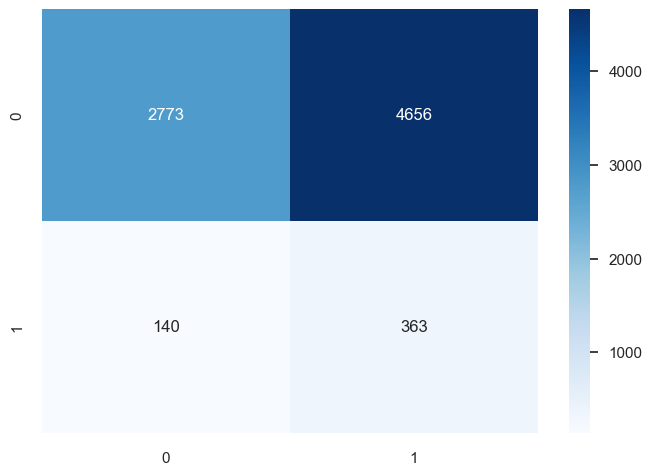

In [353]:
cf_matrix = confusion_matrix(y_actual, pred)
print(cf_matrix)

sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

In [324]:
accuracy = accuracy_score(y_actual, pred)
print(f"Accuracy = {accuracy}")

recall = recall_score(y_actual, pred)
print(f"Recall = {recall}")

precision = precision_score(y_actual, pred)
print(f"Precision = {precision}")

f1 = f1_score(y_actual, pred)
print(f"F1 = {f1}")

Accuracy = 0.6781391830559758
Recall = 0.5149105367793241
Precision = 0.10085669781931464
F1 = 0.16867469879518074


In [248]:
caught = pd.DataFrame(caught)
caught.to_excel("caught_ind_iforest.xlsx")
caught

,0
0,AKR0057


In [249]:
days_till_detected

[4    1 day, 0:00:00
 Name: day_date, dtype: object]

# DBSCAN

This is the same as Isolation Forest, but we do not have a training and test period for fitting and prediction.  DBSCAN performs clustering over the entire period.  There still is a test period, but this is only for assessment of performance.

In [330]:
#ALL USERS

eps = 2
mins = 5

caught = []
y_actual = []
pred = []
days_till_detected = []
sil_scores = []
best_eps = []
best_min = []

train_start = datetime.datetime(2010,1,1)
train_end = datetime.datetime(2010,5,30)

predict_start = datetime.datetime(2010,5,31)
predict_end = datetime.datetime(2010,6,7)

for r in tqdm(range(20)):
    dbscan_df['split'] = ''
    dbscan_df.loc[(dbscan_df['date'] >= train_start) & (dbscan_df['date'] <= predict_start), "split"] = 'Train'
    dbscan_df.loc[(dbscan_df['date'] >= predict_start) & (dbscan_df['date'] < predict_end), "split"] = 'Test'
    cluster_period = dbscan_df.loc[(dbscan_df['split'] == 'Train') | (dbscan_df['split'] == 'Test')]
    cluster_period['date'] = pd.to_datetime(cluster_period['date']).dt.date
    cluster_period.sort_values(by='date', inplace=True)
    cluster_period.reset_index(inplace=True, drop=True)
    dataset_count = 1
    for d in datasets:
        for f in d:
            cluster_period[f] = StandardScaler().fit_transform(np.array(cluster_period[f]).reshape(-1,1))

        pca.fit(cluster_period[d])
        transformed_data = pca.transform(cluster_period[d])
        explained_variance = pca.explained_variance_ratio_
        cluster_period[pca_features2] = transformed_data

        # CHANGE HERE FOR PCA VS DIRECT VALUES
        # clustering.fit(train_period[pca_features])
        # holding_results['pred' + str(dataset_count)] = clustering.predict(test_period[pca_features])
        clustering = DBSCAN(eps=eps, min_samples=mins).fit(cluster_period[d])

        labels = clustering.labels_

        cluster_period['pred' + str(dataset_count)] = clustering.labels_

        dataset_count += 1

    test_period = cluster_period.loc[(cluster_period['split'] == 'Test')]
    x_pos = test_period['rolling_mean_l1'].loc[test_period['label'] == 1]
    y_pos = test_period['rolling_mean_l1'].loc[test_period['pred1'] == -1]

    #Hyperparameter tuning process.
        # epsilon = np.linspace(.1,1,num=10)
        # min_samples = np.arange(2, 6)
        # max_sil_sore = 0
        # sil_score = 0
        # for j in epsilon:
        #     for k in min_samples:
        #         try:
        #             clustering = DBSCAN(eps=j, min_samples=k).fit(cluster_period[pca_features])
        #             labels = clustering.labels_
        #             sil_score = shs(cluster_period[pca_features], labels)
        #             if (sil_score >= max_sil_sore):
        #                 max_sil_sore = sil_score
        #                 eps_best = j
        #                 min_samples_best = k
        #         except:
        #             print("Clustering failed")
        #             continue
        # sil_scores.append(max_sil_sore)     
        # best_eps.append(eps_best)
        # best_min.append(min_samples_best)

    #CHANGE HERE FOR COMBINED STATS OR SEPARATE STATS
    for index, row in test_period.iterrows():
        if ((row['pred1'] == -1) | (row['pred2'] == -1) | (row['pred3'] == -1) |(row['pred4'] == -1)):
        # if ((row['pred1'] == -1)):
            pred.append(1)
        else: pred.append(0)

        if (row['label'] == 1):
            y_actual.append(1)
        else: y_actual.append(0)

        if ((row['label'] == 1) & ((row['pred1'] == -1) | (row['pred2'] == -1) | (row['pred3'] == -1) | (row['pred4'] == -1) )):
        # if ((row['label'] == 1) & ((row['pred1'] == -1))):
            if row['user'] in caught:
                continue
            print("Caught Bad Actor: " + row['user'])
            caught.append(row['user'])
            date = date_detected['day_date'].loc[date_detected['user'] == row['user']]
            days_till_detected.append(row['date'] - date)

    # train_start = train_start + delta
    train_end = train_end + delta
    predict_start = predict_start + delta
    predict_end = predict_end + delta

 10%|█         | 2/20 [00:03<00:30,  1.70s/it]

Caught Bad Actor: CSC0217


 15%|█▌        | 3/20 [00:05<00:29,  1.71s/it]

Caught Bad Actor: LCC0819
Caught Bad Actor: GTD0219


 30%|███       | 6/20 [00:09<00:20,  1.48s/it]

Caught Bad Actor: RMW0542
Caught Bad Actor: KPC0073


 35%|███▌      | 7/20 [00:10<00:16,  1.28s/it]

Caught Bad Actor: RKD0604
Caught Bad Actor: BIH0745
Caught Bad Actor: JMB0308
Caught Bad Actor: MOS0047
Caught Bad Actor: RHL0992
Caught Bad Actor: JGT0221


 40%|████      | 8/20 [00:11<00:14,  1.19s/it]

Caught Bad Actor: JTM0223
Caught Bad Actor: EHB0824


 45%|████▌     | 9/20 [00:12<00:12,  1.13s/it]

Caught Bad Actor: PNL0301
Caught Bad Actor: DIB0285
Caught Bad Actor: BDV0168


 50%|█████     | 10/20 [00:13<00:11,  1.14s/it]

Caught Bad Actor: RAR0725
Caught Bad Actor: LJR0523
Caught Bad Actor: AAF0535


 55%|█████▌    | 11/20 [00:14<00:10,  1.18s/it]

Caught Bad Actor: XHW0498
Caught Bad Actor: CAH0936
Caught Bad Actor: BBS0039


 75%|███████▌  | 15/20 [00:20<00:06,  1.29s/it]

Caught Bad Actor: AJR0932


 80%|████████  | 16/20 [00:21<00:05,  1.31s/it]

Caught Bad Actor: RAB0589
Caught Bad Actor: LQC0479


 85%|████████▌ | 17/20 [00:22<00:04,  1.36s/it]

Caught Bad Actor: MCF0600
Caught Bad Actor: BLS0678


 90%|█████████ | 18/20 [00:24<00:02,  1.42s/it]

Caught Bad Actor: BSS0369
Caught Bad Actor: FBA0348


 95%|█████████▌| 19/20 [00:26<00:01,  1.54s/it]

Caught Bad Actor: BTL0226
Caught Bad Actor: EHD0584


100%|██████████| 20/20 [00:28<00:00,  1.40s/it]

Caught Bad Actor: CCA0046


[[6476  826]
 [ 335  131]]


<Axes: >

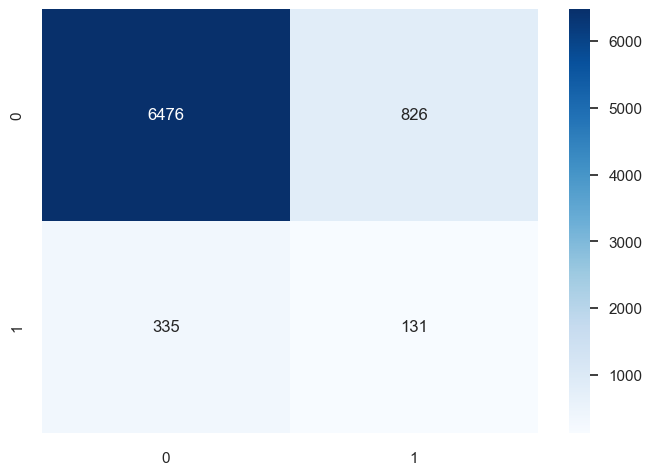

In [331]:
cf_matrix = confusion_matrix(y_actual, pred)
print(cf_matrix)

sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

In [332]:
accuracy = accuracy_score(y_actual, pred)
print(f"Accuracy = {accuracy}")

recall = recall_score(y_actual, pred)
print(f"Recall = {recall}")

precision = precision_score(y_actual, pred)
print(f"Precision = {precision}")

f1 = f1_score(y_actual, pred)
print(f"F1 = {f1}")

Accuracy = 0.8505406797116375
Recall = 0.2811158798283262
Precision = 0.13688610240334378
F1 = 0.18411806043569923


In [333]:
caught = pd.DataFrame(caught)
caught.to_excel("caught_ind_dbs.xlsx")
caught

,0
0,CSC0217
1,LCC0819
2,GTD0219
3,RMW0542
4,KPC0073
5,RKD0604
6,BIH0745
7,JMB0308
8,MOS0047
9,RHL0992


In [334]:
days_till_detected

[16    0:00:00
 Name: day_date, dtype: object,
 46    0:00:00
 Name: day_date, dtype: object,
 30    0:00:00
 Name: day_date, dtype: object,
 66    15 days, 0:00:00
 Name: day_date, dtype: object,
 44    0:00:00
 Name: day_date, dtype: object,
 65    0:00:00
 Name: day_date, dtype: object,
 7    0:00:00
 Name: day_date, dtype: object,
 40    0:00:00
 Name: day_date, dtype: object,
 53    0:00:00
 Name: day_date, dtype: object,
 64    2 days, 0:00:00
 Name: day_date, dtype: object,
 37    0:00:00
 Name: day_date, dtype: object,
 42    0:00:00
 Name: day_date, dtype: object,
 22    0:00:00
 Name: day_date, dtype: object,
 58    45 days, 0:00:00
 Name: day_date, dtype: object,
 18    3 days, 0:00:00
 Name: day_date, dtype: object,
 6    0:00:00
 Name: day_date, dtype: object,
 62    29 days, 0:00:00
 Name: day_date, dtype: object,
 47    5 days, 0:00:00
 Name: day_date, dtype: object,
 0    38 days, 0:00:00
 Name: day_date, dtype: object,
 70    1 day, 0:00:00
 Name: day_date, dtype: obje

In [345]:
#BY USER

eps = 2
mins = 5

caught = []
y_actual = []
pred = []
days_till_detected = []
sil_scores = []
best_eps = []
best_min = []

train_start = datetime.datetime(2010,1,1)
train_end = datetime.datetime(2010,5,30)

predict_start = datetime.datetime(2010,5,31)
predict_end = datetime.datetime(2010,6,7)

for r in tqdm(range(20)):
    dbscan_df['split'] = ''
    dbscan_df.loc[(dbscan_df['date'] >= train_start) & (dbscan_df['date'] <= predict_start), "split"] = 'Train'
    dbscan_df.loc[(dbscan_df['date'] >= predict_start) & (dbscan_df['date'] < predict_end), "split"] = 'Test'
    cluster_period = dbscan_df.loc[(dbscan_df['split'] == 'Train') | (dbscan_df['split'] == 'Test')]
    cluster_period['date'] = pd.to_datetime(cluster_period['date']).dt.date

    for d in datasets:
        for f in d:
            cluster_period[f] = StandardScaler().fit_transform(np.array(cluster_period[f]).reshape(-1,1))

    for u in tqdm(users):
        df_subset = cluster_period[cluster_period['user'] == u]
        df_subset.sort_values(by='date', inplace=True)
        df_subset.reset_index(drop=True, inplace=True)
        if (df_subset.shape[0] < 5):
            continue

        test_period = df_subset.loc[(df_subset['split'] == 'Test')]
        if (test_period.shape[0] == 0):
            continue

        dataset_count = 1

        for d in datasets:
            for f in d:
                df_subset[f] = StandardScaler().fit_transform(np.array(df_subset[f]).reshape(-1,1))

            pca.fit(df_subset[d])
            transformed_data = pca.transform(df_subset[d])
            explained_variance = pca.explained_variance_ratio_
            df_subset[pca_features2] = transformed_data

            # CHANGE HERE FOR PCA VS DIRECT VALUES
            # clustering.fit(train_period[pca_features])
            # holding_results['pred' + str(dataset_count)] = clustering.predict(test_period[pca_features])
            clustering = DBSCAN(eps=eps, min_samples=mins).fit(df_subset[d])
            labels = clustering.labels_
            df_subset['pred' + str(dataset_count)] = clustering.labels_

            dataset_count += 1

        test_period = df_subset.loc[(df_subset['split'] == 'Test')]
        x_pos = test_period['rolling_mean_l1'].loc[test_period['label'] == 1]
        y_pos = test_period['rolling_mean_l1'].loc[test_period['pred1'] == -1]

        # epsilon = np.linspace(.1,1,num=10)
        # min_samples = np.arange(2, 6)
        # max_sil_sore = 0
        # sil_score = 0
        # for j in epsilon:
        #     for k in min_samples:
        #         try:
        #             clustering = DBSCAN(eps=j, min_samples=k).fit(cluster_period[pca_features])
        #             labels = clustering.labels_
        #             sil_score = shs(cluster_period[pca_features], labels)
        #             if (sil_score >= max_sil_sore):
        #                 max_sil_sore = sil_score
        #                 eps_best = j
        #                 min_samples_best = k
        #         except:
        #             print("Clustering failed")
        #             continue
        # sil_scores.append(max_sil_sore)     
        # best_eps.append(eps_best)
        # best_min.append(min_samples_best)

        #CHANGE HERE FOR COMBINED STATS OR SEPARATE STATS
        for index, row in test_period.iterrows():
            if ((row['pred1'] == -1) & (row['pred2'] == -1) & (row['pred3'] == -1) & (row['pred4'] == -1)):
            # if ((row['pred1'] == -1)):
                pred.append(1)
            else: pred.append(0)

            if (row['label'] == 1):
                y_actual.append(1)
            else: y_actual.append(0)

            if ((row['label'] == 1) & ((row['pred1'] == -1) | (row['pred2'] == -1) | (row['pred3'] == -1) | (row['pred4'] == -1) )):
            # if ((row['label'] == 1) & ((row['pred1'] == -1))):
                if row['user'] in caught:
                    continue
                print("Caught Bad Actor: " + row['user'])
                caught.append(row['user'])
                date = date_detected['day_date'].loc[date_detected['user'] == row['user']]
                days_till_detected.append(row['date'] - date)

    train_start = train_start + delta
    train_end = train_end + delta
    predict_start = predict_start + delta
    predict_end = predict_end + delta


  5%|▌         | 1/20 [00:03<01:08,  3.62s/it]

Caught Bad Actor: CSC0217
Caught Bad Actor: FAW0032


 10%|█         | 2/20 [00:07<01:03,  3.54s/it]

Caught Bad Actor: PNL0301
Caught Bad Actor: LCC0819
Caught Bad Actor: GTD0219


 15%|█▌        | 3/20 [00:10<00:58,  3.46s/it]


Caught Bad Actor: RMW0542


 20%|██        | 4/20 [00:13<00:55,  3.48s/it]

Caught Bad Actor: AAF0535


 25%|██▌       | 5/20 [00:17<00:55,  3.67s/it]

Caught Bad Actor: RAR0725


Caught Bad Actor: IJM0776
Caught Bad Actor: KPC0073


 30%|███       | 6/20 [00:21<00:50,  3.58s/it]

Caught Bad Actor: BIH0745
Caught Bad Actor: RHL0992
Caught Bad Actor: RKD0604
Caught Bad Actor: JMB0308
Caught Bad Actor: JGT0221
Caught Bad Actor: MOS0047


 35%|███▌      | 7/20 [00:24<00:46,  3.55s/it]

Caught Bad Actor: EHB0824
Caught Bad Actor: JTM0223


 40%|████      | 8/20 [00:28<00:41,  3.50s/it]

Caught Bad Actor: DIB0285
Caught Bad Actor: BDV0168


 45%|████▌     | 9/20 [00:31<00:37,  3.44s/it]

Caught Bad Actor: EGD0132
Caught Bad Actor: PSF0133
Caught Bad Actor: LJR0523


 50%|█████     | 10/20 [00:34<00:33,  3.35s/it]

Caught Bad Actor: XHW0498
Caught Bad Actor: CAH0936
Caught Bad Actor: BBS0039


 65%|██████▌   | 13/20 [00:44<00:22,  3.17s/it]

Caught Bad Actor: HXL0968


 70%|███████   | 14/20 [00:46<00:18,  3.02s/it]


Caught Bad Actor: AJR0932


 75%|███████▌  | 15/20 [00:49<00:14,  2.87s/it]

Caught Bad Actor: RAB0589
Caught Bad Actor: LQC0479


 80%|████████  | 16/20 [00:51<00:10,  2.74s/it]

Caught Bad Actor: MCF0600
Caught Bad Actor: BLS0678


 85%|████████▌ | 17/20 [00:54<00:07,  2.66s/it]

Caught Bad Actor: BSS0369
Caught Bad Actor: FBA0348


 90%|█████████ | 18/20 [00:57<00:05,  2.85s/it]

Caught Bad Actor: AKR0057


Caught Bad Actor: BTL0226
Caught Bad Actor: IUB0565
Caught Bad Actor: EHD0584


 95%|█████████▌| 19/20 [00:59<00:02,  2.74s/it]

Caught Bad Actor: CCA0046
Caught Bad Actor: TNM0961


100%|██████████| 20/20 [01:02<00:00,  3.11s/it]


In [82]:
best_eps_export = pd.DataFrame(best_eps)
best_eps_export.to_excel("best_eps_ind_dbs.xlsx")
np.mean(best_eps)


0.465

In [83]:
best_min_export = pd.DataFrame(best_min)
best_min_export.to_excel("best_min_ind_dbs.xlsx")
np.mean(best_min)


2.0

In [84]:
sil_export = pd.DataFrame(sil_scores)
sil_export.to_excel("silhoutte_scores_ind_dbs.xlsx")
np.mean(sil_scores)

0.907015824290317

[[6528  901]
 [ 318  185]]


<Axes: >

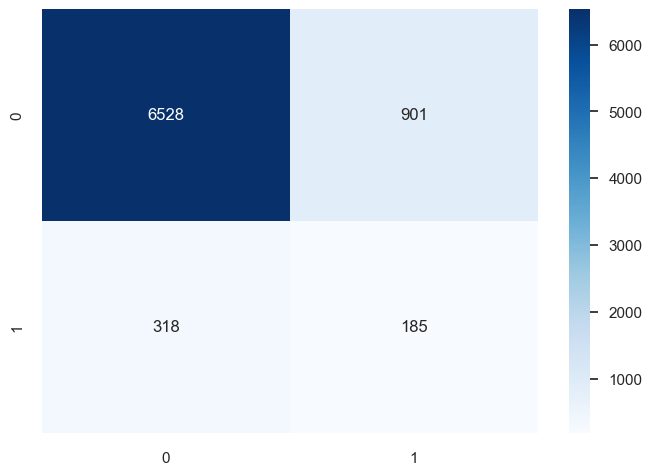

In [340]:
cf_matrix = confusion_matrix(y_actual, pred)
print(cf_matrix)

sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

In [341]:
accuracy = accuracy_score(y_actual, pred)
print(f"Accuracy = {accuracy}")

recall = recall_score(y_actual, pred)
print(f"Recall = {recall}")

precision = precision_score(y_actual, pred)
print(f"Precision = {precision}")

f1 = f1_score(y_actual, pred)
print(f"F1 = {f1}")

Accuracy = 0.8463187090267272
Recall = 0.36779324055666
Precision = 0.1703499079189687
F1 = 0.23285084959093771


In [342]:
caught = pd.DataFrame(caught)
caught.to_excel("caught_ind_dbs.xlsx")
caught


,0
0,CSC0217
1,FAW0032
2,PNL0301
3,LCC0819
4,GTD0219
5,RMW0542
6,AAF0535
7,RAR0725
8,IJM0776
9,KPC0073


In [343]:
days_till_detected


[16    0:00:00
 Name: day_date, dtype: object,
 24    0:00:00
 Name: day_date, dtype: object,
 58    2 days, 0:00:00
 Name: day_date, dtype: object,
 46    0:00:00
 Name: day_date, dtype: object,
 30    0:00:00
 Name: day_date, dtype: object,
 66    0:00:00
 Name: day_date, dtype: object,
 0    0:00:00
 Name: day_date, dtype: object,
 62    0:00:00
 Name: day_date, dtype: object,
 34    0:00:00
 Name: day_date, dtype: object,
 44    0:00:00
 Name: day_date, dtype: object,
 7    0:00:00
 Name: day_date, dtype: object,
 64    0:00:00
 Name: day_date, dtype: object,
 65    0:00:00
 Name: day_date, dtype: object,
 40    0:00:00
 Name: day_date, dtype: object,
 37    0:00:00
 Name: day_date, dtype: object,
 53    0:00:00
 Name: day_date, dtype: object,
 22    0:00:00
 Name: day_date, dtype: object,
 42    0:00:00
 Name: day_date, dtype: object,
 18    0:00:00
 Name: day_date, dtype: object,
 6    0:00:00
 Name: day_date, dtype: object,
 21    1 day, 0:00:00
 Name: day_date, dtype: object,
 

# OCSVM

This is identical to IForest, but we change the algorithym to SVM.

In [278]:
#CLUSTER WITH ALL USERS

NU = .03

caught = []
y_actual = []
pred = []
days_till_detected = []
sil_scores = []
best_nus = []

train_start = datetime.datetime(2010,1,1)
train_end = datetime.datetime(2010,5,30)

predict_start = datetime.datetime(2010,5,31)
predict_end = datetime.datetime(2010,6,7)

for r in tqdm(range(20)):

    dbscan_df['split'] = ''
    dbscan_df.loc[(dbscan_df['date'] >= train_start) & (dbscan_df['date'] <= predict_start), "split"] = 'Train'
    dbscan_df.loc[(dbscan_df['date'] >= predict_start) & (dbscan_df['date'] < predict_end), "split"] = 'Test'

    cluster_period = dbscan_df.loc[(dbscan_df['split'] == 'Train') | (dbscan_df['split'] == 'Test')]
    cluster_period['date'] = pd.to_datetime(cluster_period['date']).dt.date
    cluster_period.sort_values(by='date', inplace=True)
    cluster_period.reset_index(inplace=True, drop=True)
 
    for d in datasets:
        for f in d:
            cluster_period[f] = StandardScaler().fit_transform(np.array(cluster_period[f]).reshape(-1,1))
    test_period = cluster_period.loc[(cluster_period['split'] == 'Test')]
    train_period = cluster_period.loc[(cluster_period['split'] == 'Train')]

    dataset_count = 1
    ocsvm = OneClassSVM(nu=NU)
    for d in datasets:
        pca.fit(cluster_period[d])
        transformed_data = pca.transform(cluster_period[d])
        explained_variance = pca.explained_variance_ratio_
        cluster_period[pca_features2] = transformed_data

        # CHANGE HERE FOR PCA VS DIRECT VALUES
        # clustering.fit(train_period[pca_features])
        # holding_results['pred' + str(dataset_count)] = clustering.predict(test_period[pca_features])
        ocsvm.fit(train_period[d])
        test_period['pred' + str(dataset_count)] = ocsvm.predict(test_period[d])

        x_pos = test_period['rolling_std_l1'].loc[test_period['label'] == 1]
        y_pos = test_period['rolling_std_l1'].loc[test_period['pred1'] == -1]

        dataset_count += 1

    #CHANGE HERE FOR COMBINED STATS OR SEPARATE STATS
    for index, row in test_period.iterrows():
        if ((row['pred1'] == -1) | (row['pred2'] == -1) | (row['pred3'] == -1) |(row['pred4'] == -1)):
        # if ((row['pred1'] == -1)):
            pred.append(1)
        else: pred.append(0)

        if (row['label'] == 1):
            y_actual.append(1)
        else: y_actual.append(0)

        if ((row['label'] == 1) & ((row['pred1'] == -1) | (row['pred2'] == -1) | (row['pred3'] == -1) | (row['pred4'] == -1) )):
        # if ((row['label'] == 1) & ((row['pred1'] == -1))):
            if row['user'] in caught:
                continue
            print("Caught Bad Actor: " + row['user'])
            caught.append(row['user'])
            date = date_detected['day_date'].loc[date_detected['user'] == row['user']]
            days_till_detected.append(row['date'] - date)


    train_start = train_start + delta
    train_end = train_end + delta
    predict_start = predict_start + delta
    predict_end = predict_end + delta


    # cluster_period[pca_features2] = transformed_data
    # cluster_period = cluster_period[pca_features2 + feature_role +['split']]
    # for u in tqdm(users):
    #     # if (u in caught):  continue
    #     df_subset = cluster_period[cluster_period['user'] == u]
    #     df_subset.sort_values(by='date', inplace=True)
    #     df_subset['date'] = pd.to_datetime(df_subset['date']).astype(np.int64) / 8.64e+13
        # if (df_subset.shape[0] < 5):
        #     continue
        # nu = np.linspace(.01,.2,num=20)
        # max_nu = 0
        # sil_score = 0
        # max_sil_score = 0
        # try:
        #     for n in nu:
        #         ocsvm = OneClassSVM(nu=n)
        #         ocsvm.fit(df_subset[pca_features])
        #         labels = ocsvm.predict(df_subset[pca_features])
        #         labels[labels == 1] = 0
        #         sil_score = shs(df_subset[pca_features], labels)
        #         if (sil_score > max_sil_score):
        #             max_sil_sore = sil_score
        #             best_nu = n
        # except:
        #     # best_nu = .01
        #     print(u + "Had an exception")
        # sil_scores.append(max_sil_score)
        # best_nus.append(best_nu)

  5%|▌         | 1/20 [00:00<00:08,  2.16it/s]

Caught Bad Actor: SMH0291
Caught Bad Actor: MPM0220
Caught Bad Actor: MOS0047
Caught Bad Actor: MCJ0324
Caught Bad Actor: LRW0970
Caught Bad Actor: JMB0308
Caught Bad Actor: TPH0474
Caught Bad Actor: IUB0565
Caught Bad Actor: RAR0725
Caught Bad Actor: CWB0065
Caught Bad Actor: CSC0217
Caught Bad Actor: CLB0774
Caught Bad Actor: CCA0046
Caught Bad Actor: BSS0369
Caught Bad Actor: DDA0476
Caught Bad Actor: FBA0348
Caught Bad Actor: EGD0132
Caught Bad Actor: ECR0822
Caught Bad Actor: JTM0223
Caught Bad Actor: TSR0676
Caught Bad Actor: IHK0841
Caught Bad Actor: IBP0883
Caught Bad Actor: MCF0600
Caught Bad Actor: JRS0362
Caught Bad Actor: XHW0498
Caught Bad Actor: BBS0039
Caught Bad Actor: ESR0693
Caught Bad Actor: DMM0623


 10%|█         | 2/20 [00:01<00:11,  1.57it/s]

Caught Bad Actor: JGT0221
Caught Bad Actor: GRC0145
Caught Bad Actor: RMW0542
Caught Bad Actor: RAB0589
Caught Bad Actor: BTN0061
Caught Bad Actor: GTD0219
Caught Bad Actor: GHL0460
Caught Bad Actor: MSO0222
Caught Bad Actor: BIH0745
Caught Bad Actor: ABC0174
Caught Bad Actor: MLL0598
Caught Bad Actor: FAW0032
Caught Bad Actor: KRL0501
Caught Bad Actor: LQC0479
Caught Bad Actor: RGG0064
Caught Bad Actor: DRR0162


 15%|█▌        | 3/20 [00:01<00:10,  1.63it/s]

Caught Bad Actor: PNL0301
Caught Bad Actor: AAM0658
Caught Bad Actor: EHB0824
Caught Bad Actor: HJB0742
Caught Bad Actor: LCC0819
Caught Bad Actor: BLL0929


 20%|██        | 4/20 [00:02<00:10,  1.59it/s]

Caught Bad Actor: TNM0961
Caught Bad Actor: ASV0946
Caught Bad Actor: HXL0968
Caught Bad Actor: RHL0992


 25%|██▌       | 5/20 [00:03<00:09,  1.50it/s]

Caught Bad Actor: NLO0131
Caught Bad Actor: AAF0535
Caught Bad Actor: KPC0073
Caught Bad Actor: CAH0936


 30%|███       | 6/20 [00:03<00:09,  1.47it/s]

Caught Bad Actor: IJM0776
Caught Bad Actor: MYD0978
Caught Bad Actor: SSG0250
Caught Bad Actor: DIB0285
Caught Bad Actor: RKD0604
Caught Bad Actor: BTL0226


 35%|███▌      | 7/20 [00:04<00:09,  1.43it/s]

Caught Bad Actor: WTR0563
Caught Bad Actor: PSF0133
Caught Bad Actor: ORB0473


 45%|████▌     | 9/20 [00:05<00:07,  1.51it/s]

Caught Bad Actor: AKR0057
Caught Bad Actor: FTM0406
Caught Bad Actor: EDB0714
Caught Bad Actor: LJR0523
Caught Bad Actor: BDV0168


 60%|██████    | 12/20 [00:07<00:05,  1.58it/s]

Caught Bad Actor: EHD0584
Caught Bad Actor: CFG0959
Caught Bad Actor: NHH0185


 75%|███████▌  | 15/20 [00:09<00:03,  1.62it/s]

Caught Bad Actor: AJR0932


 80%|████████  | 16/20 [00:10<00:02,  1.57it/s]

Caught Bad Actor: RCP0785


 85%|████████▌ | 17/20 [00:10<00:01,  1.54it/s]

Caught Bad Actor: BLS0678


 90%|█████████ | 18/20 [00:11<00:01,  1.51it/s]

Caught Bad Actor: PES0085
Caught Bad Actor: TAP0551


100%|██████████| 20/20 [00:12<00:00,  1.56it/s]

Caught Bad Actor: EFS0882


[[1099 6330]
 [  36  467]]


<Axes: >

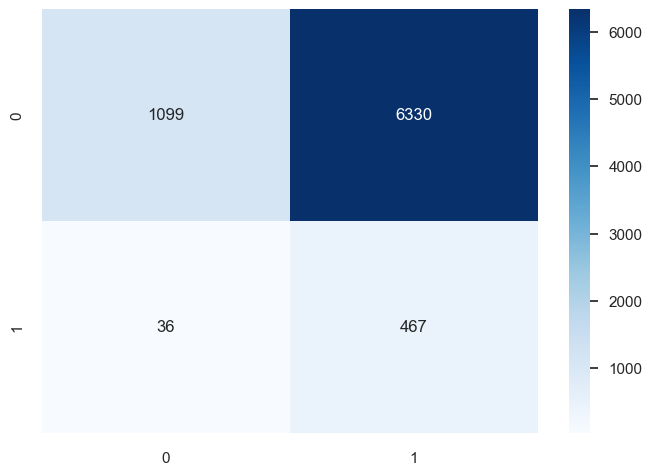

In [347]:
cf_matrix = confusion_matrix(y_actual, pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

In [280]:
accuracy = accuracy_score(y_actual, pred)
print(f"Accuracy = {accuracy}")

recall = recall_score(y_actual, pred)
print(f"Recall = {recall}")

precision = precision_score(y_actual, pred)
print(f"Precision = {precision}")

f1 = f1_score(y_actual, pred)
print(f"F1 = {f1}")

Accuracy = 0.822605561277034
Recall = 0.2918454935622318
Precision = 0.11486486486486487
F1 = 0.16484848484848486


In [281]:
caught = pd.DataFrame(caught)
caught.to_excel("caught_ind_ocs.xlsx")
caught

,0
0,SMH0291
1,MPM0220
2,MOS0047
3,MCJ0324
4,LRW0970
...,...
76,RCP0785
77,BLS0678
78,PES0085
79,TAP0551


In [282]:
days_till_detected

[Series([], Name: day_date, dtype: object),
 54    -156 days, 0:00:00
 Name: day_date, dtype: object,
 53    -44 days, 0:00:00
 Name: day_date, dtype: object,
 Series([], Name: day_date, dtype: object),
 Series([], Name: day_date, dtype: object),
 40    -43 days, 0:00:00
 Name: day_date, dtype: object,
 Series([], Name: day_date, dtype: object),
 36    -127 days, 0:00:00
 Name: day_date, dtype: object,
 62    -35 days, 0:00:00
 Name: day_date, dtype: object,
 Series([], Name: day_date, dtype: object),
 16    -9 days, 0:00:00
 Name: day_date, dtype: object,
 Series([], Name: day_date, dtype: object),
 12    -135 days, 0:00:00
 Name: day_date, dtype: object,
 9    -121 days, 0:00:00
 Name: day_date, dtype: object,
 Series([], Name: day_date, dtype: object),
 25    -121 days, 0:00:00
 Name: day_date, dtype: object,
 21    -62 days, 0:00:00
 Name: day_date, dtype: object,
 Series([], Name: day_date, dtype: object),
 42    -50 days, 0:00:00
 Name: day_date, dtype: object,
 Series([], Name: 

In [350]:
#CLUSTER BY USER

NU = .01

caught = []
y_actual = []
pred = []
days_till_detected = []
sil_scores = []
best_cont = []
holding_results = []

train_start = datetime.datetime(2010,4,5)
train_end = datetime.datetime(2010,5,30)

predict_start = datetime.datetime(2010,5,31)
predict_end = datetime.datetime(2010,6,7)

for r in tqdm(range(20)):
    dbscan_df['split'] = ''
    dbscan_df.loc[(dbscan_df['date'] >= train_start) & (dbscan_df['date'] <= predict_start), "split"] = 'Train'
    dbscan_df.loc[(dbscan_df['date'] >= predict_start) & (dbscan_df['date'] < predict_end), "split"] = 'Test'
    cluster_period = dbscan_df.loc[(dbscan_df['split'] == 'Train') | (dbscan_df['split'] == 'Test')]
    cluster_period['date'] = pd.to_datetime(cluster_period['date']).dt.date

    for d in datasets:
        for f in d:
            cluster_period[f] = StandardScaler().fit_transform(np.array(cluster_period[f]).reshape(-1,1))

    for u in tqdm(users):
        df_subset = cluster_period[cluster_period['user'] == u]
        df_subset.sort_values(by='date', inplace=True)
        df_subset.reset_index(drop=True, inplace=True)
        if (df_subset.shape[0] < 5):
            continue

        train_period = df_subset.loc[(df_subset['split'] == 'Train')]
        test_period = df_subset.loc[(df_subset['split'] == 'Test')]

        if (test_period.shape[0] == 0):
            continue

        ocsvm = OneClassSVM(nu=NU)

        dataset_count = 1
        for d in datasets:
            pca.fit(df_subset[d])
            transformed_data = pca.transform(df_subset[d])
            explained_variance = pca.explained_variance_ratio_
            df_subset[pca_features2] = transformed_data

            # contamination = np.linspace(.01,.1,num=10)
            # max_sil_sore = 0
            # try:
            #     for k in contamination:
            #         clustering = IsolationForest(n_estimators=1000, max_samples='auto', contamination=k, random_state=42)
            #         clustering.fit(cluster_period[pca_features])
            #         labels = clustering.predict(cluster_period[pca_features])
            #         sil_score = shs(cluster_period[pca_features], labels)
            #         if (sil_score > max_sil_sore):
            #             max_sil_sore = sil_score
            #             cont_best = k
            # except:
            #     # cont_best = .01
            #     print(u + "Had an exception")
            # sil_scores.append(max_sil_sore)
            # best_cont.append(cont_best)

            # clustering.fit(train_period[d])
            # test_period['pred' + str(dataset_count)] = clustering.predict(test_period[d])

            # CHANGE HERE FOR PCA VS DIRECT VALUES
            # clustering.fit(train_period[pca_features])
            # holding_results['pred' + str(dataset_count)] = clustering.predict(test_period[pca_features])
            ocsvm.fit(train_period[d])
            test_period['pred' + str(dataset_count)] = ocsvm.predict(test_period[d])

            x_pos = test_period['rolling_std_l1'].loc[test_period['label'] == 1]
            y_pos = test_period['rolling_std_l1'].loc[test_period['pred1'] == -1]

            dataset_count += 1

        #CHANGE HERE FOR COMBINED STATS OR SEPARATE STATS
        for index, row in test_period.iterrows():
            if ((row['pred1'] == -1) | (row['pred2'] == -1) | (row['pred3'] == -1) |(row['pred4'] == -1)):
            # if ((row['pred1'] == -1)):
                pred.append(1)
            else: pred.append(0)

            if (row['label'] == 1):
                y_actual.append(1)
            else: y_actual.append(0)

            if ((row['label'] == 1) & ((row['pred1'] == -1) | (row['pred2'] == -1) | (row['pred3'] == -1) | (row['pred4'] == -1) )):
            # if ((row['label'] == 1) & ((row['pred1'] == -1))):
                if row['user'] in caught:
                    continue
                print("Caught Bad Actor: " + row['user'])
                caught.append(row['user'])
                date = date_detected['day_date'].loc[date_detected['user'] == row['user']]
                days_till_detected.append(row['date'] - date)

    # train_start = train_start + delta
    train_end = train_end + delta
    predict_start = predict_start + delta
    predict_end = predict_end + delta

  5%|▌         | 1/20 [00:01<00:33,  1.74s/it]

Caught Bad Actor: CSC0217
Caught Bad Actor: FAW0032


 10%|█         | 2/20 [00:03<00:30,  1.67s/it]

Caught Bad Actor: PNL0301
Caught Bad Actor: LCC0819


Caught Bad Actor: GTD0219


 15%|█▌        | 3/20 [00:05<00:34,  2.05s/it]

Caught Bad Actor: RMW0542


 20%|██        | 4/20 [00:07<00:30,  1.88s/it]

Caught Bad Actor: AAF0535


 25%|██▌       | 5/20 [00:09<00:26,  1.78s/it]

Caught Bad Actor: RAR0725


Caught Bad Actor: IJM0776
Caught Bad Actor: KPC0073


 30%|███       | 6/20 [00:10<00:24,  1.73s/it]

Caught Bad Actor: BIH0745
Caught Bad Actor: RHL0992
Caught Bad Actor: RKD0604
Caught Bad Actor: JMB0308
Caught Bad Actor: JGT0221
Caught Bad Actor: MOS0047


 35%|███▌      | 7/20 [00:12<00:21,  1.69s/it]

Caught Bad Actor: EHB0824
Caught Bad Actor: JTM0223


 40%|████      | 8/20 [00:14<00:22,  1.85s/it]

Caught Bad Actor: DIB0285
Caught Bad Actor: BDV0168


 45%|████▌     | 9/20 [00:16<00:19,  1.78s/it]


Caught Bad Actor: PSF0133
Caught Bad Actor: LJR0523


 50%|█████     | 10/20 [00:17<00:17,  1.71s/it]

Caught Bad Actor: EGD0132
Caught Bad Actor: XHW0498
Caught Bad Actor: CAH0936
Caught Bad Actor: BBS0039


 65%|██████▌   | 13/20 [00:22<00:12,  1.74s/it]

Caught Bad Actor: HXL0968


 70%|███████   | 14/20 [00:24<00:09,  1.66s/it]

Caught Bad Actor: AJR0932


 75%|███████▌  | 15/20 [00:25<00:07,  1.58s/it]

Caught Bad Actor: RAB0589
Caught Bad Actor: LQC0479


 80%|████████  | 16/20 [00:27<00:06,  1.52s/it]

Caught Bad Actor: MCF0600
Caught Bad Actor: BLS0678


 85%|████████▌ | 17/20 [00:28<00:04,  1.64s/it]

Caught Bad Actor: BSS0369
Caught Bad Actor: FBA0348


 90%|█████████ | 18/20 [00:30<00:03,  1.56s/it]

Caught Bad Actor: AKR0057


Caught Bad Actor: BTL0226
Caught Bad Actor: IUB0565
Caught Bad Actor: EHD0584


 95%|█████████▌| 19/20 [00:31<00:01,  1.50s/it]

Caught Bad Actor: CCA0046


100%|██████████| 20/20 [00:32<00:00,  1.65s/it]


[[2295 5134]
 [  94  409]]


<Axes: >

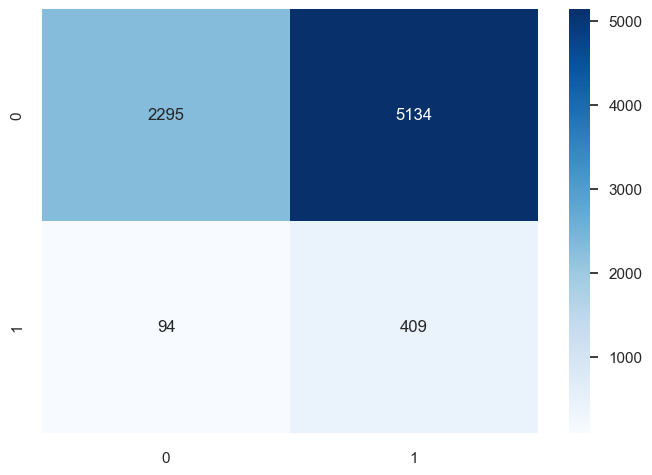

In [351]:
cf_matrix = confusion_matrix(y_actual, pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

In [287]:
accuracy = accuracy_score(y_actual, pred)
print(f"Accuracy = {accuracy}")

recall = recall_score(y_actual, pred)
print(f"Recall = {recall}")

precision = precision_score(y_actual, pred)
print(f"Precision = {precision}")

f1 = f1_score(y_actual, pred)
print(f"F1 = {f1}")



Accuracy = 0.1134020618556701
Recall = 1.0
Precision = 0.10416666666666667
F1 = 0.18867924528301885


In [288]:
caught = pd.DataFrame(caught)
caught.to_excel("caught_ind_ocs.xlsx")
caught

,0
0,AKR0057


In [289]:
days_till_detected


[4    0:00:00
 Name: day_date, dtype: object]

# LSTM Autoencoder

This section needs a much longer window.  We use a 1 month prediction with a 10 day series.

In [436]:
#BY USER

EPOCHS = 200
BATCH_SIZE = 32
THRESHOLD = 2

caught = []
y_actual = []
pred = []
days_till_detected = []

window_size = 10
feature_size = len(features1)

train_start = datetime.datetime(2010,1,1)
train_end = datetime.datetime(2010,5,30)

predict_start = datetime.datetime(2010,5,31)
predict_end = datetime.datetime(2010,6,30)

for r in tqdm(range(20)):
    dbscan_df['split'] = ''
    dbscan_df.loc[(dbscan_df['date'] >= train_start) & (dbscan_df['date'] <= predict_start), "split"] = 'Train'
    dbscan_df.loc[(dbscan_df['date'] >= predict_start) & (dbscan_df['date'] < predict_end), "split"] = 'Test'
    cluster_period = dbscan_df.loc[(dbscan_df['split'] == 'Train') | (dbscan_df['split'] == 'Test')]
    cluster_period['date'] = pd.to_datetime(cluster_period['date']).dt.date

    for d in datasets:
        for f in d:
            cluster_period[f] = StandardScaler().fit_transform(np.array(cluster_period[f]).reshape(-1,1))

    for u in tqdm(users):
        if (u in caught): continue
        df_subset = cluster_period[cluster_period['user'] == u]
        df_subset.sort_values(by='date', inplace=True)
        df_subset.reset_index(drop=True, inplace=True)
        if (df_subset.shape[0] < 40):
            continue

        early_stopping = EarlyStopping(monitor='loss', patience=50, restore_best_weights=True)
        model = keras.Sequential()
        # Encoder
        model.add(layers.LSTM(len(features1), activation='relu', input_shape=(window_size, feature_size), return_sequences=True))
        model.add(Dropout(.1))
        model.add(layers.LSTM(12, activation='relu', return_sequences=False))
        # Decoder
        model.add(layers.RepeatVector(window_size))
        model.add(layers.LSTM(12, activation='relu', return_sequences=True))
        model.add(Dropout(.1))
        model.add(layers.LSTM(len(features1), activation='relu', return_sequences=True))
        model.add(layers.TimeDistributed(layers.Dense(feature_size)))
        # Compile the model
        model.compile(optimizer='adam', loss='mse')

        test_period = df_subset.loc[(df_subset['split'] == 'Test')]
        if (test_period.shape[0] < window_size):
            continue

        holding_results = pd.DataFrame()

        dataset_count = 1
        for d in datasets:
            pca.fit(df_subset[d])
            transformed_data = pca.transform(df_subset[d])
            explained_variance = pca.explained_variance_ratio_
            df_subset[pca_features2] = transformed_data

            train = df_subset[d].loc[df_subset['split'] == 'Train']
            test = df_subset[d].loc[df_subset['split'] == 'Test']
            
            sequences_train = []
            for i in range(len(train) - window_size + 1):
                sequences_train.append(train[d].iloc[i:i+window_size].values)
            sequences_train = np.array(sequences_train)

            sequences_test = []
            for i in range(len(test) - window_size + 1):
                sequences_test.append(test[d].iloc[i:i+window_size].values)
            sequences_test = np.array(sequences_test)

            history = model.fit(sequences_train, sequences_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
            encoded_data = model.predict(sequences_test)
 
            mse = np.mean(np.square(sequences_test - encoded_data), axis=(1, 2))
            threshold = np.mean(mse) + THRESHOLD * np.std(mse)
            temp_array = []
            for a in mse:
                if a > threshold:
                        temp_array.append(1)
                else:
                    temp_array.append(0)
            holding_results['pred' + str(dataset_count)] = temp_array
            dataset_count += 1
            
        temp_actual = []
        temp_user = []
        temp_date = []
        window_offset = 0
        for index, row in test_period.iterrows():
            window_offset += 1
            if (window_offset < window_size): continue
            if (row['label'] == 1):
                temp_actual.append(1)
            else: temp_actual.append(0)
            temp_date.append(row['date'])
        holding_results['label'] = temp_actual
        holding_results['date'] = temp_date

        # CHANGE HERE FOR COMBINED STATS OR SEPARATE STATS
        for index, row in holding_results.iterrows():
            if ((row['pred1'] == 1) | (row['pred2'] == 1) | (row['pred3'] == 1) |(row['pred4'] == 1)):
            # if ((row['pred1'] == 1)):
                pred.append(1)
            else: pred.append(0)

            if (row['label'] == 1):
                y_actual.append(1)
            else: y_actual.append(0)

            if ((row['label'] == 1) & ((row['pred1'] == 1) | (row['pred2'] == 1) | (row['pred3'] == 1) | (row['pred4'] == 1) )):
            # if ((row['label'] == 1) & ((row['pred1'] == 1))):
                if u in caught:
                    continue
                print("Caught Bad Actor: " + u)
                caught.append(u)
                date = date_detected['day_date'].loc[date_detected['user'] == u]
                days_till_detected.append(row['date'] - date)

        # train_start = train_start + delta
        train_end = train_end + delta
        predict_start = predict_start + delta
        predict_end = predict_end + delta


  0%|          | 0/20 [00:00<?, ?it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 1/20 [00:18<06:00, 18.98s/it]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 2/20 [00:37<05:38, 18.81s/it]

1/1 [==============================] - 0s 15ms/step


 15%|█▌        | 3/20 [00:55<05:15, 18.55s/it]

1/1 [==============================] - 0s 12ms/step


 20%|██        | 4/20 [01:14<04:54, 18.41s/it]

1/1 [==============================] - 0s 12ms/step


 25%|██▌       | 5/20 [01:32<04:35, 18.37s/it]

1/1 [==============================] - 0s 13ms/step


 30%|███       | 6/20 [01:56<04:43, 20.25s/it]

1/1 [==============================] - 0s 12ms/step


 35%|███▌      | 7/20 [02:19<04:35, 21.16s/it]

1/1 [==============================] - 0s 12ms/step


 40%|████      | 8/20 [02:42<04:23, 21.92s/it]

1/1 [==============================] - 0s 12ms/step


 45%|████▌     | 9/20 [03:05<04:05, 22.29s/it]

1/1 [==============================] - 0s 13ms/step


 50%|█████     | 10/20 [03:29<03:46, 22.65s/it]

1/1 [==============================] - 0s 13ms/step


 55%|█████▌    | 11/20 [03:53<03:26, 22.98s/it]

1/1 [==============================] - 0s 13ms/step


 60%|██████    | 12/20 [04:22<03:19, 24.97s/it]

1/1 [==============================] - 0s 13ms/step


 65%|██████▌   | 13/20 [04:51<03:03, 26.22s/it]

1/1 [==============================] - 0s 12ms/step


 70%|███████   | 14/20 [05:20<02:42, 27.04s/it]

1/1 [==============================] - 0s 13ms/step


 75%|███████▌  | 15/20 [05:49<02:17, 27.49s/it]

Caught Bad Actor: AKR0057


100%|██████████| 20/20 [05:49<00:00, 17.47s/it]


[[168  14]
 [  1   1]]


<Axes: >

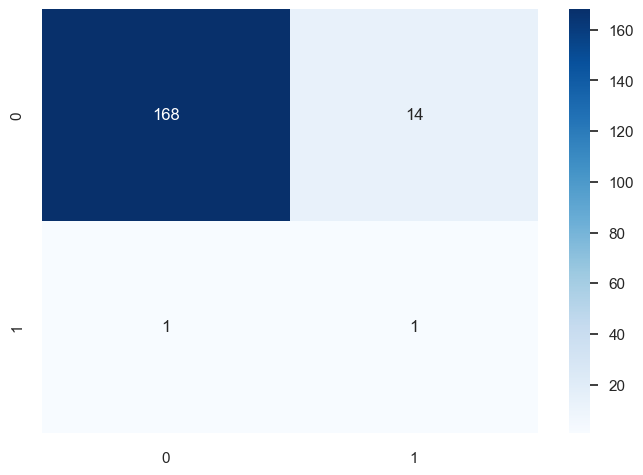

In [437]:
cf_matrix = confusion_matrix(y_actual, pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

In [438]:
accuracy = accuracy_score(y_actual, pred)
print(f"Accuracy = {accuracy}")

recall = recall_score(y_actual, pred)
print(f"Recall = {recall}")

precision = precision_score(y_actual, pred)
print(f"Precision = {precision}")

f1 = f1_score(y_actual, pred)
print(f"F1 = {f1}")

Accuracy = 0.9184782608695652
Recall = 0.5
Precision = 0.06666666666666667
F1 = 0.11764705882352941


In [421]:
caught = pd.DataFrame(caught)
caught.to_excel("caught_ind_ocs.xlsx")
caught

,0
0,AKR0057


In [422]:
days_till_detected

[4    1 day, 0:00:00
 Name: day_date, dtype: object]

In [442]:
#ALL USERS

EPOCHS = 50
BATCH_SIZE = 32
THRESHOLD = 2

caught = []
y_actual = []
pred = []
days_till_detected = []
holding_results = []

window_size = 10
feature_size = len(features1)

train_start = datetime.datetime(2010,1,1)
train_end = datetime.datetime(2010,5,30)

predict_start = datetime.datetime(2010,5,31)
predict_end = datetime.datetime(2010,6,30)

for r in tqdm(range(20)):
    dbscan_df['split'] = ''
    dbscan_df.loc[(dbscan_df['date'] >= train_start) & (dbscan_df['date'] <= predict_start), "split"] = 'Train'
    dbscan_df.loc[(dbscan_df['date'] >= predict_start) & (dbscan_df['date'] < predict_end), "split"] = 'Test'
    cluster_period = dbscan_df.loc[(dbscan_df['split'] == 'Train') | (dbscan_df['split'] == 'Test')]
    cluster_period['date'] = pd.to_datetime(cluster_period['date']).dt.date

    cluster_period = cluster_period.loc[(cluster_period['user'].isin(users))]

    early_stopping = EarlyStopping(monitor='loss', patience=50, restore_best_weights=True)
    model = keras.Sequential()
    # Encoder
    model.add(layers.LSTM(len(features1), activation='relu', input_shape=(window_size, feature_size), return_sequences=True))
    model.add(Dropout(.1))
    model.add(layers.LSTM(12, activation='relu', return_sequences=False))
    # Decoder
    model.add(layers.RepeatVector(window_size))
    model.add(layers.LSTM(12, activation='relu', return_sequences=True))
    model.add(Dropout(.1))
    model.add(layers.LSTM(len(features1), activation='relu', return_sequences=True))
    model.add(layers.TimeDistributed(layers.Dense(feature_size)))
    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    test_period = cluster_period.loc[(cluster_period['split'] == 'Test')]
    if (cluster_period.shape[0] < window_size):
        continue

    holding_results = pd.DataFrame()

    dataset_count = 1
    for d in datasets:
        for f in d:
            cluster_period[f] = StandardScaler().fit_transform(np.array(cluster_period[f]).reshape(-1,1))

        pca.fit(cluster_period[d])
        transformed_data = pca.transform(cluster_period[d])
        explained_variance = pca.explained_variance_ratio_
        cluster_period[pca_features2] = transformed_data

        train = cluster_period[d].loc[cluster_period['split'] == 'Train']
        test = cluster_period[d].loc[cluster_period['split'] == 'Test']
        
        sequences_train = []
        for i in range(len(train) - window_size + 1):
            sequences_train.append(train[d].iloc[i:i+window_size].values)
        sequences_train = np.array(sequences_train)

        sequences_test = []
        for i in range(len(test) - window_size + 1):
            sequences_test.append(test[d].iloc[i:i+window_size].values)
        sequences_test = np.array(sequences_test)

        history = model.fit(sequences_train, sequences_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
        encoded_data = model.predict(sequences_test)

        mse = np.mean(np.square(sequences_test - encoded_data), axis=(1, 2))
        threshold = np.mean(mse) + THRESHOLD * np.std(mse)
        temp_array = []
        for a in mse:
            if a > threshold:
                    temp_array.append(1)
            else:
                temp_array.append(0)
        holding_results['pred' + str(dataset_count)] = temp_array
        dataset_count += 1

    temp_actual = []
    temp_user = []
    temp_date = []
    window_offset = 0
    for index, row in test_period.iterrows():
        window_offset += 1
        if (window_offset < window_size): continue
        if (row['label'] == 1):
            temp_actual.append(1)
        else: temp_actual.append(0)
        temp_date.append(row['date'])
        temp_user.append(row['user'])
    holding_results['label'] = temp_actual
    holding_results['date'] = temp_date
    holding_results['user'] = temp_user

    # CHANGE HERE FOR COMBINED STATS OR SEPARATE STATS
    for index, row in holding_results.iterrows():
        if ((row['pred1'] == 1) | (row['pred2'] == 1) | (row['pred3'] == 1) |(row['pred4'] == 1)):
        # if ((row['pred1'] == 1)):
            pred.append(1)
        else: pred.append(0)

        if (row['label'] == 1):
            y_actual.append(1)
        else: y_actual.append(0)

        if ((row['label'] == 1) & ((row['pred1'] == 1) | (row['pred2'] == 1) | (row['pred3'] == 1) | (row['pred4'] == 1) )):
        # if ((row['label'] == 1) & ((row['pred1'] == 1))):
            if u in caught:
                continue
            print("Caught Bad Actor: " + u)
            caught.append(u)
            date = date_detected['day_date'].loc[date_detected['user'] == u]
            days_till_detected.append(row['date'] - date)

    train_start = train_start + delta
    train_end = train_end + delta
    predict_start = predict_start + delta
    predict_end = predict_end + delta

  0%|          | 0/20 [00:00<?, ?it/s]

59/59 [==============================] - 0s 1ms/step


  5%|▌         | 1/20 [05:32<1:45:16, 332.45s/it]

59/59 [==============================] - 0s 1ms/step


 10%|█         | 2/20 [11:14<1:41:28, 338.27s/it]

59/59 [==============================] - 0s 1ms/step


 15%|█▌        | 3/20 [19:01<1:52:24, 396.72s/it]

Caught Bad Actor: AKR0057
59/59 [==============================] - 0s 1ms/step


 20%|██        | 4/20 [25:38<1:45:54, 397.15s/it]

58/58 [==============================] - 0s 1ms/step


 25%|██▌       | 5/20 [34:11<1:49:39, 438.61s/it]

58/58 [==============================] - 0s 1ms/step


 30%|███       | 6/20 [40:46<1:38:54, 423.86s/it]

60/60 [==============================] - 0s 1ms/step


 35%|███▌      | 7/20 [47:16<1:29:25, 412.75s/it]

59/59 [==============================] - 0s 1ms/step


 40%|████      | 8/20 [53:59<1:21:57, 409.80s/it]

57/57 [==============================] - 0s 2ms/step


 45%|████▌     | 9/20 [1:17:16<2:11:40, 718.27s/it]

56/56 [==============================] - 0s 1ms/step


 50%|█████     | 10/20 [1:23:47<1:42:53, 617.32s/it]

51/51 [==============================] - 0s 1ms/step


 55%|█████▌    | 11/20 [1:30:19<1:22:16, 548.46s/it]

49/49 [==============================] - 0s 1ms/step


 60%|██████    | 12/20 [1:36:58<1:07:02, 502.78s/it]

48/48 [==============================] - 0s 2ms/step


 65%|██████▌   | 13/20 [1:43:31<54:46, 469.54s/it]  

46/46 [==============================] - 0s 1ms/step


 70%|███████   | 14/20 [1:49:52<44:16, 442.83s/it]

45/45 [==============================] - 0s 1ms/step


 75%|███████▌  | 15/20 [1:56:19<35:29, 426.00s/it]

46/46 [==============================] - 0s 1ms/step


 80%|████████  | 16/20 [2:02:36<27:24, 411.21s/it]

45/45 [==============================] - 0s 1ms/step


 85%|████████▌ | 17/20 [2:08:44<19:54, 398.30s/it]

43/43 [==============================] - 0s 1ms/step


 90%|█████████ | 18/20 [2:14:50<12:57, 388.74s/it]

41/41 [==============================] - 0s 1ms/step


 95%|█████████▌| 19/20 [2:20:44<06:18, 378.11s/it]

40/40 [==============================] - 0s 1ms/step


100%|██████████| 20/20 [2:26:41<00:00, 440.07s/it]


[[26486  4280]
 [ 1844   339]]


<Axes: >

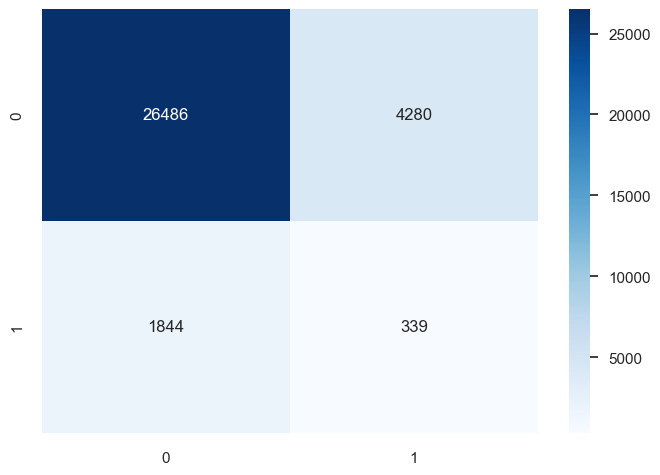

In [443]:
cf_matrix = confusion_matrix(y_actual, pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

In [444]:
accuracy = accuracy_score(y_actual, pred)
print(f"Accuracy = {accuracy}")

recall = recall_score(y_actual, pred)
print(f"Recall = {recall}")

precision = precision_score(y_actual, pred)
print(f"Precision = {precision}")

f1 = f1_score(y_actual, pred)
print(f"F1 = {f1}")

Accuracy = 0.8141369996054508
Recall = 0.15529088410444342
Precision = 0.07339250920112579
F1 = 0.09967656571596589


In [434]:
caught

['AKR0057']

In [435]:
days_till_detected

[4    1 day, 0:00:00
 Name: day_date, dtype: object]

NOTHING BELOW HERE

In [ ]:
        # f1_best = 0
        # for j in epsilon:
        #     for k in min_samples:
        #         try:

        #             temp_label = []
        #             temp_pred = []

        #             clustering = DBSCAN(eps=j, min_samples=k).fit(df_subset[pca_features])
        #             labels = clustering.labels_
        #             df_subset['pred'] = labels.tolist()

        #             for index, row in df_subset.iterrows():
        #                 if (row['label'] == 1):
        #                     temp_label.append(1)
        #                 else: temp_label.append(0)
        #                 if (row['pred'] == -1):
        #                     temp_pred.append(1)
        #                 else: temp_pred.append(0) 

        #             f1_current = f1_score(temp_label, temp_pred)

        #             if (f1_current > f1_best):
        #                 f1_best = f1_current
        #                 eps_best = j
        #                 min_samples_best = k
        #                 print("SUCCESS")
        #         except:
        #             print("Clustering failed for " + u)
        # # sil_scores.append(max_sil_sore)     
        # best_eps.append(eps_best)
        # best_min.append(min_samples_best)
        # best_f1.append(f1_best)